# Modelling

## Ordinary imports

In [1]:
from pandas_datareader import data
from pandas_datareader._utils import RemoteDataError
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import csv
import re
from datetime import datetime

import os.path
from os import path
import time

In [2]:
fontsize_reg = 12
fontsize_title = 16
from pylab import rcParams
rcParams['figure.facecolor'] = '1'
rcParams['figure.figsize'] = [8.0, 3.5]
rcParams['figure.dpi'] = 80
rcParams['savefig.dpi'] = 600

rcParams['font.size'] = 12
rcParams['legend.fontsize'] = 'large'
rcParams['figure.titlesize'] = 'large'

In [3]:
import warnings

import pandas as pd
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [ ]:
## Import custom function to collect news and prices, work with file system and modelling

In [ ]:
import trade_news_predict_prices

In [ ]:
# Some constants (path, random seeed, api key)

In [4]:
general_constants = pd.read_csv('general_constants.txt', sep=',', delimiter = ",", header='infer', index_col='variable_name')
general_constants

value
variable_name                                                               
random_seed                                                              420
directory_path                                   C:/DAN/t_systems/trade_news
folder_name_headlines                                 data/backup_headlines/
folder_name_logger                                              data/logger/
folder_name_merged_news_and_prices              data/merged_news_and_prices/
folder_name_for_labelling                                data/for_labelling/
folder_name_for_labeled_news_iter1                  data/labeled_news_iter1/
set_app_key1                        ccebd1ff788d4574818be93e35c4741925ac214e
set_app_key2                        a8be043d709946238759b0c5cb34c8f90d4e6f2c

In [5]:
# Path to folder with directory is a constant value that stores in .txt
# You can change them in some_constants.txt file or define them on your own.
directory_path = str(general_constants.loc['directory_path'][0])
random_seed = int(general_constants.loc['random_seed'][0])
print(random_seed)
print(directory_path)

420
C:/DAN/t_systems/trade_news


# Merge data with prices and news to one dataset

In [3902]:
list_of_files_to_merge = os.listdir(general_constants.loc['folder_name_merged_news_and_prices'][0])
# print(list_of_files_to_merge)

all_stock_prices = pd.DataFrame(
    data = [], 
    columns=[])

for file_now in list_of_files_to_merge:
    file_path = general_constants.loc['folder_name_merged_news_and_prices'][0] + file_now
    timeseries_df = pd.read_csv(file_path, sep=',')
    print(file_path, timeseries_df.shape)
    
    all_stock_prices = pd.concat([all_stock_prices, timeseries_df], ignore_index=True)
    time.sleep(0)
    
# Drop some cols
cols_to_drop = [
    'y_30',
    'y_29', 'y_28', 'y_27', 'y_26', 'y_25', 'y_24', 'y_23', 'y_22', 'y_21',
    'y_20', 'y_19', 'y_18', 'y_17', 'y_16', 'y_15', 'y_14', 'y_13', 'y_12',
    'y_11', 'y_10', 'y_9', 'y_8', 'y_7', 'y_6', 'y_5', 'y_4', 'y_3', 'y_2',
    'y_1'
]
all_stock_prices = all_stock_prices.drop(cols_to_drop, axis=1)

data/merged_news_and_prices/merged_news_and_prices_daily_adjusted_AAPL.OQ.csv (352, 59)
data/merged_news_and_prices/merged_news_and_prices_daily_adjusted_ADBE.OQ.csv (350, 59)
data/merged_news_and_prices/merged_news_and_prices_daily_adjusted_ADSGn.DE.csv (354, 59)
data/merged_news_and_prices/merged_news_and_prices_daily_adjusted_ALVG.DE.csv (355, 59)
data/merged_news_and_prices/merged_news_and_prices_daily_adjusted_AMZN.OQ.csv (352, 59)
data/merged_news_and_prices/merged_news_and_prices_daily_adjusted_ATUS.N.csv (355, 59)
data/merged_news_and_prices/merged_news_and_prices_daily_adjusted_BABA.N.csv (354, 59)
data/merged_news_and_prices/merged_news_and_prices_daily_adjusted_BAC.N.csv (356, 59)
data/merged_news_and_prices/merged_news_and_prices_daily_adjusted_BAND.OQ.csv (352, 59)
data/merged_news_and_prices/merged_news_and_prices_daily_adjusted_BASFn.DE.csv (351, 59)
data/merged_news_and_prices/merged_news_and_prices_daily_adjusted_BAYGn.DE.csv (354, 59)
data/merged_news_and_prices/merge

In [3903]:
# Columns fot real data:
price_cols = ['VOLUME', 'HIGH', 'LOW', 'OPEN', 'CLOSE']
news_cols = [
    'my_label_Analyst_Rating', 'my_label_Collaboration',
    'my_label_Contract_-_Agreement_-_Deal', 'my_label_Credit_Debt_Rating',
    'my_label_Dividend', 'my_label_Eco_Issues', 'my_label_Executive_Change',
    'my_label_Financial_Results', 'my_label_Investigation',
    'my_label_Investment', 'my_label_Lawsuit', 'my_label_Price_Target',
    'my_label_Product_Update', 'my_label_Security_Protection',
    'my_label_Settlement', 'my_label_Stock_Buyback',
    'my_label_Workforce_Change', 'my_label_digest'
]

80
68
63
48


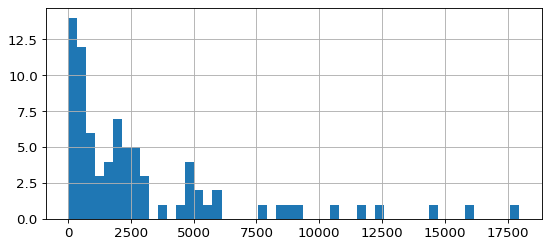

In [3904]:
news_per_ric = all_stock_prices.groupby('ric').agg('sum')[news_cols].sum(axis=1).sort_values(ascending=False)
news_per_ric.hist(bins=50)
print(sum(news_per_ric > 0))
print(sum(news_per_ric > 300))
print(sum(news_per_ric > 500))
print(sum(news_per_ric > 1000))

In [3905]:
rics_to_iterate = list(news_per_ric[news_per_ric > 300].index)
len(rics_to_iterate)

68

In [4027]:
for i in rics_to_iterate:
    print(i, end=', ')

AMZN.OQ, AAPL.OQ, FB.OQ, MSFT.OQ, GOOGL.OQ, JPM.N, TSLA.OQ, RWEG.DE, BABA.N, VOWG_p.DE, WMT.N, NFLX.OQ, BAC.N, DBKGn.DE, SIEGn.DE, LHAG.DE, DAIGn.DE, DIS.N, INTC.OQ, JNJ.N, BMWG.DE, T.N, BAYGn.DE, MRK.N, EONGn.DE, SAPG.DE, VZ.N, KO.N, CBKG.DE, NKE.N, TKAG.DE, MA.N, DTEGn.DE, NVDA.OQ, PFE.N, HD.N, V.N, ALVG.DE, UNH.N, BASFn.DE, CMCSA.OQ, BRKa.N, TMUS.OQ, PG.N, ADSGn.DE, PYPL.OQ, CONG.DE, DPWGn.DE, IFXGn.DE, PSMGn.DE, HNKG_p.DE, MRCG.DE, JCOM.OQ, FREG.DE, LUMN.N, FMEG.DE, VNAn.DE, ADBE.OQ, HEIG.DE, PDD.OQ, ATUS.N, O2Dn.DE, CHTR.OQ, FNTGn.DE, BEIG.DE, UTDI.DE, VG.OQ, DRIG.DE, 

# Generate features (not for LSTM but for LightGBM)

In [3906]:
import trade_news_predict_prices

all_stock_prices_shifts = pd.DataFrame(data = [], columns=[])

print(str(datetime.now()))

for ric_now in rics_to_iterate:
    data_now = all_stock_prices[all_stock_prices['ric'] == ric_now]
    
    data_now, features_cols = trade_news_predict_prices.create_features_for_df(
        data_now=data_now, news_too=False, news_cols=news_cols, window_of_change=5) # news_features_cols news_too!
    
    all_stock_prices_shifts = all_stock_prices_shifts.append(data_now, ignore_index=True)

print()
print(str(datetime.now()))

2021-05-30 06:38:10.680289
352, 352, 351, 355, 356, 351, 355, 356, 354, 353, 356, 351, 356, 356, 355, 354, 354, 351, 351, 356, 351, 356, 354, 351, 355, 354, 356, 351, 355, 355, 354, 354, 356, 346, 59, 356, 356, 355, 354, 351, 354, 355, 356, 354, 354, 356, 355, 351, 349, 351, 345, 356, 349, 355, 356, 351, 355, 350, 354, 351, 355, 351, 356, 346, 336, 350, 356, 349, 
2021-05-30 06:38:17.938371


In [3907]:
# Delete Nans to apply for LSTM model.
# Next data preparation is in next section
# all_stock_prices_shifts_n = all_stock_prices_shifts
# print(all_stock_prices_shifts_n.shape)
# all_stock_prices_shifts_n.dropna(axis=0, how='any', thresh=None, subset=features_cols + ['y_change_5'], inplace=True)
# print(all_stock_prices_shifts_n.shape)

In [3908]:
# all_stock_prices_shifts = all_stock_prices_shifts_n

# Prepare data for LSTM

In [3909]:
# for i in all_stock_prices_shifts.columns:
#     print(i, end=',\n')

In [3910]:
# price_features_cols = [
#     'price_change_close_shift_n',
#     'price_change_open_shift_n',
#     'price_change_low_shift_n',
#     'price_change_high_shift_n',
#     'stochastic_oscillator',
#     'macd_percent',
#     'rsi_14',
# ]
# news_features_cols = [
#     'my_label_Analyst_Rating_ndays',
#     'my_label_Collaboration_ndays',
#     'my_label_Contract_-_Agreement_-_Deal_ndays',
#     'my_label_Credit_Debt_Rating_ndays',
#     'my_label_Dividend_ndays',
#     'my_label_Eco_Issues_ndays',
#     'my_label_Executive_Change_ndays',
#     'my_label_Financial_Results_ndays',
#     'my_label_Investigation_ndays',
#     'my_label_Investment_ndays',
#     'my_label_Lawsuit_ndays',
#     'my_label_Price_Target_ndays',
#     'my_label_Product_Update_ndays',
#     'my_label_Security_Protection_ndays',
#     'my_label_Settlement_ndays',
#     'my_label_Stock_Buyback_ndays',
#     'my_label_Workforce_Change_ndays',
#     'my_label_digest_ndays'
# ]

In [3911]:
# all_stock_prices_shifts_n['date_time'] = pd.to_datetime(all_stock_prices_shifts_n['Date'], format='%Y-%m-%d')
# all_stock_prices_shifts_n = all_stock_prices_shifts_n.sort_values(by='date_time')
# all_stock_prices_shifts_n = all_stock_prices_shifts_n.reset_index(drop=True)

In [3912]:
# # quantile transform the raw data
# from sklearn.preprocessing import QuantileTransformer
# quantile = QuantileTransformer(output_distribution='normal', random_state=420)

# quantile_trained = quantile.fit(all_stock_prices_shifts_n[
#     all_stock_prices_shifts_n['date_time'] < pd.to_datetime('2020-12-01', format='%Y-%m-%d')
# ][price_features_cols + news_features_cols])

# all_stock_prices_shifts_n[price_features_cols + news_features_cols] = quantile_trained.transform(
#     all_stock_prices_shifts_n[price_features_cols + news_features_cols]
# )

In [3913]:
# X, y = [], []

# n_future = 15   # Number of days we want top predict into the future
# n_past = 30     # Number of past days we want to use to predict the future

# for ric_now in rics_to_iterate:
#     data_now = all_stock_prices_shifts_n[all_stock_prices_shifts_n['ric'] == ric_now][['ric'] + price_features_cols]
#     data_now = np.array(data_now.loc[:, price_features_cols])
    
#     for i in range(n_past, len(data_now) - n_future +1):
#         X.append(data_now[i - n_past:i, 0:data_now.shape[0] - 1])
#         y.append(data_now[i + n_future - 1:i + n_future, 0])

# X, y = np.array(X), np.array(y)
# print(X.shape, y.shape)

In [3914]:
# X_train_tr, y_train_tr = [], []
# X_valid_tr, y_valid_tr = [], []
# X_test_tr, y_test_tr = [], []

# valid_fraction = 0.1
# test_fraction = 0.1

# n_future = 15   # Number of days we want top predict into the future
# n_past = 30     # Number of past days we want to use to predict the future

# for ric_now in rics_to_iterate:
#     data_now = all_stock_prices_shifts_n[all_stock_prices_shifts_n['ric'] == ric_now][['ric', 'date_time'] + price_features_cols]
#     data_now = data_now.sort_values(by='date_time').reset_index(drop=True)
#     data_now_array = np.array(data_now.loc[:, price_features_cols])
    
#     n_i = len(data_now_array) - n_future +1 - n_past
#     n_valid = math.ceil(n_i * valid_fraction)
#     n_test = math.ceil(n_i * test_fraction)
#     for i in range(n_past, n_past + n_i):
        
#         if (i <= n_past + n_i - n_valid - n_test):
#             X_train_tr.append(data_now_array[i - n_past:i, 0:data_now_array.shape[0]]) #  - 1
#             y_train_tr.append(data_now_array[i + n_future - 1:i + n_future, 0])
            
#         if (i > n_past + n_i - n_valid - n_test) & (i <= n_past + n_i - n_test):
#             X_valid_tr.append(data_now_array[i - n_past:i, 0:data_now_array.shape[0]]) #  - 1
#             y_valid_tr.append(data_now_array[i + n_future - 1:i + n_future, 0])
            
#         if (i > n_past + n_i - n_test) & (i <= n_past + n_i):
#             X_test_tr.append(data_now_array[i - n_past:i, 0:data_now_array.shape[0]]) #  - 1
#             y_test_tr.append(data_now_array[i + n_future - 1:i + n_future, 0])

# X_train_tr, y_train_tr = np.array(X_train_tr), np.array(y_train_tr)
# X_valid_tr, y_valid_tr = np.array(X_valid_tr), np.array(y_valid_tr)
# X_test_tr, y_test_tr = np.array(X_test_tr), np.array(y_test_tr)

# print(X_train_tr.shape, y_train_tr.shape)
# print(X_valid_tr.shape, y_valid_tr.shape)
# print(X_test_tr.shape, y_test_tr.shape)
# print(X_train_tr.shape[0] + X_valid_tr.shape[0] + X_test.shape[0])

# Prepare data for LSTM 2

In [3915]:
price_features_cols = [
    'price_change_close_shift_n',
    'price_change_open_shift_n',
    'price_change_low_shift_n',
    'price_change_high_shift_n',
    'stochastic_oscillator',
    'macd_percent',
    'rsi_14',
]
news_features_cols = [
    'my_label_Analyst_Rating_ndays',
    'my_label_Collaboration_ndays',
    'my_label_Contract_-_Agreement_-_Deal_ndays',
    'my_label_Credit_Debt_Rating_ndays',
    'my_label_Dividend_ndays',
    'my_label_Eco_Issues_ndays',
    'my_label_Executive_Change_ndays',
    'my_label_Financial_Results_ndays',
    'my_label_Investigation_ndays',
    'my_label_Investment_ndays',
    'my_label_Lawsuit_ndays',
    'my_label_Price_Target_ndays',
    'my_label_Product_Update_ndays',
    'my_label_Security_Protection_ndays',
    'my_label_Settlement_ndays',
    'my_label_Stock_Buyback_ndays',
    'my_label_Workforce_Change_ndays',
    'my_label_digest_ndays'
]

In [3916]:
# Next data preparation is in next section
all_stock_prices_shifts_n = all_stock_prices_shifts
print(all_stock_prices_shifts_n.shape)

all_stock_prices_shifts_n.dropna(axis=0, how='any', thresh=None, subset=price_features_cols, inplace=True) #  + news_features_cols
print(all_stock_prices_shifts_n.shape)

(23710, 161)
(21806, 161)


In [3917]:
all_stock_prices_shifts_n['date_time'] = pd.to_datetime(all_stock_prices_shifts_n['Date'], format='%Y-%m-%d')
all_stock_prices_shifts_n = all_stock_prices_shifts_n.sort_values(by='date_time')
all_stock_prices_shifts_n = all_stock_prices_shifts_n.reset_index(drop=True)

In [3918]:
X, y_reg, y_bi = [], [], []
cutted_data_features = pd.DataFrame(data=[], index=[], columns=[])

n_future = 5   # Number of days we want top predict into the future
n_past = 30     # Number of past days we want to use to predict the future

for ric_now in rics_to_iterate:
    print(ric_now, end=', ')
    #  + news_features_cols
    data_now = all_stock_prices_shifts_n[all_stock_prices_shifts_n['ric'] == ric_now][['ric', 'date_time', 'CLOSE'] + price_features_cols] #  + news_features_cols
    data_now_array = np.array(data_now.loc[:, price_features_cols]) #  + news_features_cols
    data_now_cutted = data_now[n_past-1:len(data_now) - n_future +1 -1]
    cutted_data_features = cutted_data_features.append(data_now_cutted)

    for i in range(n_past, len(data_now) - n_future +1):
        X.append(data_now_array[i - n_past:i, 0:data_now_array.shape[0] - 1])
        y_reg.append(data_now_array[i + n_future - 1:i + n_future, 0])
        y_bi.append([int(data_now_array[i + n_future - 1:i + n_future, 0] >= 0)])

X, y_reg, y_bi = np.array(X), np.array(y_reg), np.array(y_bi)

cutted_data_features['actual_bi'] = [i[0] for i in y_bi]
cutted_data_features['actual_reg'] = [i[0] for i in y_reg]
print(X.shape, y_reg.shape, y_bi.shape)

AMZN.OQ, AAPL.OQ, FB.OQ, MSFT.OQ, GOOGL.OQ, JPM.N, TSLA.OQ, RWEG.DE, BABA.N, VOWG_p.DE, WMT.N, NFLX.OQ, BAC.N, DBKGn.DE, SIEGn.DE, LHAG.DE, DAIGn.DE, DIS.N, INTC.OQ, JNJ.N, BMWG.DE, T.N, BAYGn.DE, MRK.N, EONGn.DE, SAPG.DE, VZ.N, KO.N, CBKG.DE, NKE.N, TKAG.DE, MA.N, DTEGn.DE, NVDA.OQ, PFE.N, HD.N, V.N, ALVG.DE, UNH.N, BASFn.DE, CMCSA.OQ, BRKa.N, TMUS.OQ, PG.N, ADSGn.DE, PYPL.OQ, CONG.DE, DPWGn.DE, IFXGn.DE, PSMGn.DE, HNKG_p.DE, MRCG.DE, JCOM.OQ, FREG.DE, LUMN.N, FMEG.DE, VNAn.DE, ADBE.OQ, HEIG.DE, PDD.OQ, ATUS.N, O2Dn.DE, CHTR.OQ, FNTGn.DE, BEIG.DE, UTDI.DE, VG.OQ, DRIG.DE, (19497, 30, 7) (19497, 1) (19497, 1)


# Transformed data

In [3919]:
# quantile transform the raw data
from sklearn.preprocessing import QuantileTransformer
quantile = QuantileTransformer(output_distribution='normal', random_state=420)

quantile_trained = quantile.fit(all_stock_prices_shifts_n[
    all_stock_prices_shifts_n['date_time'] < pd.to_datetime('2020-12-01', format='%Y-%m-%d')
][price_features_cols]) # + news_features_cols

In [3920]:
all_stock_prices_shifts_n_tr = all_stock_prices_shifts_n
all_stock_prices_shifts_n_tr[price_features_cols] = quantile_trained.transform( #  + news_features_cols
    all_stock_prices_shifts_n[price_features_cols] #  + news_features_cols
)

In [3921]:
X_tr, y_reg_tr, y_bi_tr = [], [], []
cutted_data_features_tr = pd.DataFrame(data=[], index=[], columns=[])

n_future = 5   # Number of days we want top predict into the future
n_past = 30     # Number of past days we want to use to predict the future

for ric_now in rics_to_iterate:
    print(ric_now, end=', ')
    data_now = all_stock_prices_shifts_n_tr[all_stock_prices_shifts_n_tr['ric'] == ric_now][['ric', 'date_time', 'CLOSE'] + price_features_cols] #  + news_features_cols
    data_now_array = np.array(data_now.loc[:, price_features_cols]) #  + news_features_cols
    data_now_cutted = data_now[n_past-1:len(data_now) - n_future +1 -1]
    cutted_data_features_tr = cutted_data_features_tr.append(data_now_cutted)

    for i in range(n_past, len(data_now) - n_future +1):
        X_tr.append(data_now_array[i - n_past:i, 0:data_now_array.shape[0] - 1])
        y_reg_tr.append(data_now_array[i + n_future - 1:i + n_future, 0])
        y_bi_tr.append([int(data_now_array[i + n_future - 1:i + n_future, 0] >= 0)])

X_tr, y_reg_tr, y_bi_tr = np.array(X_tr), np.array(y_reg_tr), np.array(y_bi_tr)

cutted_data_features['actual_bi'] = [i[0] for i in y_bi_tr]
cutted_data_features['actual_reg'] = [i[0] for i in y_reg_tr]
print(X_tr.shape, y_reg.shape, y_bi.shape)

AMZN.OQ, AAPL.OQ, FB.OQ, MSFT.OQ, GOOGL.OQ, JPM.N, TSLA.OQ, RWEG.DE, BABA.N, VOWG_p.DE, WMT.N, NFLX.OQ, BAC.N, DBKGn.DE, SIEGn.DE, LHAG.DE, DAIGn.DE, DIS.N, INTC.OQ, JNJ.N, BMWG.DE, T.N, BAYGn.DE, MRK.N, EONGn.DE, SAPG.DE, VZ.N, KO.N, CBKG.DE, NKE.N, TKAG.DE, MA.N, DTEGn.DE, NVDA.OQ, PFE.N, HD.N, V.N, ALVG.DE, UNH.N, BASFn.DE, CMCSA.OQ, BRKa.N, TMUS.OQ, PG.N, ADSGn.DE, PYPL.OQ, CONG.DE, DPWGn.DE, IFXGn.DE, PSMGn.DE, HNKG_p.DE, MRCG.DE, JCOM.OQ, FREG.DE, LUMN.N, FMEG.DE, VNAn.DE, ADBE.OQ, HEIG.DE, PDD.OQ, ATUS.N, O2Dn.DE, CHTR.OQ, FNTGn.DE, BEIG.DE, UTDI.DE, VG.OQ, DRIG.DE, (19497, 30, 7) (19497, 1) (19497, 1)


# Split train valid test sets

In [3922]:
print(cutted_data_features['date_time'].quantile(0.0))
print(cutted_data_features['date_time'].quantile(0.5))
print(cutted_data_features['date_time'].quantile(0.8))
print(cutted_data_features['date_time'].quantile(0.9))
print(cutted_data_features['date_time'].quantile(1.0))

2019-11-14 00:00:00
2020-07-13 00:00:00
2020-11-11 00:00:00
2020-12-23 00:00:00
2021-03-05 00:00:00


In [3923]:
treshold_valid = '2020-11-15'
treshold_test = '2020-12-12'

condition_train = (cutted_data_features_tr['date_time'] <= pd.to_datetime(treshold_valid, format='%Y-%m-%d'))

condition_valid = (
    cutted_data_features_tr['date_time'] > pd.to_datetime(treshold_valid, format='%Y-%m-%d')
) & (cutted_data_features_tr['date_time'] <= pd.to_datetime(treshold_test, format='%Y-%m-%d'))

condition_test = (cutted_data_features_tr['date_time'] > pd.to_datetime(treshold_test, format='%Y-%m-%d'))

print('Total:', condition_train.sum() + condition_valid.sum() + condition_test.sum())
print('Train:', condition_train.sum())
print('Valid:', condition_valid.sum())
print(' Test:', condition_test.sum())

Total: 19497
Train: 15742
Valid: 1304
 Test: 2451


In [3924]:
X_train_tr = X_tr[condition_train]
X_valid_tr = X_tr[condition_valid]
X_test_tr = X_tr[condition_test]

y_train_reg_tr = y_reg_tr[condition_train]
y_valid_reg_tr = y_reg_tr[condition_valid]
y_test_reg_tr = y_reg_tr[condition_test]

y_train_reg = y_reg[condition_train]
y_valid_reg = y_reg[condition_valid]
y_test_reg = y_reg[condition_test]

# y_reg_train = y_reg[condition_train]
# y_reg_valid = y_reg[condition_valid]
# y_reg_test = y_reg[condition_test]

y_train_bi_tr = y_bi_tr[condition_train]
y_valid_bi_tr = y_bi_tr[condition_valid]
y_test_bi_tr = y_bi_tr[condition_test]

y_train_bi = y_bi[condition_train]
y_valid_bi = y_bi[condition_valid]
y_test_bi = y_bi[condition_test]

In [4023]:
print(X_train_tr.shape)
print(X_valid_tr.shape)
print(X_test_tr.shape)

(15742, 30, 7)
(1304, 30, 7)
(2451, 30, 7)


# LSTM

In [353]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [354]:
# import tensorflow as tf
# physical_devices = tf.config.list_physical_devices('XLA_GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [355]:
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

In [356]:
import numpy as np

from tensorflow import keras
from tensorflow.keras.models import Sequential
# from keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [357]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17921470106849910841
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4153868288
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12291984345608965570
physical_device_desc: "device: 0, name: GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [34]:
# physical_devices = tf.config.list_physical_devices('GPU')
# try:
#     tf.config.experimental.set_memory_growth(physical_devices[0], True)
# except:
#     # Invalid device or cannot modify virtual devices once initialized.
#     pass

In [35]:
# tf.config.experimental.get_memory_growth(tf.config.list_physical_devices('GPU')[0])

True

In [33]:
model2 = Sequential()
model2.add(LSTM((64), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.5))
model2.add(LSTM((32), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.25))
model2.add(LSTM((16), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.125))
model2.add(LSTM((4), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True))
model2.add(LSTM((1), return_sequences=False))
model2.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            18432     
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 32)            12416     
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 16)            3136      
_________________________________________________________________
lstm_3 (LSTM)                (None, 30, 4)             336       
_________________________________________________________________
lstm_4 (LSTM)                (None, 1)                 24        
Total params: 34,344
Trainable params: 34,344
Non-trainable params: 0
_________________________________________________________________


In [104]:
model3 = Sequential()
model3.add(LSTM((32), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True))
model3.add(LSTM((32), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True))
model3.add(LSTM((16), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True))
model3.add(LSTM((1), return_sequences=False))
model3.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 30, 32)            5120      
_________________________________________________________________
lstm_28 (LSTM)               (None, 30, 32)            8320      
_________________________________________________________________
lstm_29 (LSTM)               (None, 30, 16)            3136      
_________________________________________________________________
lstm_30 (LSTM)               (None, 1)                 72        
Total params: 16,648
Trainable params: 16,648
Non-trainable params: 0
_________________________________________________________________


In [112]:
model4 = Sequential()
model4.add(LSTM((64), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.5))
model4.add(LSTM((16), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.25))
model4.add(LSTM((1), return_sequences=False))
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 30, 64)            18432     
_________________________________________________________________
lstm_16 (LSTM)               (None, 30, 16)            5184      
_________________________________________________________________
lstm_17 (LSTM)               (None, 1)                 72        
Total params: 23,688
Trainable params: 23,688
Non-trainable params: 0
_________________________________________________________________


In [118]:
model5 = Sequential()
model5.add(LSTM((64), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.5))
model5.add(LSTM((16), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.5))
model5.add(LSTM((4), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True))
model5.add(LSTM((1), return_sequences=False))
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model5.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 30, 128)           69632     
_________________________________________________________________
lstm_22 (LSTM)               (None, 30, 32)            20608     
_________________________________________________________________
lstm_23 (LSTM)               (None, 30, 16)            3136      
_________________________________________________________________
lstm_24 (LSTM)               (None, 1)                 72        
Total params: 93,448
Trainable params: 93,448
Non-trainable params: 0
_________________________________________________________________


In [181]:
y_train_pred * y_train

0        1.484709e-06
1        1.094069e-05
2        4.539381e-06
3       -5.161628e-07
4        3.830947e-05
             ...     
15737    3.151960e-04
15738    2.949867e-04
15739    1.181414e-04
15740    1.467716e-08
15741    4.530039e-06
Length: 15742, dtype: float64

In [46]:
from keras import backend
def custom_loss_function(y_true, y_pred):
 
    # calculating squared difference between target and predicted values 
    loss = backend.sum(y_pred * y_true, axis=1)  # (batch_size, 2)
    
#     # multiplying the values with weights along batch dimension
#     loss = loss * [0.3, 0.7]          # (batch_size, 2)
                
#     # summing both loss values along batch dimension 
#     loss = backend.sum(loss, axis=1)        # (batch_size,)
    
    return -loss

AttributeError: module 'tensorflow.compat.v2.__internal__' has no attribute 'tf2'

In [34]:
from tensorflow.keras import backend
def custom_loss_function(y_true, y_pred):
  
    loss = backend.mean(y_pred * y_true, axis=-1)
    
    return -loss

In [338]:
model6 = Sequential()
model6.add(LSTM((128), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.75))
model6.add(LSTM((64), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.5))
model6.add(LSTM((8), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True))
model6.add(LSTM((1), return_sequences=False))
model6.compile(loss=custom_loss_function, optimizer='adam')
model6.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_144 (LSTM)              (None, 30, 128)           69632     
_________________________________________________________________
lstm_145 (LSTM)              (None, 30, 64)            49408     
_________________________________________________________________
lstm_146 (LSTM)              (None, 30, 8)             2336      
_________________________________________________________________
lstm_147 (LSTM)              (None, 1)                 40        
Total params: 121,416
Trainable params: 121,416
Non-trainable params: 0
_________________________________________________________________


In [539]:
model7 = Sequential()
model7.add(LSTM((128), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.75))
model7.add(LSTM((64), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.5))
model7.add(LSTM((8), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True))
model7.add(LSTM((1), return_sequences=False))
model7.compile(loss=custom_loss_function, optimizer='adam')
model7.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_156 (LSTM)              (None, 30, 128)           78848     
_________________________________________________________________
lstm_157 (LSTM)              (None, 30, 64)            49408     
_________________________________________________________________
lstm_158 (LSTM)              (None, 30, 8)             2336      
_________________________________________________________________
lstm_159 (LSTM)              (None, 1)                 40        
Total params: 130,632
Trainable params: 130,632
Non-trainable params: 0
_________________________________________________________________


In [36]:
from keras.layers import Dense,Dropout,BatchNormalization,Conv1D,Flatten,MaxPooling1D,LSTM
from keras.callbacks import EarlyStopping,ModelCheckpoint,TensorBoard

In [47]:
model8 = Sequential()
model8.add(LSTM((300), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True))
model8.add(Dropout(0.8))
model8.add(LSTM((200), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True))
model8.add(Dropout(0.5))
model8.add(LSTM((1), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True))
model8.add(LSTM((1), return_sequences=False))
model8.compile(loss=custom_loss_function, optimizer='adam')
model8.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 30, 300)           391200    
_________________________________________________________________
dropout_10 (Dropout)         (None, 30, 300)           0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 30, 200)           400800    
_________________________________________________________________
dropout_11 (Dropout)         (None, 30, 200)           0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 30, 1)             808       
_________________________________________________________________
lstm_24 (LSTM)               (None, 1)                 12        
Total params: 792,820
Trainable params: 792,820
Non-trainable params: 0
________________________________________________

In [61]:
model9 = Sequential()
model9.add(LSTM((512), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True))
model9.add(Dropout(0.75))
model9.add(LSTM((256), return_sequences=True))
model9.add(Dropout(0.5))
model9.add(LSTM((64), return_sequences=True))
model9.add(Dropout(0.5))
model9.add(LSTM((8), return_sequences=True))
model9.add(LSTM((1), return_sequences=False))
model9.compile(loss=custom_loss_function, optimizer='adam')
# model9.summary()

In [60]:
model9.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_62 (ModuleWra (None, 30, 512)           1101824   
_________________________________________________________________
module_wrapper_63 (ModuleWra (None, 30, 512)           0         
_________________________________________________________________
module_wrapper_64 (ModuleWra (None, 30, 256)           787456    
_________________________________________________________________
module_wrapper_65 (ModuleWra (None, 30, 256)           0         
_________________________________________________________________
module_wrapper_66 (ModuleWra (None, 30, 64)            82176     
_________________________________________________________________
module_wrapper_67 (ModuleWra (None, 30, 64)            0         
_________________________________________________________________
module_wrapper_68 (ModuleWra (None, 30, 8)           

In [40]:
# from keras.layers import Dropout
# model = Sequential()
# model.add(Dense(512, activation='relu', input_shape=(n_past, X_train_tr.shape[2])))
# model.add(Dropout(0.5))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(10, activation='softmax'))
# model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
# model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 30, 512)           4096      
_________________________________________________________________
dropout_8 (Dropout)          (None, 30, 512)           0         
_________________________________________________________________
dense_13 (Dense)             (None, 30, 256)           131328    
_________________________________________________________________
dropout_9 (Dropout)          (None, 30, 256)           0         
_________________________________________________________________
dense_14 (Dense)             (None, 30, 10)            2570      
Total params: 137,994
Trainable params: 137,994
Non-trainable params: 0
_________________________________________________________________


In [1840]:
# Import Libraries and packages from Keras
# from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
# from keras.optimizers import Adam

# New Models

In [75]:
# from tensorflow.keras import backend
# def custom_loss_function(y_true, y_pred):
  
#     loss = backend.mean(y_pred * y_true, axis=-1)
    
#     return -loss

In [76]:
model11 = Sequential()
model11.add(LSTM((128), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.5))
model11.add(LSTM((64), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.5))
model11.add(LSTM((8), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True))
model11.add(LSTM((1), return_sequences=False))
model11.compile(loss=custom_loss_function, optimizer='adam', metrics=[
    custom_loss_function, 'mean_absolute_error', 'mean_squared_error'
])
model11.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 30, 128)           78848     
_________________________________________________________________
lstm_9 (LSTM)                (None, 30, 64)            49408     
_________________________________________________________________
lstm_10 (LSTM)               (None, 30, 8)             2336      
_________________________________________________________________
lstm_11 (LSTM)               (None, 1)                 40        
Total params: 130,632
Trainable params: 130,632
Non-trainable params: 0
_________________________________________________________________


In [77]:
history11 = model11.fit(X_train_tr, y_train_reg_tr, epochs=2000, validation_data=(X_valid_tr, y_valid_reg_tr))

Epoch 1/2000
492/492 [==============================] - 10s 15ms/step - loss: -0.0085 - custom_loss_function: -0.0085 - mean_absolute_error: 0.9372 - mean_squared_error: 1.3558 - val_loss: -0.0263 - val_custom_loss_function: -0.0263 - val_mean_absolute_error: 0.7896 - val_mean_squared_error: 0.9108
Epoch 2/2000
492/492 [==============================] - 9s 17ms/step - loss: -0.0181 - custom_loss_function: -0.0181 - mean_absolute_error: 1.0008 - mean_squared_error: 1.5404 - val_loss: -0.0522 - val_custom_loss_function: -0.0522 - val_mean_absolute_error: 0.8337 - val_mean_squared_error: 0.9618
Epoch 3/2000
492/492 [==============================] - 11s 22ms/step - loss: 0.0060 - custom_loss_function: 0.0060 - mean_absolute_error: 0.9701 - mean_squared_error: 1.4511 - val_loss: -0.0161 - val_custom_loss_function: -0.0161 - val_mean_absolute_error: 0.6102 - val_mean_squared_error: 0.5519
Epoch 4/2000
492/492 [==============================] - 11s 23ms/step - loss: 0.0021 - custom_loss_func

In [78]:
model11.save('models/model11_24-05-2021/')

INFO:tensorflow:Assets written to: models/model11_24-05-2021/assets


INFO:tensorflow:Assets written to: models/model11_24-05-2021/assets


In [79]:
pd.DataFrame.from_dict(history11.history).to_csv('models/history11.csv', index=False)

In [80]:
model12 = Sequential()
model12.add(LSTM((128), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.5))
model12.add(LSTM((64), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.5))
model12.add(LSTM((8), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True))
model12.add(LSTM((1), return_sequences=False))
model12.compile(loss='mean_squared_error', optimizer='adam', metrics=[
    custom_loss_function, 'mean_absolute_error', 'mean_squared_error'
])
model12.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 30, 128)           78848     
_________________________________________________________________
lstm_13 (LSTM)               (None, 30, 64)            49408     
_________________________________________________________________
lstm_14 (LSTM)               (None, 30, 8)             2336      
_________________________________________________________________
lstm_15 (LSTM)               (None, 1)                 40        
Total params: 130,632
Trainable params: 130,632
Non-trainable params: 0
_________________________________________________________________


In [81]:
history12 = model12.fit(X_train_tr, y_train_reg_tr, epochs=2000, validation_data=(X_valid_tr, y_valid_reg_tr))

Epoch 1/2000
492/492 [==============================] - 10s 15ms/step - loss: 1.0763 - custom_loss_function: -0.0076 - mean_absolute_error: 0.8362 - mean_squared_error: 1.0763 - val_loss: 0.5285 - val_custom_loss_function: -0.0061 - val_mean_absolute_error: 0.5796 - val_mean_squared_error: 0.5285
Epoch 2/2000
492/492 [==============================] - 6s 12ms/step - loss: 1.0548 - custom_loss_function: -0.0253 - mean_absolute_error: 0.8279 - mean_squared_error: 1.0548 - val_loss: 0.5413 - val_custom_loss_function: -0.0149 - val_mean_absolute_error: 0.5945 - val_mean_squared_error: 0.5413
Epoch 3/2000
492/492 [==============================] - 6s 12ms/step - loss: 1.0319 - custom_loss_function: -0.0467 - mean_absolute_error: 0.8191 - mean_squared_error: 1.0319 - val_loss: 0.5532 - val_custom_loss_function: -0.0233 - val_mean_absolute_error: 0.5967 - val_mean_squared_error: 0.5532
Epoch 4/2000
492/492 [==============================] - 6s 12ms/step - loss: 1.0052 - custom_loss_function: 

In [157]:
model12.save('models/model12_24-05-2021/')

INFO:tensorflow:Assets written to: models/model12_24-05-2021/assets


INFO:tensorflow:Assets written to: models/model12_24-05-2021/assets


In [82]:
pd.DataFrame.from_dict(history12.history).to_csv('models/history12.csv', index=False)

In [83]:
model13 = Sequential()
model13.add(LSTM((128), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.5))
model13.add(LSTM((64), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.5))
model13.add(LSTM((8), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True))
model13.add(LSTM((1), return_sequences=False))
model13.compile(loss='mean_absolute_error', optimizer='adam', metrics=[
    custom_loss_function, 'mean_absolute_error', 'mean_squared_error'
])
model13.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 30, 128)           78848     
_________________________________________________________________
lstm_17 (LSTM)               (None, 30, 64)            49408     
_________________________________________________________________
lstm_18 (LSTM)               (None, 30, 8)             2336      
_________________________________________________________________
lstm_19 (LSTM)               (None, 1)                 40        
Total params: 130,632
Trainable params: 130,632
Non-trainable params: 0
_________________________________________________________________


In [84]:
history13 = model13.fit(X_train_tr, y_train_reg_tr, epochs=2000, validation_data=(X_valid_tr, y_valid_reg_tr))

Epoch 1/2000
492/492 [==============================] - 10s 14ms/step - loss: 0.8394 - custom_loss_function: -0.0028 - mean_absolute_error: 0.8394 - mean_squared_error: 1.0839 - val_loss: 0.5876 - val_custom_loss_function: -0.0027 - val_mean_absolute_error: 0.5876 - val_mean_squared_error: 0.5408
Epoch 2/2000
492/492 [==============================] - 6s 12ms/step - loss: 0.8343 - custom_loss_function: -0.0109 - mean_absolute_error: 0.8343 - mean_squared_error: 1.0734 - val_loss: 0.5889 - val_custom_loss_function: -0.0027 - val_mean_absolute_error: 0.5889 - val_mean_squared_error: 0.5443
Epoch 3/2000
492/492 [==============================] - 6s 12ms/step - loss: 0.8297 - custom_loss_function: -0.0241 - mean_absolute_error: 0.8297 - mean_squared_error: 1.0635 - val_loss: 0.5964 - val_custom_loss_function: 0.0010 - val_mean_absolute_error: 0.5964 - val_mean_squared_error: 0.5545
Epoch 4/2000
492/492 [==============================] - 6s 13ms/step - loss: 0.8234 - custom_loss_function: -

In [158]:
model13.save('models/model13_24-05-2021/')

INFO:tensorflow:Assets written to: models/model13_24-05-2021/assets


INFO:tensorflow:Assets written to: models/model13_24-05-2021/assets


In [85]:
pd.DataFrame.from_dict(history13.history).to_csv('models/history13.csv', index=False)

# New 2 model

# Only Price

In [360]:
# Only prices
# 2000 epochs
model14 = Sequential()
model14.add(LSTM((128), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.75))
model14.add(LSTM((64), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.5))
model14.add(LSTM((8), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True))
model14.add(LSTM((1), return_sequences=False))
model14.compile(loss=custom_loss_function, optimizer='adam', metrics=[
    custom_loss_function, 'mean_absolute_error', 'mean_squared_error'
])
model14.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 30, 128)           69632     
_________________________________________________________________
lstm_13 (LSTM)               (None, 30, 64)            49408     
_________________________________________________________________
lstm_14 (LSTM)               (None, 30, 8)             2336      
_________________________________________________________________
lstm_15 (LSTM)               (None, 1)                 40        
Total params: 121,416
Trainable params: 121,416
Non-trainable params: 0
_________________________________________________________________


In [361]:
history14 = model14.fit(X_train_tr, y_train_reg, epochs=1000, validation_data=(X_valid_tr, y_valid_reg))

Epoch 1/1000
492/492 [==============================] - 11s 16ms/step - loss: 0.2016 - custom_loss_function: 0.2016 - mean_absolute_error: 0.0447 - mean_squared_error: 0.0043 - val_loss: 0.1186 - val_custom_loss_function: 0.1187 - val_mean_absolute_error: 0.0264 - val_mean_squared_error: 0.0014
Epoch 2/1000
492/492 [==============================] - 6s 13ms/step - loss: 0.1949 - custom_loss_function: 0.1949 - mean_absolute_error: 0.0437 - mean_squared_error: 0.0042 - val_loss: 0.1169 - val_custom_loss_function: 0.1170 - val_mean_absolute_error: 0.0261 - val_mean_squared_error: 0.0014
Epoch 3/1000
492/492 [==============================] - 6s 12ms/step - loss: 0.1942 - custom_loss_function: 0.1942 - mean_absolute_error: 0.0436 - mean_squared_error: 0.0041 - val_loss: 0.1170 - val_custom_loss_function: 0.1170 - val_mean_absolute_error: 0.0262 - val_mean_squared_error: 0.0014
Epoch 4/1000
492/492 [==============================] - 7s 13ms/step - loss: 0.1933 - custom_loss_function: 0.1933

In [362]:
model14.save('models/model14_26-05-2021/')

INFO:tensorflow:Assets written to: models/model14_26-05-2021/assets


INFO:tensorflow:Assets written to: models/model14_26-05-2021/assets


In [363]:
pd.DataFrame.from_dict(history14.history).to_csv('models/history14.csv', index=False)

In [364]:
# Only prices
# 2000 epochs
model15 = Sequential()
model15.add(LSTM((128), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.75))
model15.add(LSTM((64), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.5))
model15.add(LSTM((8), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True))
model15.add(LSTM((1), return_sequences=False))
model15.compile(loss='mean_squared_error', optimizer='adam', metrics=[
    custom_loss_function, 'mean_absolute_error', 'mean_squared_error'
])
model15.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 30, 128)           69632     
_________________________________________________________________
lstm_17 (LSTM)               (None, 30, 64)            49408     
_________________________________________________________________
lstm_18 (LSTM)               (None, 30, 8)             2336      
_________________________________________________________________
lstm_19 (LSTM)               (None, 1)                 40        
Total params: 121,416
Trainable params: 121,416
Non-trainable params: 0
_________________________________________________________________


In [365]:
history15 = model15.fit(X_train_tr, y_train_reg, epochs=1000, validation_data=(X_valid_tr, y_valid_reg))

Epoch 1/1000
492/492 [==============================] - 11s 15ms/step - loss: 0.0045 - custom_loss_function: 0.2084 - mean_absolute_error: 0.0458 - mean_squared_error: 0.0045 - val_loss: 0.0015 - val_custom_loss_function: 0.1285 - val_mean_absolute_error: 0.0278 - val_mean_squared_error: 0.0015
Epoch 2/1000
492/492 [==============================] - 6s 13ms/step - loss: 0.0041 - custom_loss_function: 0.1973 - mean_absolute_error: 0.0438 - mean_squared_error: 0.0041 - val_loss: 0.0017 - val_custom_loss_function: 0.1396 - val_mean_absolute_error: 0.0300 - val_mean_squared_error: 0.0017
Epoch 3/1000
492/492 [==============================] - 6s 13ms/step - loss: 0.0040 - custom_loss_function: 0.1959 - mean_absolute_error: 0.0436 - mean_squared_error: 0.0040 - val_loss: 0.0016 - val_custom_loss_function: 0.1309 - val_mean_absolute_error: 0.0283 - val_mean_squared_error: 0.0016
Epoch 4/1000
492/492 [==============================] - 6s 13ms/step - loss: 0.0039 - custom_loss_function: 0.1927

In [366]:
model15.save('models/model15_26-05-2021/')

INFO:tensorflow:Assets written to: models/model15_26-05-2021/assets


INFO:tensorflow:Assets written to: models/model15_26-05-2021/assets


In [367]:
pd.DataFrame.from_dict(history15.history).to_csv('models/history15.csv', index=False)

In [368]:
# Only prices
# 2000 epochs
model16 = Sequential()
model16.add(LSTM((128), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.75))
model16.add(LSTM((64), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.5))
model16.add(LSTM((8), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True))
model16.add(LSTM((1), return_sequences=False))
model16.compile(loss='mean_absolute_error', optimizer='adam', metrics=[
    custom_loss_function, 'mean_absolute_error', 'mean_squared_error'
])
model16.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 30, 128)           69632     
_________________________________________________________________
lstm_21 (LSTM)               (None, 30, 64)            49408     
_________________________________________________________________
lstm_22 (LSTM)               (None, 30, 8)             2336      
_________________________________________________________________
lstm_23 (LSTM)               (None, 1)                 40        
Total params: 121,416
Trainable params: 121,416
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history16 = model16.fit(X_train_tr, y_train_reg, epochs=1000, validation_data=(X_valid_tr, y_valid_reg))

Epoch 1/1000
492/492 [==============================] - 12s 15ms/step - loss: 0.0449 - custom_loss_function: 0.2040 - mean_absolute_error: 0.0449 - mean_squared_error: 0.0043 - val_loss: 0.0262 - val_custom_loss_function: 0.1168 - val_mean_absolute_error: 0.0262 - val_mean_squared_error: 0.0013
Epoch 2/1000
492/492 [==============================] - 7s 14ms/step - loss: 0.0435 - custom_loss_function: 0.1958 - mean_absolute_error: 0.0435 - mean_squared_error: 0.0041 - val_loss: 0.0260 - val_custom_loss_function: 0.1156 - val_mean_absolute_error: 0.0260 - val_mean_squared_error: 0.0014
Epoch 3/1000
492/492 [==============================] - 7s 13ms/step - loss: 0.0433 - custom_loss_function: 0.1946 - mean_absolute_error: 0.0433 - mean_squared_error: 0.0041 - val_loss: 0.0291 - val_custom_loss_function: 0.1375 - val_mean_absolute_error: 0.0291 - val_mean_squared_error: 0.0016
Epoch 4/1000
492/492 [==============================] - 7s 13ms/step - loss: 0.0430 - custom_loss_function: 0.1927

In [593]:
model16.save('models/model16_26-05-2021/')

INFO:tensorflow:Assets written to: models/model16_26-05-2021/assets


INFO:tensorflow:Assets written to: models/model16_26-05-2021/assets


In [594]:
pd.DataFrame.from_dict(history16.history).to_csv('models/history16.csv', index=False)

In [ ]:
model14.save('models/model14_26-05-2021/')

# With callbacks

In [680]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

In [681]:
# checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# early_stop = EarlyStopping(monitor='val_loss', patience=100, verbose=1)
# log_csv = CSVLogger('my_logs.csv', separator=',', append=False)

In [682]:
model14 = Sequential()
model14.add(LSTM((128), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.75))
model14.add(LSTM((64), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.5))
model14.add(LSTM((8), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True))
model14.add(LSTM((1), return_sequences=False))
model14.compile(loss=custom_loss_function, optimizer='adam', metrics=[
    custom_loss_function, 'mean_absolute_error', 'mean_squared_error'
])
model14.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 30, 128)           69632     
_________________________________________________________________
lstm_29 (LSTM)               (None, 30, 64)            49408     
_________________________________________________________________
lstm_30 (LSTM)               (None, 30, 8)             2336      
_________________________________________________________________
lstm_31 (LSTM)               (None, 1)                 40        
Total params: 121,416
Trainable params: 121,416
Non-trainable params: 0
_________________________________________________________________


In [683]:
folder_path = "models/models14/"

history14 = model14.fit(
    X_train_tr, y_train_reg, 
    epochs=1000,
    callbacks = [
        ModelCheckpoint(folder_path, 
                        monitor='val_loss', verbose=1, save_best_only=True, mode='min'),
        EarlyStopping(monitor='val_loss', patience=200, verbose=1),
        CSVLogger(folder_path + 'my_logs.csv', separator=',', append=False)
    ],
    validation_data=(X_valid_tr, y_valid_reg))

Epoch 1/1000
492/492 [==============================] - 11s 16ms/step - loss: 0.2009 - custom_loss_function: 0.2009 - mean_absolute_error: 0.0445 - mean_squared_error: 0.0043 - val_loss: 0.1172 - val_custom_loss_function: 0.1172 - val_mean_absolute_error: 0.0262 - val_mean_squared_error: 0.0014

Epoch 00001: val_loss improved from inf to 0.11719, saving model to models/models14\


INFO:tensorflow:Assets written to: models/models14\assets


INFO:tensorflow:Assets written to: models/models14\assets


Epoch 2/1000
492/492 [==============================] - 7s 14ms/step - loss: 0.1948 - custom_loss_function: 0.1948 - mean_absolute_error: 0.0436 - mean_squared_error: 0.0041 - val_loss: 0.1223 - val_custom_loss_function: 0.1224 - val_mean_absolute_error: 0.0267 - val_mean_squared_error: 0.0015

Epoch 00002: val_loss did not improve from 0.11719
Epoch 3/1000
492/492 [==============================] - 6s 13ms/step - loss: 0.1936 - custom_loss_function: 0.1936 - mean_absolute_error: 0.0434 - mean_squared_error: 0.0041 - val_loss: 0.1242 - val_custom_loss_function: 0.1241 - val_mean_absolute_error: 0.0270 - val_mean_squared_error: 0.0015

Epoch 00003: val_loss did not improve from 0.11719
Epoch 4/1000
492/492 [==============================] - 7s 14ms/step - loss: 0.1931 - custom_loss_function: 0.1931 - mean_absolute_error: 0.0433 - mean_squared_error: 0.0041 - val_loss: 0.1214 - val_custom_loss_function: 0.1214 - val_mean_absolute_error: 0.0265 - val_mean_squared_error: 0.0015

Epoch 0000

INFO:tensorflow:Assets written to: models/models14\assets


INFO:tensorflow:Assets written to: models/models14\assets


Epoch 6/1000
492/492 [==============================] - 7s 14ms/step - loss: 0.1903 - custom_loss_function: 0.1903 - mean_absolute_error: 0.0428 - mean_squared_error: 0.0040 - val_loss: 0.1166 - val_custom_loss_function: 0.1166 - val_mean_absolute_error: 0.0261 - val_mean_squared_error: 0.0014

Epoch 00006: val_loss improved from 0.11699 to 0.11657, saving model to models/models14\


INFO:tensorflow:Assets written to: models/models14\assets


INFO:tensorflow:Assets written to: models/models14\assets


Epoch 7/1000
492/492 [==============================] - 7s 14ms/step - loss: 0.1877 - custom_loss_function: 0.1877 - mean_absolute_error: 0.0423 - mean_squared_error: 0.0039 - val_loss: 0.1135 - val_custom_loss_function: 0.1136 - val_mean_absolute_error: 0.0257 - val_mean_squared_error: 0.0014

Epoch 00007: val_loss improved from 0.11657 to 0.11352, saving model to models/models14\


INFO:tensorflow:Assets written to: models/models14\assets


INFO:tensorflow:Assets written to: models/models14\assets


Epoch 8/1000
492/492 [==============================] - 7s 13ms/step - loss: 0.1864 - custom_loss_function: 0.1864 - mean_absolute_error: 0.0421 - mean_squared_error: 0.0038 - val_loss: 0.1186 - val_custom_loss_function: 0.1186 - val_mean_absolute_error: 0.0261 - val_mean_squared_error: 0.0014

Epoch 00008: val_loss did not improve from 0.11352
Epoch 9/1000
492/492 [==============================] - 7s 13ms/step - loss: 0.1850 - custom_loss_function: 0.1850 - mean_absolute_error: 0.0418 - mean_squared_error: 0.0038 - val_loss: 0.1148 - val_custom_loss_function: 0.1148 - val_mean_absolute_error: 0.0259 - val_mean_squared_error: 0.0014

Epoch 00009: val_loss did not improve from 0.11352
Epoch 10/1000
492/492 [==============================] - 7s 13ms/step - loss: 0.1829 - custom_loss_function: 0.1829 - mean_absolute_error: 0.0413 - mean_squared_error: 0.0037 - val_loss: 0.1200 - val_custom_loss_function: 0.1200 - val_mean_absolute_error: 0.0263 - val_mean_squared_error: 0.0015

Epoch 000

In [684]:
pd.DataFrame.from_dict(history14.history).to_csv('models/history14.csv', index=False)

In [685]:
# model14 = keras.models.load_model('models/models14/')

In [686]:
model15 = Sequential()
model15.add(LSTM((128), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.75))
model15.add(LSTM((64), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.5))
model15.add(LSTM((8), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True))
model15.add(LSTM((1), return_sequences=False))
model15.compile(loss='mean_squared_error', optimizer='adam', metrics=[
    custom_loss_function, 'mean_absolute_error', 'mean_squared_error'
])
model15.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 30, 128)           69632     
_________________________________________________________________
lstm_33 (LSTM)               (None, 30, 64)            49408     
_________________________________________________________________
lstm_34 (LSTM)               (None, 30, 8)             2336      
_________________________________________________________________
lstm_35 (LSTM)               (None, 1)                 40        
Total params: 121,416
Trainable params: 121,416
Non-trainable params: 0
_________________________________________________________________


In [687]:
folder_path = "models/models15/"

history15 = model15.fit(
    X_train_tr, y_train_reg, 
    epochs=1000,
    callbacks = [
        ModelCheckpoint(folder_path, 
                        monitor='val_loss', verbose=1, save_best_only=True, mode='min'),
        EarlyStopping(monitor='val_loss', patience=200, verbose=1),
        CSVLogger(folder_path + 'my_logs.csv', separator=',', append=False)
    ],
    validation_data=(X_valid_tr, y_valid_reg))

Epoch 1/1000
492/492 [==============================] - 10s 15ms/step - loss: 0.0045 - custom_loss_function: 0.2099 - mean_absolute_error: 0.0461 - mean_squared_error: 0.0045 - val_loss: 0.0014 - val_custom_loss_function: 0.1224 - val_mean_absolute_error: 0.0270 - val_mean_squared_error: 0.0014

Epoch 00001: val_loss improved from inf to 0.00143, saving model to models/models15\


INFO:tensorflow:Assets written to: models/models15\assets


INFO:tensorflow:Assets written to: models/models15\assets


Epoch 2/1000
492/492 [==============================] - 6s 13ms/step - loss: 0.0041 - custom_loss_function: 0.1975 - mean_absolute_error: 0.0438 - mean_squared_error: 0.0041 - val_loss: 0.0016 - val_custom_loss_function: 0.1347 - val_mean_absolute_error: 0.0289 - val_mean_squared_error: 0.0016

Epoch 00002: val_loss did not improve from 0.00143
Epoch 3/1000
492/492 [==============================] - 6s 13ms/step - loss: 0.0040 - custom_loss_function: 0.1958 - mean_absolute_error: 0.0435 - mean_squared_error: 0.0040 - val_loss: 0.0018 - val_custom_loss_function: 0.1419 - val_mean_absolute_error: 0.0302 - val_mean_squared_error: 0.0018

Epoch 00003: val_loss did not improve from 0.00143
Epoch 4/1000
492/492 [==============================] - 6s 12ms/step - loss: 0.0039 - custom_loss_function: 0.1931 - mean_absolute_error: 0.0430 - mean_squared_error: 0.0039 - val_loss: 0.0017 - val_custom_loss_function: 0.1380 - val_mean_absolute_error: 0.0295 - val_mean_squared_error: 0.0017

Epoch 0000

In [688]:
pd.DataFrame.from_dict(history15.history).to_csv('models/history15.csv', index=False)

In [689]:
# model15 = keras.models.load_model('models/models15/')

In [690]:
model16 = Sequential()
model16.add(LSTM((128), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.75))
model16.add(LSTM((64), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.5))
model16.add(LSTM((8), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True))
model16.add(LSTM((1), return_sequences=False))
model16.compile(loss='mean_absolute_error', optimizer='adam', metrics=[
    custom_loss_function, 'mean_absolute_error', 'mean_squared_error'
])
model16.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_36 (LSTM)               (None, 30, 128)           69632     
_________________________________________________________________
lstm_37 (LSTM)               (None, 30, 64)            49408     
_________________________________________________________________
lstm_38 (LSTM)               (None, 30, 8)             2336      
_________________________________________________________________
lstm_39 (LSTM)               (None, 1)                 40        
Total params: 121,416
Trainable params: 121,416
Non-trainable params: 0
_________________________________________________________________


In [691]:
folder_path = "models/models16/"

history16 = model16.fit(
    X_train_tr, y_train_reg, 
    epochs=1000,
    callbacks = [
        ModelCheckpoint(folder_path, 
                        monitor='val_loss', verbose=1, save_best_only=True, mode='min'),
        EarlyStopping(monitor='val_loss', patience=200, verbose=1),
        CSVLogger(folder_path + 'my_logs.csv', separator=',', append=False)
    ],
    validation_data=(X_valid_tr, y_valid_reg))

Epoch 1/1000
492/492 [==============================] - 11s 15ms/step - loss: 0.0443 - custom_loss_function: 0.2006 - mean_absolute_error: 0.0443 - mean_squared_error: 0.0042 - val_loss: 0.0271 - val_custom_loss_function: 0.1246 - val_mean_absolute_error: 0.0271 - val_mean_squared_error: 0.0015

Epoch 00001: val_loss improved from inf to 0.02708, saving model to models/models16\


INFO:tensorflow:Assets written to: models/models16\assets


INFO:tensorflow:Assets written to: models/models16\assets


Epoch 2/1000
492/492 [==============================] - 7s 13ms/step - loss: 0.0434 - custom_loss_function: 0.1954 - mean_absolute_error: 0.0434 - mean_squared_error: 0.0041 - val_loss: 0.0275 - val_custom_loss_function: 0.1257 - val_mean_absolute_error: 0.0275 - val_mean_squared_error: 0.0015

Epoch 00002: val_loss did not improve from 0.02708
Epoch 3/1000
492/492 [==============================] - 6s 13ms/step - loss: 0.0432 - custom_loss_function: 0.1940 - mean_absolute_error: 0.0432 - mean_squared_error: 0.0041 - val_loss: 0.0261 - val_custom_loss_function: 0.1170 - val_mean_absolute_error: 0.0261 - val_mean_squared_error: 0.0014

Epoch 00003: val_loss improved from 0.02708 to 0.02613, saving model to models/models16\


INFO:tensorflow:Assets written to: models/models16\assets


INFO:tensorflow:Assets written to: models/models16\assets


Epoch 4/1000
492/492 [==============================] - 7s 13ms/step - loss: 0.0429 - custom_loss_function: 0.1919 - mean_absolute_error: 0.0429 - mean_squared_error: 0.0040 - val_loss: 0.0265 - val_custom_loss_function: 0.1175 - val_mean_absolute_error: 0.0265 - val_mean_squared_error: 0.0014

Epoch 00004: val_loss did not improve from 0.02613
Epoch 5/1000
492/492 [==============================] - 6s 13ms/step - loss: 0.0426 - custom_loss_function: 0.1913 - mean_absolute_error: 0.0426 - mean_squared_error: 0.0039 - val_loss: 0.0258 - val_custom_loss_function: 0.1123 - val_mean_absolute_error: 0.0258 - val_mean_squared_error: 0.0014

Epoch 00005: val_loss improved from 0.02613 to 0.02580, saving model to models/models16\


INFO:tensorflow:Assets written to: models/models16\assets


INFO:tensorflow:Assets written to: models/models16\assets


Epoch 6/1000
492/492 [==============================] - 6s 13ms/step - loss: 0.0422 - custom_loss_function: 0.1885 - mean_absolute_error: 0.0422 - mean_squared_error: 0.0038 - val_loss: 0.0261 - val_custom_loss_function: 0.1164 - val_mean_absolute_error: 0.0261 - val_mean_squared_error: 0.0014

Epoch 00006: val_loss did not improve from 0.02580
Epoch 7/1000
492/492 [==============================] - 6s 12ms/step - loss: 0.0419 - custom_loss_function: 0.1876 - mean_absolute_error: 0.0419 - mean_squared_error: 0.0038 - val_loss: 0.0260 - val_custom_loss_function: 0.1166 - val_mean_absolute_error: 0.0260 - val_mean_squared_error: 0.0014

Epoch 00007: val_loss did not improve from 0.02580
Epoch 8/1000
492/492 [==============================] - 6s 13ms/step - loss: 0.0417 - custom_loss_function: 0.1861 - mean_absolute_error: 0.0417 - mean_squared_error: 0.0037 - val_loss: 0.0270 - val_custom_loss_function: 0.1233 - val_mean_absolute_error: 0.0270 - val_mean_squared_error: 0.0015

Epoch 0000

In [692]:
pd.DataFrame.from_dict(history16.history).to_csv('models/history16.csv', index=False)

In [693]:
# model16 = keras.models.load_model('models/models16/')

# With news

In [509]:
# from tensorflow.keras import backend
# def custom_loss_function(y_true, y_pred):
    
#     loss = backend.mean(y_pred * y_true, axis=-1) + backend.mean(y_pred * y_true, axis=-1)
    
#     return -loss

In [642]:
# def custom_loss_function(y_true, y_pred):
#     diff = y_true - y_pred

#     diff = (y_pred - y_true)
#     greater = backend.greater(y_true , 0)
#     greater = backend.cast(greater, backend.floatx())
#     greater = greater + 0.5

#     #use some kind of loss here, such as mse or mae, or pick one from keras
#     #using mse:
#     loss = backend.mean(greater * backend.abs(diff))
#     return loss

In [675]:
from tensorflow.keras import backend
def custom_loss_function(y_true, y_pred):
    
    diff = (y_pred - y_true)
    greater_true = backend.greater(-y_true,0)
    greater_true = backend.cast(greater_true, backend.floatx())
    greater_pred = backend.greater(y_pred,0)
    greater_pred = backend.cast(greater_pred, backend.floatx())
    
    greater_sum = greater_true + greater_pred
    greater_false_pos = backend.greater(greater_sum, 1)
    greater_false_pos = backend.cast(greater_false_pos, backend.floatx())
    greater_false_neg = backend.greater(-greater_sum, -1)
    greater_false_neg = backend.cast(greater_false_neg, backend.floatx())
    
    greater_false = greater_false_pos + greater_false_neg + 4
    
    #use some kind of loss here, such as mse or mae, or pick one from keras
    #using mae:
    loss = backend.mean(greater_false * backend.abs(diff))
    return loss

In [676]:
from keras.utils.generic_utils import get_custom_objects

get_custom_objects().update({"custom_loss_function": custom_loss_function})

In [2562]:
model17 = Sequential()
model17.add(LSTM((128), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.75))
model17.add(LSTM((64), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.5))
model17.add(LSTM((8), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True))
model17.add(LSTM((1), return_sequences=False))
model17.compile(loss=custom_loss_function, optimizer='adam', metrics=[
    custom_loss_function, 'mean_absolute_error', 'mean_squared_error'
])
model17.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_132 (LSTM)              (None, 30, 128)           78848     
_________________________________________________________________
lstm_133 (LSTM)              (None, 30, 64)            49408     
_________________________________________________________________
lstm_134 (LSTM)              (None, 30, 8)             2336      
_________________________________________________________________
lstm_135 (LSTM)              (None, 1)                 40        
Total params: 130,632
Trainable params: 130,632
Non-trainable params: 0
_________________________________________________________________


In [2170]:
history17 = model17.fit(X_train_tr, y_train_reg, epochs=780, validation_data=(X_valid_tr, y_valid_reg))

Epoch 1/780
492/492 [==============================] - 12s 16ms/step - loss: 0.2008 - custom_loss_function: 0.2007 - mean_absolute_error: 0.0445 - mean_squared_error: 0.0043 - val_loss: 0.1123 - val_custom_loss_function: 0.1124 - val_mean_absolute_error: 0.0259 - val_mean_squared_error: 0.0014
Epoch 2/780
492/492 [==============================] - 7s 15ms/step - loss: 0.1968 - custom_loss_function: 0.1968 - mean_absolute_error: 0.0440 - mean_squared_error: 0.0042 - val_loss: 0.1121 - val_custom_loss_function: 0.1122 - val_mean_absolute_error: 0.0259 - val_mean_squared_error: 0.0014
Epoch 3/780
492/492 [==============================] - 7s 14ms/step - loss: 0.1962 - custom_loss_function: 0.1962 - mean_absolute_error: 0.0439 - mean_squared_error: 0.0042 - val_loss: 0.1121 - val_custom_loss_function: 0.1122 - val_mean_absolute_error: 0.0259 - val_mean_squared_error: 0.0014
Epoch 4/780
492/492 [==============================] - 7s 14ms/step - loss: 0.1963 - custom_loss_function: 0.1963 - m

In [2171]:
model17.save('models/model17_28-05-2021_780/')

INFO:tensorflow:Assets written to: models/model17_28-05-2021_780/assets


INFO:tensorflow:Assets written to: models/model17_28-05-2021_780/assets


In [2563]:
folder_path = "models/models17/"

history17 = model17.fit(
    X_train_tr, y_train_reg, 
    epochs=1000,
    callbacks = [
        ModelCheckpoint(folder_path, 
                        monitor='val_loss', verbose=1, save_best_only=True, mode='min'),
        EarlyStopping(monitor='val_loss', patience=50, verbose=1),
        CSVLogger(folder_path + 'my_logs.csv', separator=',', append=False)
    ],
    validation_data=(X_valid_tr, y_valid_reg))

Epoch 1/1000
492/492 [==============================] - 12s 16ms/step - loss: 0.2050 - custom_loss_function: 0.2050 - mean_absolute_error: 0.0454 - mean_squared_error: 0.0046 - val_loss: 0.1123 - val_custom_loss_function: 0.1124 - val_mean_absolute_error: 0.0257 - val_mean_squared_error: 0.0014

Epoch 00001: val_loss improved from inf to 0.11234, saving model to models/models17\


INFO:tensorflow:Assets written to: models/models17\assets


INFO:tensorflow:Assets written to: models/models17\assets


Epoch 2/1000
492/492 [==============================] - 7s 15ms/step - loss: 0.1964 - custom_loss_function: 0.1964 - mean_absolute_error: 0.0439 - mean_squared_error: 0.0042 - val_loss: 0.1124 - val_custom_loss_function: 0.1124 - val_mean_absolute_error: 0.0259 - val_mean_squared_error: 0.0014

Epoch 00002: val_loss did not improve from 0.11234
Epoch 3/1000
492/492 [==============================] - 7s 14ms/step - loss: 0.1958 - custom_loss_function: 0.1958 - mean_absolute_error: 0.0439 - mean_squared_error: 0.0042 - val_loss: 0.1123 - val_custom_loss_function: 0.1124 - val_mean_absolute_error: 0.0259 - val_mean_squared_error: 0.0014

Epoch 00003: val_loss improved from 0.11234 to 0.11231, saving model to models/models17\


INFO:tensorflow:Assets written to: models/models17\assets


INFO:tensorflow:Assets written to: models/models17\assets


Epoch 4/1000
492/492 [==============================] - 7s 14ms/step - loss: 0.1957 - custom_loss_function: 0.1957 - mean_absolute_error: 0.0439 - mean_squared_error: 0.0042 - val_loss: 0.1122 - val_custom_loss_function: 0.1123 - val_mean_absolute_error: 0.0259 - val_mean_squared_error: 0.0014

Epoch 00004: val_loss improved from 0.11231 to 0.11222, saving model to models/models17\


INFO:tensorflow:Assets written to: models/models17\assets


INFO:tensorflow:Assets written to: models/models17\assets


Epoch 5/1000
492/492 [==============================] - 7s 14ms/step - loss: 0.1958 - custom_loss_function: 0.1958 - mean_absolute_error: 0.0439 - mean_squared_error: 0.0042 - val_loss: 0.1124 - val_custom_loss_function: 0.1125 - val_mean_absolute_error: 0.0259 - val_mean_squared_error: 0.0014

Epoch 00005: val_loss did not improve from 0.11222
Epoch 6/1000
492/492 [==============================] - 7s 14ms/step - loss: 0.1952 - custom_loss_function: 0.1952 - mean_absolute_error: 0.0439 - mean_squared_error: 0.0042 - val_loss: 0.1120 - val_custom_loss_function: 0.1121 - val_mean_absolute_error: 0.0259 - val_mean_squared_error: 0.0014

Epoch 00006: val_loss improved from 0.11222 to 0.11197, saving model to models/models17\


INFO:tensorflow:Assets written to: models/models17\assets


INFO:tensorflow:Assets written to: models/models17\assets


Epoch 7/1000
492/492 [==============================] - 7s 14ms/step - loss: 0.1958 - custom_loss_function: 0.1958 - mean_absolute_error: 0.0438 - mean_squared_error: 0.0042 - val_loss: 0.1184 - val_custom_loss_function: 0.1184 - val_mean_absolute_error: 0.0265 - val_mean_squared_error: 0.0015

Epoch 00007: val_loss did not improve from 0.11197
Epoch 8/1000
492/492 [==============================] - 7s 14ms/step - loss: 0.1954 - custom_loss_function: 0.1954 - mean_absolute_error: 0.0439 - mean_squared_error: 0.0042 - val_loss: 0.1123 - val_custom_loss_function: 0.1124 - val_mean_absolute_error: 0.0259 - val_mean_squared_error: 0.0014

Epoch 00008: val_loss did not improve from 0.11197
Epoch 9/1000
492/492 [==============================] - 7s 14ms/step - loss: 0.1952 - custom_loss_function: 0.1952 - mean_absolute_error: 0.0438 - mean_squared_error: 0.0042 - val_loss: 0.1121 - val_custom_loss_function: 0.1122 - val_mean_absolute_error: 0.0258 - val_mean_squared_error: 0.0014

Epoch 0000

In [2782]:
pd.DataFrame.from_dict(history17.history).to_csv('models/history17.csv', index=False)

In [1647]:
model17 = keras.models.load_model('models/model17_27-05-2021_2000epochs/')

In [2779]:
model18 = Sequential()
model18.add(LSTM((128), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.75))
model18.add(LSTM((64), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.5))
model18.add(LSTM((8), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True))
model18.add(LSTM((1), return_sequences=False))
model18.compile(loss='mean_squared_error', optimizer='adam', metrics=[
    custom_loss_function, 'mean_absolute_error', 'mean_squared_error'
])
model18.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_136 (LSTM)              (None, 30, 128)           78848     
_________________________________________________________________
lstm_137 (LSTM)              (None, 30, 64)            49408     
_________________________________________________________________
lstm_138 (LSTM)              (None, 30, 8)             2336      
_________________________________________________________________
lstm_139 (LSTM)              (None, 1)                 40        
Total params: 130,632
Trainable params: 130,632
Non-trainable params: 0
_________________________________________________________________


In [957]:
# history18 = model18.fit(X_train_tr, y_train_reg, epochs=2000, validation_data=(X_valid_tr, y_valid_reg))

Epoch 1/2000
492/492 [==============================] - 12s 17ms/step - loss: 0.0046 - custom_loss_function: 0.2108 - mean_absolute_error: 0.0462 - mean_squared_error: 0.0046 - val_loss: 0.0014 - val_custom_loss_function: 0.1128 - val_mean_absolute_error: 0.0257 - val_mean_squared_error: 0.0014
Epoch 2/2000
492/492 [==============================] - 8s 16ms/step - loss: 0.0042 - custom_loss_function: 0.1993 - mean_absolute_error: 0.0440 - mean_squared_error: 0.0042 - val_loss: 0.0014 - val_custom_loss_function: 0.1120 - val_mean_absolute_error: 0.0256 - val_mean_squared_error: 0.0014
Epoch 3/2000
492/492 [==============================] - 8s 16ms/step - loss: 0.0042 - custom_loss_function: 0.1985 - mean_absolute_error: 0.0439 - mean_squared_error: 0.0042 - val_loss: 0.0014 - val_custom_loss_function: 0.1126 - val_mean_absolute_error: 0.0257 - val_mean_squared_error: 0.0014
Epoch 4/2000
492/492 [==============================] - 8s 16ms/step - loss: 0.0042 - custom_loss_function: 0.1975

In [958]:
# model18.save('models/model18_27-05-2021/')

INFO:tensorflow:Assets written to: models/model18_27-05-2021/assets


INFO:tensorflow:Assets written to: models/model18_27-05-2021/assets


In [2780]:
folder_path = "models/models18/"

history18 = model18.fit(
    X_train_tr, y_train_reg, 
    epochs=1000,
    callbacks = [
        ModelCheckpoint(folder_path, 
                        monitor='val_loss', verbose=1, save_best_only=True, mode='min'),
        EarlyStopping(monitor='val_loss', patience=50, verbose=1),
        CSVLogger(folder_path + 'my_logs.csv', separator=',', append=False)
    ],
    validation_data=(X_valid_tr, y_valid_reg))

Epoch 1/1000
492/492 [==============================] - 12s 17ms/step - loss: 0.0045 - custom_loss_function: 0.2048 - mean_absolute_error: 0.0452 - mean_squared_error: 0.0045 - val_loss: 0.0014 - val_custom_loss_function: 0.1125 - val_mean_absolute_error: 0.0256 - val_mean_squared_error: 0.0014

Epoch 00001: val_loss improved from inf to 0.00136, saving model to models/models18\


INFO:tensorflow:Assets written to: models/models18\assets


INFO:tensorflow:Assets written to: models/models18\assets


Epoch 2/1000
492/492 [==============================] - 8s 15ms/step - loss: 0.0042 - custom_loss_function: 0.1972 - mean_absolute_error: 0.0438 - mean_squared_error: 0.0042 - val_loss: 0.0014 - val_custom_loss_function: 0.1122 - val_mean_absolute_error: 0.0256 - val_mean_squared_error: 0.0014

Epoch 00002: val_loss did not improve from 0.00136
Epoch 3/1000
492/492 [==============================] - 7s 15ms/step - loss: 0.0042 - custom_loss_function: 0.1967 - mean_absolute_error: 0.0438 - mean_squared_error: 0.0042 - val_loss: 0.0013 - val_custom_loss_function: 0.1131 - val_mean_absolute_error: 0.0256 - val_mean_squared_error: 0.0013

Epoch 00003: val_loss improved from 0.00136 to 0.00134, saving model to models/models18\


INFO:tensorflow:Assets written to: models/models18\assets


INFO:tensorflow:Assets written to: models/models18\assets


Epoch 4/1000
492/492 [==============================] - 8s 15ms/step - loss: 0.0042 - custom_loss_function: 0.1966 - mean_absolute_error: 0.0437 - mean_squared_error: 0.0042 - val_loss: 0.0015 - val_custom_loss_function: 0.1179 - val_mean_absolute_error: 0.0269 - val_mean_squared_error: 0.0015

Epoch 00004: val_loss did not improve from 0.00134
Epoch 5/1000
492/492 [==============================] - 7s 15ms/step - loss: 0.0041 - custom_loss_function: 0.1959 - mean_absolute_error: 0.0436 - mean_squared_error: 0.0041 - val_loss: 0.0013 - val_custom_loss_function: 0.1146 - val_mean_absolute_error: 0.0258 - val_mean_squared_error: 0.0013

Epoch 00005: val_loss did not improve from 0.00134
Epoch 6/1000
492/492 [==============================] - 8s 15ms/step - loss: 0.0041 - custom_loss_function: 0.1957 - mean_absolute_error: 0.0435 - mean_squared_error: 0.0041 - val_loss: 0.0015 - val_custom_loss_function: 0.1255 - val_mean_absolute_error: 0.0282 - val_mean_squared_error: 0.0015

Epoch 0000

In [2781]:
pd.DataFrame.from_dict(history18.history).to_csv('models/history18.csv', index=False)

In [1718]:
model18 = keras.models.load_model('models/model18_27-05-2021_2000epochs/')

In [2838]:
model19 = Sequential()
model19.add(LSTM((128), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.75))
model19.add(LSTM((64), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True, dropout=0.5))
model19.add(LSTM((8), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True))
model19.add(LSTM((1), return_sequences=False))
model19.compile(loss='mean_absolute_error', optimizer='adam', metrics=[
    custom_loss_function, 'mean_absolute_error', 'mean_squared_error'
])
model19.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_140 (LSTM)              (None, 30, 128)           78848     
_________________________________________________________________
lstm_141 (LSTM)              (None, 30, 64)            49408     
_________________________________________________________________
lstm_142 (LSTM)              (None, 30, 8)             2336      
_________________________________________________________________
lstm_143 (LSTM)              (None, 1)                 40        
Total params: 130,632
Trainable params: 130,632
Non-trainable params: 0
_________________________________________________________________


In [962]:
# history19 = model19.fit(X_train_tr, y_train_reg, epochs=2000, validation_data=(X_valid_tr, y_valid_reg))

Epoch 1/2000
492/492 [==============================] - 12s 17ms/step - loss: 0.0446 - custom_loss_function: 0.2017 - mean_absolute_error: 0.0446 - mean_squared_error: 0.0043 - val_loss: 0.0255 - val_custom_loss_function: 0.1122 - val_mean_absolute_error: 0.0255 - val_mean_squared_error: 0.0014
Epoch 2/2000
492/492 [==============================] - 8s 15ms/step - loss: 0.0438 - custom_loss_function: 0.1976 - mean_absolute_error: 0.0438 - mean_squared_error: 0.0042 - val_loss: 0.0257 - val_custom_loss_function: 0.1128 - val_mean_absolute_error: 0.0257 - val_mean_squared_error: 0.0014
Epoch 3/2000
492/492 [==============================] - 8s 16ms/step - loss: 0.0437 - custom_loss_function: 0.1970 - mean_absolute_error: 0.0437 - mean_squared_error: 0.0042 - val_loss: 0.0263 - val_custom_loss_function: 0.1163 - val_mean_absolute_error: 0.0263 - val_mean_squared_error: 0.0014
Epoch 4/2000
492/492 [==============================] - 8s 16ms/step - loss: 0.0437 - custom_loss_function: 0.1968

In [963]:
# model19.save('models/model19_27-05-2021/')

INFO:tensorflow:Assets written to: models/model19_27-05-2021/assets


INFO:tensorflow:Assets written to: models/model19_27-05-2021/assets


In [2839]:
folder_path = "models/models19/"

history19 = model19.fit(
    X_train_tr, y_train_reg, 
    epochs=1000,
    callbacks = [
        ModelCheckpoint(folder_path, 
                        monitor='val_loss', verbose=1, save_best_only=True, mode='min'),
        EarlyStopping(monitor='val_loss', patience=50, verbose=1),
        CSVLogger(folder_path + 'my_logs.csv', separator=',', append=False)
    ],
    validation_data=(X_valid_tr, y_valid_reg))

Epoch 1/1000
492/492 [==============================] - 12s 17ms/step - loss: 0.0448 - custom_loss_function: 0.2031 - mean_absolute_error: 0.0448 - mean_squared_error: 0.0043 - val_loss: 0.0257 - val_custom_loss_function: 0.1139 - val_mean_absolute_error: 0.0257 - val_mean_squared_error: 0.0013

Epoch 00001: val_loss improved from inf to 0.02571, saving model to models/models19\


INFO:tensorflow:Assets written to: models/models19\assets


INFO:tensorflow:Assets written to: models/models19\assets


Epoch 2/1000
492/492 [==============================] - 7s 15ms/step - loss: 0.0438 - custom_loss_function: 0.1976 - mean_absolute_error: 0.0438 - mean_squared_error: 0.0042 - val_loss: 0.0257 - val_custom_loss_function: 0.1142 - val_mean_absolute_error: 0.0257 - val_mean_squared_error: 0.0013

Epoch 00002: val_loss did not improve from 0.02571
Epoch 3/1000
492/492 [==============================] - 7s 15ms/step - loss: 0.0438 - custom_loss_function: 0.1974 - mean_absolute_error: 0.0438 - mean_squared_error: 0.0042 - val_loss: 0.0256 - val_custom_loss_function: 0.1132 - val_mean_absolute_error: 0.0256 - val_mean_squared_error: 0.0013

Epoch 00003: val_loss improved from 0.02571 to 0.02562, saving model to models/models19\


INFO:tensorflow:Assets written to: models/models19\assets


INFO:tensorflow:Assets written to: models/models19\assets


Epoch 4/1000
492/492 [==============================] - 8s 15ms/step - loss: 0.0437 - custom_loss_function: 0.1968 - mean_absolute_error: 0.0437 - mean_squared_error: 0.0042 - val_loss: 0.0263 - val_custom_loss_function: 0.1179 - val_mean_absolute_error: 0.0263 - val_mean_squared_error: 0.0013

Epoch 00004: val_loss did not improve from 0.02562
Epoch 5/1000
492/492 [==============================] - 8s 15ms/step - loss: 0.0437 - custom_loss_function: 0.1967 - mean_absolute_error: 0.0437 - mean_squared_error: 0.0042 - val_loss: 0.0256 - val_custom_loss_function: 0.1132 - val_mean_absolute_error: 0.0256 - val_mean_squared_error: 0.0013

Epoch 00005: val_loss did not improve from 0.02562
Epoch 6/1000
492/492 [==============================] - 8s 15ms/step - loss: 0.0436 - custom_loss_function: 0.1965 - mean_absolute_error: 0.0436 - mean_squared_error: 0.0042 - val_loss: 0.0261 - val_custom_loss_function: 0.1164 - val_mean_absolute_error: 0.0261 - val_mean_squared_error: 0.0013

Epoch 0000

In [2840]:
pd.DataFrame.from_dict(history19.history).to_csv('models/history19.csv', index=False)

In [2487]:
model20 = Sequential()
model20.add(LSTM((128), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=True))
model20.add(Dropout(0.2))
model20.add(LSTM((64), input_shape=(n_past, X_train_tr.shape[2]), return_sequences=False))
model20.add(Dropout(0.2))
model20.add(Dense(1))
model20.compile(loss='mean_squared_error', optimizer='adam', metrics=[
    custom_loss_function, 'mean_absolute_error', 'mean_squared_error'
])
model20.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_130 (LSTM)              (None, 30, 128)           78848     
_________________________________________________________________
dropout_9 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
lstm_131 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 128,321
Trainable params: 128,321
Non-trainable params: 0
_________________________________________________________________


In [2022]:
history20 = model20.fit(X_train_tr, y_train_reg, epochs=5, validation_data=(X_valid_tr, y_valid_reg))

Epoch 1/5
492/492 [==============================] - 16s 28ms/step - loss: 0.0853 - custom_loss_function: 0.4806 - mean_absolute_error: 0.1042 - mean_squared_error: 0.0853 - val_loss: 0.0014 - val_custom_loss_function: 0.1165 - val_mean_absolute_error: 0.0262 - val_mean_squared_error: 0.0014
Epoch 2/5
492/492 [==============================] - 13s 27ms/step - loss: 0.0047 - custom_loss_function: 0.2239 - mean_absolute_error: 0.0484 - mean_squared_error: 0.0047 - val_loss: 0.0013 - val_custom_loss_function: 0.1212 - val_mean_absolute_error: 0.0268 - val_mean_squared_error: 0.0013
Epoch 3/5
492/492 [==============================] - 13s 27ms/step - loss: 0.0044 - custom_loss_function: 0.2097 - mean_absolute_error: 0.0458 - mean_squared_error: 0.0044 - val_loss: 0.0016 - val_custom_loss_function: 0.1317 - val_mean_absolute_error: 0.0276 - val_mean_squared_error: 0.0016
Epoch 4/5
492/492 [==============================] - 13s 27ms/step - loss: 0.0043 - custom_loss_function: 0.2049 - mean_a

In [2488]:
folder_path = "models/models20/"

history20 = model20.fit(
    X_train_tr, y_train_reg, 
    epochs=100,
    callbacks = [
        ModelCheckpoint(folder_path, 
                        monitor='val_loss', verbose=1, save_best_only=True, mode='min'),
        EarlyStopping(monitor='val_loss', patience=5, verbose=1),
        CSVLogger(folder_path + 'my_logs.csv', separator=',', append=False)
    ],
    validation_data=(X_valid_tr, y_valid_reg))

Epoch 1/100
448/448 [==============================] - 10s 11ms/step - loss: 0.0091 - custom_loss_function: 0.3036 - mean_absolute_error: 0.0655 - mean_squared_error: 0.0091 - val_loss: 0.0033 - val_custom_loss_function: 0.1811 - val_mean_absolute_error: 0.0395 - val_mean_squared_error: 0.0033

Epoch 00001: val_loss improved from inf to 0.00326, saving model to models/models20\


INFO:tensorflow:Assets written to: models/models20\assets


INFO:tensorflow:Assets written to: models/models20\assets


Epoch 2/100
448/448 [==============================] - 4s 10ms/step - loss: 0.0043 - custom_loss_function: 0.2068 - mean_absolute_error: 0.0453 - mean_squared_error: 0.0043 - val_loss: 0.0035 - val_custom_loss_function: 0.1930 - val_mean_absolute_error: 0.0409 - val_mean_squared_error: 0.0035

Epoch 00002: val_loss did not improve from 0.00326
Epoch 3/100
448/448 [==============================] - 4s 10ms/step - loss: 0.0040 - custom_loss_function: 0.1978 - mean_absolute_error: 0.0437 - mean_squared_error: 0.0040 - val_loss: 0.0031 - val_custom_loss_function: 0.1825 - val_mean_absolute_error: 0.0402 - val_mean_squared_error: 0.0031

Epoch 00003: val_loss improved from 0.00326 to 0.00309, saving model to models/models20\


INFO:tensorflow:Assets written to: models/models20\assets


INFO:tensorflow:Assets written to: models/models20\assets


Epoch 4/100
448/448 [==============================] - 5s 10ms/step - loss: 0.0039 - custom_loss_function: 0.1950 - mean_absolute_error: 0.0432 - mean_squared_error: 0.0039 - val_loss: 0.0033 - val_custom_loss_function: 0.1896 - val_mean_absolute_error: 0.0414 - val_mean_squared_error: 0.0033

Epoch 00004: val_loss did not improve from 0.00309
Epoch 5/100
448/448 [==============================] - 5s 10ms/step - loss: 0.0037 - custom_loss_function: 0.1921 - mean_absolute_error: 0.0425 - mean_squared_error: 0.0037 - val_loss: 0.0034 - val_custom_loss_function: 0.1865 - val_mean_absolute_error: 0.0404 - val_mean_squared_error: 0.0034

Epoch 00005: val_loss did not improve from 0.00309
Epoch 6/100
448/448 [==============================] - 5s 10ms/step - loss: 0.0033 - custom_loss_function: 0.1832 - mean_absolute_error: 0.0408 - mean_squared_error: 0.0033 - val_loss: 0.0044 - val_custom_loss_function: 0.2179 - val_mean_absolute_error: 0.0461 - val_mean_squared_error: 0.0044

Epoch 00006: 

In [257]:
from keras.utils.generic_utils import get_custom_objects

get_custom_objects().update({"custom_loss_function": custom_loss_function})

In [258]:
model7 = keras.models.load_model('models/model7_22-05-2021/')

In [413]:
history11 = history11
history11.history = pd.read_csv('models/history11.csv')

In [337]:
model6 = keras.models.load_model('models/model6_21-05-2021/')

In [338]:
history6 = history11
history6.history = pd.read_csv('models/history6.csv')

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


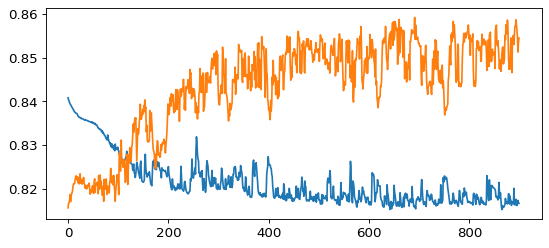

In [42]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


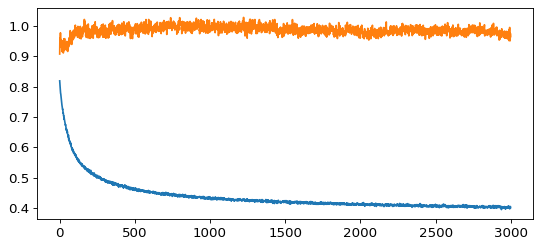

In [80]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


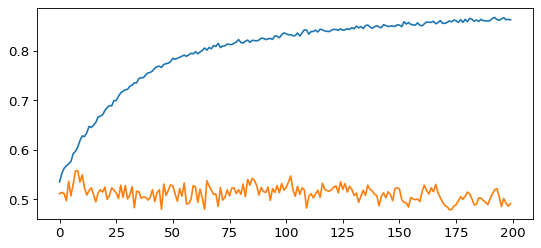

In [120]:
print(history5.history.keys())
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])

dict_keys(['loss', 'val_loss'])


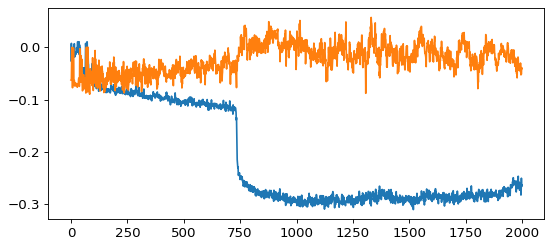

In [340]:
print(history6.history.keys())
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])

Index(['loss', 'val_loss'], dtype='object')


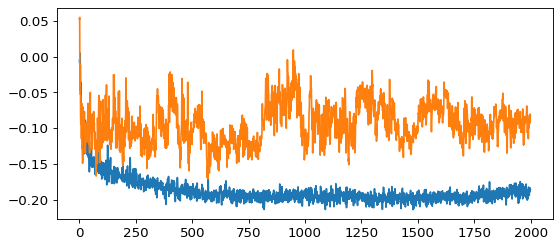

In [266]:
print(history7.history.keys())
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])

dict_keys(['loss', 'val_loss'])


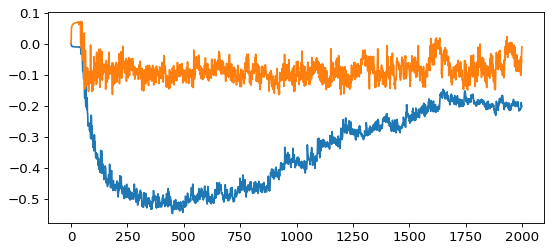

In [49]:
print(history8.history.keys())
plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])

Index(['loss', 'custom_loss_function', 'mean_absolute_error',
       'mean_squared_error', 'val_loss', 'val_custom_loss_function',
       'val_mean_absolute_error', 'val_mean_squared_error'],
      dtype='object')


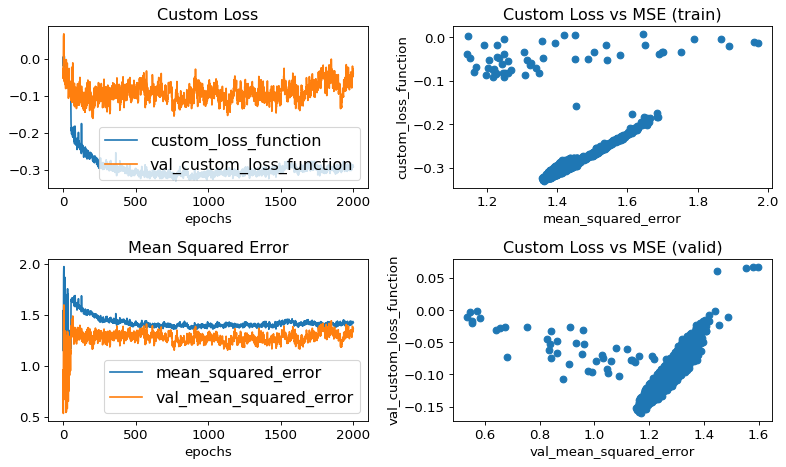

In [414]:
print(history11.history.keys())

history = history11.history
fig, axs = plt.subplots(2, 2, figsize=(10,6))
axs[0, 0].plot(history['custom_loss_function'], label="custom_loss_function") ; axs[0, 0].set_title('Custom Loss')
axs[0, 0].plot(history['val_custom_loss_function'], label="val_custom_loss_function")
axs[0, 0].set_xlabel('epochs')
axs[0, 0].legend(loc='lower right')

axs[1, 0].plot(history['mean_squared_error'], label="mean_squared_error") ; axs[1, 0].set_title('Mean Squared Error')
axs[1, 0].plot(history['val_mean_squared_error'], label="val_mean_squared_error")
axs[1, 0].set_xlabel('epochs')
axs[1, 0].legend(loc='lower right')

axs[0, 1].scatter(y=history['custom_loss_function'], x=history['mean_squared_error']) ; axs[0, 1].set_title('Custom Loss vs MSE (train)')
axs[0, 1].set_ylabel('custom_loss_function')
axs[0, 1].set_xlabel('mean_squared_error')

axs[1, 1].scatter(y=history['val_custom_loss_function'], x=history['val_mean_squared_error']) ; axs[1, 1].set_title('Custom Loss vs MSE (valid)')
axs[1, 1].set_ylabel('val_custom_loss_function')
axs[1, 1].set_xlabel('val_mean_squared_error')

fig.tight_layout()

dict_keys(['loss', 'custom_loss_function', 'mean_absolute_error', 'mean_squared_error', 'val_loss', 'val_custom_loss_function', 'val_mean_absolute_error', 'val_mean_squared_error'])


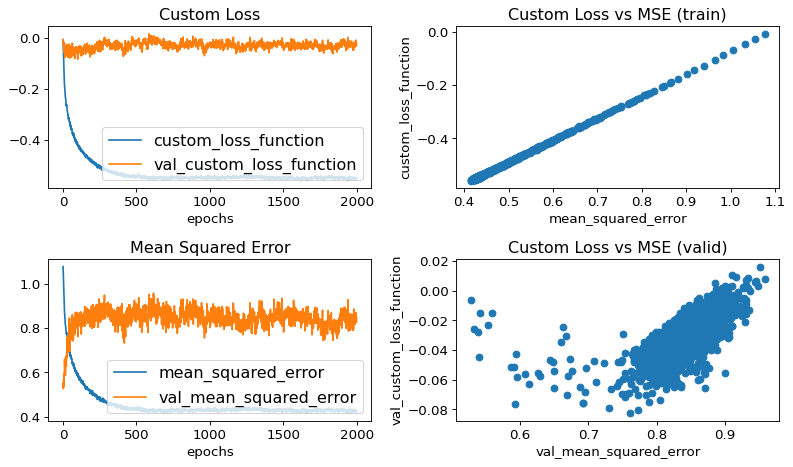

In [411]:
print(history12.history.keys())

history = history12.history
fig, axs = plt.subplots(2, 2, figsize=(10,6))
axs[0, 0].plot(history['custom_loss_function'], label="custom_loss_function") ; axs[0, 0].set_title('Custom Loss')
axs[0, 0].plot(history['val_custom_loss_function'], label="val_custom_loss_function")
axs[0, 0].set_xlabel('epochs')
axs[0, 0].legend(loc='lower right')

axs[1, 0].plot(history['mean_squared_error'], label="mean_squared_error") ; axs[1, 0].set_title('Mean Squared Error')
axs[1, 0].plot(history['val_mean_squared_error'], label="val_mean_squared_error")
axs[1, 0].set_xlabel('epochs')
axs[1, 0].legend(loc='lower right')

axs[0, 1].scatter(y=history['custom_loss_function'], x=history['mean_squared_error']) ; axs[0, 1].set_title('Custom Loss vs MSE (train)')
axs[0, 1].set_ylabel('custom_loss_function')
axs[0, 1].set_xlabel('mean_squared_error')

axs[1, 1].scatter(y=history['val_custom_loss_function'], x=history['val_mean_squared_error']) ; axs[1, 1].set_title('Custom Loss vs MSE (valid)')
axs[1, 1].set_ylabel('val_custom_loss_function')
axs[1, 1].set_xlabel('val_mean_squared_error')

fig.tight_layout()

dict_keys(['loss', 'custom_loss_function', 'mean_absolute_error', 'mean_squared_error', 'val_loss', 'val_custom_loss_function', 'val_mean_absolute_error', 'val_mean_squared_error'])


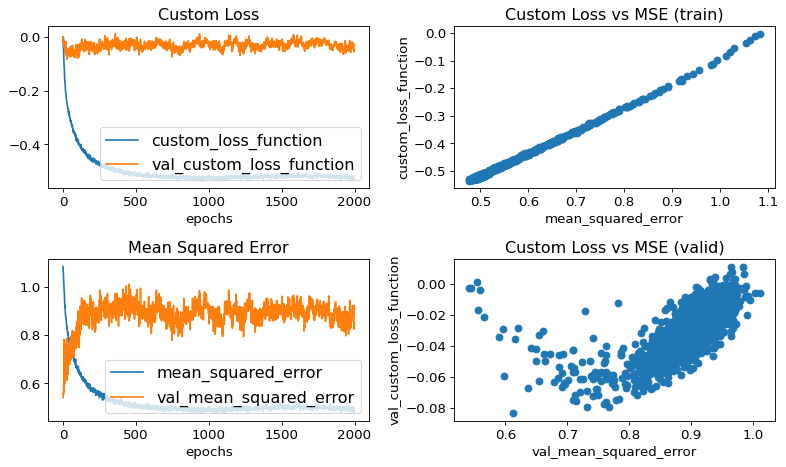

In [409]:
print(history13.history.keys())

history = history13.history
fig, axs = plt.subplots(2, 2, figsize=(10,6))
axs[0, 0].plot(history['custom_loss_function'], label="custom_loss_function") ; axs[0, 0].set_title('Custom Loss')
axs[0, 0].plot(history['val_custom_loss_function'], label="val_custom_loss_function")
axs[0, 0].set_xlabel('epochs')
axs[0, 0].legend(loc='lower right')

axs[1, 0].plot(history['mean_squared_error'], label="mean_squared_error") ; axs[1, 0].set_title('Mean Squared Error')
axs[1, 0].plot(history['val_mean_squared_error'], label="val_mean_squared_error")
axs[1, 0].set_xlabel('epochs')
axs[1, 0].legend(loc='lower right')

axs[0, 1].scatter(y=history['custom_loss_function'], x=history['mean_squared_error']) ; axs[0, 1].set_title('Custom Loss vs MSE (train)')
axs[0, 1].set_ylabel('custom_loss_function')
axs[0, 1].set_xlabel('mean_squared_error')

axs[1, 1].scatter(y=history['val_custom_loss_function'], x=history['val_mean_squared_error']) ; axs[1, 1].set_title('Custom Loss vs MSE (valid)')
axs[1, 1].set_ylabel('val_custom_loss_function')
axs[1, 1].set_xlabel('val_mean_squared_error')

fig.tight_layout()

dict_keys(['loss', 'custom_loss_function', 'mean_absolute_error', 'mean_squared_error', 'val_loss', 'val_custom_loss_function', 'val_mean_absolute_error', 'val_mean_squared_error'])


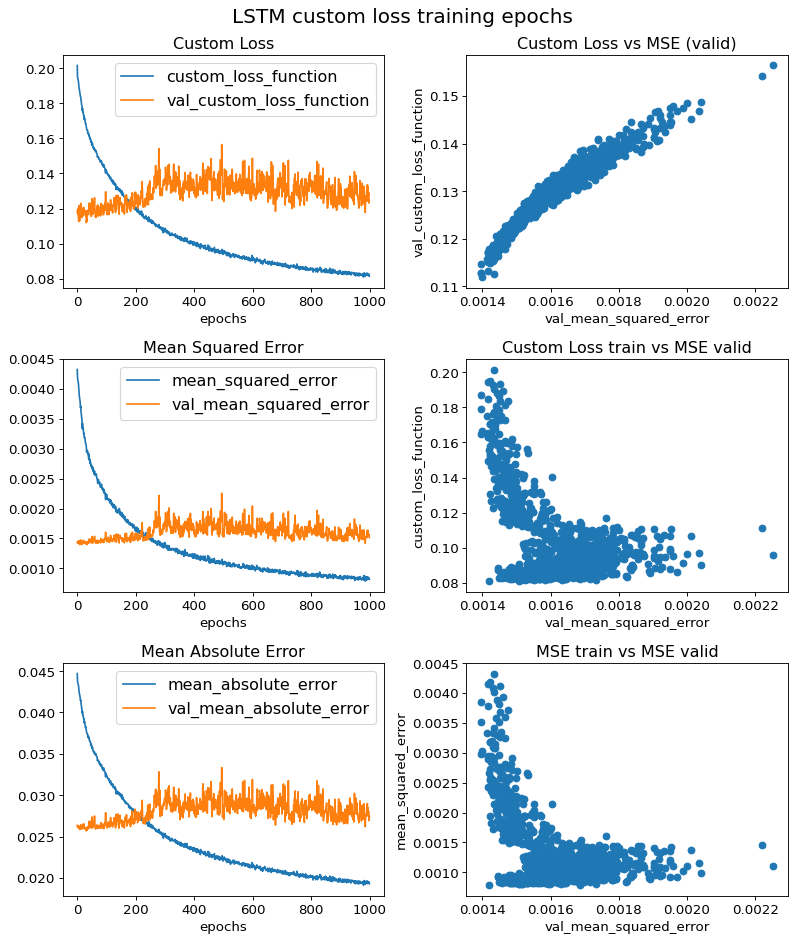

In [1000]:
print(history14.history.keys())

history = pd.read_csv('models/history14_1000epochs.csv')
fig, axs = plt.subplots(3, 2, figsize=(10,12))

plot_title = 'LSTM custom loss training epochs'

plt.suptitle(plot_title, fontsize=18)
axs[0, 0].plot(history['custom_loss_function'], label="custom_loss_function") ; axs[0, 0].set_title('Custom Loss')
axs[0, 0].plot(history['val_custom_loss_function'], label="val_custom_loss_function")
axs[0, 0].set_xlabel('epochs')
axs[0, 0].legend(loc='upper right')

axs[1, 0].plot(history['mean_squared_error'], label="mean_squared_error") ; axs[1, 0].set_title('Mean Squared Error')
axs[1, 0].plot(history['val_mean_squared_error'], label="val_mean_squared_error")
axs[1, 0].set_xlabel('epochs')
axs[1, 0].legend(loc='upper right')

axs[2, 0].plot(history['mean_absolute_error'], label="mean_absolute_error") ; axs[2, 0].set_title('Mean Absolute Error')
axs[2, 0].plot(history['val_mean_absolute_error'], label="val_mean_absolute_error")
axs[2, 0].set_xlabel('epochs')
axs[2, 0].legend(loc='upper right')

axs[0, 1].scatter(y=history['val_custom_loss_function'], x=history['val_mean_squared_error']) ; axs[0, 1].set_title('Custom Loss vs MSE (valid)')
axs[0, 1].set_ylabel('val_custom_loss_function')
axs[0, 1].set_xlabel('val_mean_squared_error')

axs[1, 1].scatter(y=history['custom_loss_function'], x=history['val_mean_squared_error']) ; axs[1, 1].set_title('Custom Loss train vs MSE valid')
axs[1, 1].set_ylabel('custom_loss_function')
axs[1, 1].set_xlabel('val_mean_squared_error')

axs[2, 1].scatter(y=history['mean_squared_error'], x=history['val_mean_squared_error']) ; axs[2, 1].set_title('MSE train vs MSE valid')
axs[2, 1].set_ylabel('mean_squared_error')
axs[2, 1].set_xlabel('val_mean_squared_error')

fig.tight_layout()
plt.savefig('models_descr/'+ plot_title + '.png', bbox_inches = "tight")

In [591]:
pd.DataFrame(history14.history).sort_values(by='val_loss')

loss  custom_loss_function  mean_absolute_error  mean_squared_error  \
31   0.166451              0.166453             0.037890            0.003027   
33   0.164861              0.164866             0.037498            0.002977   
5    0.190564              0.190566             0.043002            0.004018   
8    0.186913              0.186911             0.042192            0.003842   
32   0.165359              0.165356             0.037593            0.002944   
..        ...                   ...                  ...                 ...   
490  0.095440              0.095443             0.022435            0.001111   
458  0.096340              0.096339             0.022641            0.001106   
599  0.090315              0.090315             0.021243            0.000982   
279  0.110940              0.110939             0.025890            0.001459   
494  0.095864              0.095867             0.022509            0.001114   

     val_loss  val_custom_loss_function  val_mean_absolute_error  \
31   0.111908                  0.111941                 0.025684   
33   0.112665                  0.112731                 0.025765   
5    0.112669                  0.112632                 0.026015   
8    0.112783                  0.112844                 0.025866   
32   0.113246                  0.113291                 0.025801   
..        ...                       ...                      ...   
490  0.147863                  0.147859                 0.031558   
458  0.148574                  0.148459                 0.031653   
599  0.148742                  0.148642                 0.031898   
279  0.154415                  0.154198                 0.032833   
494  0.156616                  0.156421                 0.033345   

     val_mean_squared_error  
31                 0.001398  
33                 0.001397  
5                  0.001433  
8                  0.001397  
32                 0.001416  
..                      ...  
490                0.001958  
458                0.002000  
599                0.002041  
279                0.002220  
494                0.002252  

[1000 rows x 8 columns]

dict_keys(['loss', 'custom_loss_function', 'mean_absolute_error', 'mean_squared_error', 'val_loss', 'val_custom_loss_function', 'val_mean_absolute_error', 'val_mean_squared_error'])


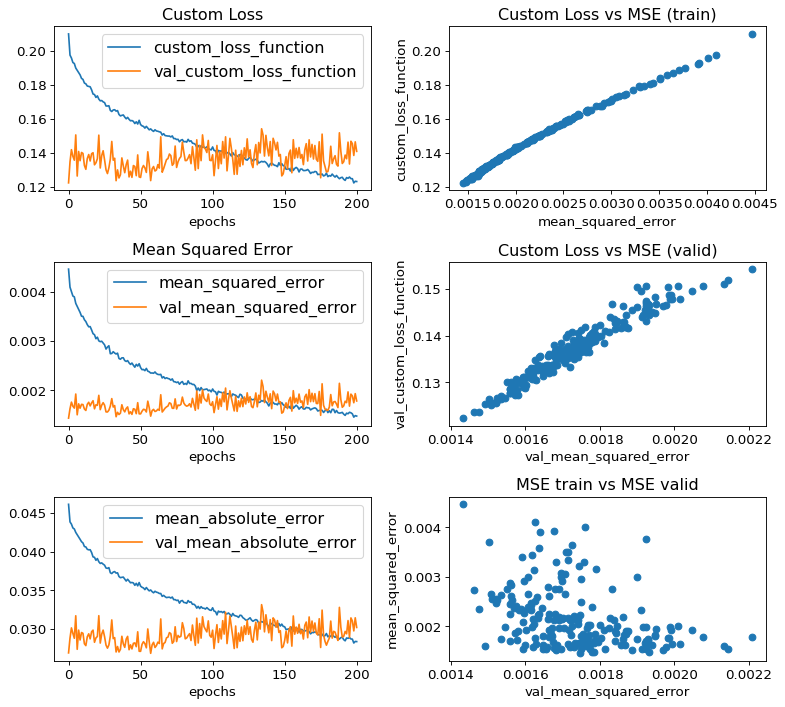

In [695]:
print(history15.history.keys())

history = history15.history
fig, axs = plt.subplots(3, 2, figsize=(10,9))
axs[0, 0].plot(history['custom_loss_function'], label="custom_loss_function") ; axs[0, 0].set_title('Custom Loss')
axs[0, 0].plot(history['val_custom_loss_function'], label="val_custom_loss_function")
axs[0, 0].set_xlabel('epochs')
axs[0, 0].legend(loc='upper right')

axs[1, 0].plot(history['mean_squared_error'], label="mean_squared_error") ; axs[1, 0].set_title('Mean Squared Error')
axs[1, 0].plot(history['val_mean_squared_error'], label="val_mean_squared_error")
axs[1, 0].set_xlabel('epochs')
axs[1, 0].legend(loc='upper right')

axs[2, 0].plot(history['mean_absolute_error'], label="mean_absolute_error") ; axs[1, 0].set_title('Mean Squared Error')
axs[2, 0].plot(history['val_mean_absolute_error'], label="val_mean_absolute_error")
axs[2, 0].set_xlabel('epochs')
axs[2, 0].legend(loc='upper right')

axs[0, 1].scatter(y=history['custom_loss_function'], x=history['mean_squared_error']) ; axs[0, 1].set_title('Custom Loss vs MSE (train)')
axs[0, 1].set_ylabel('custom_loss_function')
axs[0, 1].set_xlabel('mean_squared_error')

axs[1, 1].scatter(y=history['val_custom_loss_function'], x=history['val_mean_squared_error']) ; axs[1, 1].set_title('Custom Loss vs MSE (valid)')
axs[1, 1].set_ylabel('val_custom_loss_function')
axs[1, 1].set_xlabel('val_mean_squared_error')

axs[2, 1].scatter(y=history['mean_squared_error'], x=history['val_mean_squared_error']) ; axs[2, 1].set_title('MSE train vs MSE valid')
axs[2, 1].set_ylabel('mean_squared_error')
axs[2, 1].set_xlabel('val_mean_squared_error')

fig.tight_layout()

In [696]:
pd.DataFrame(history15.history).sort_values(by='val_loss')

loss  custom_loss_function  mean_absolute_error  mean_squared_error  \
0    0.004468              0.209938             0.046084            0.004468   
33   0.002739              0.164544             0.037228            0.002739   
57   0.002351              0.154113             0.035059            0.002351   
175  0.001594              0.127085             0.029247            0.001594   
6    0.003709              0.188533             0.042180            0.003709   
..        ...                   ...                  ...                 ...   
109  0.001916              0.139683             0.031949            0.001916   
135  0.001777              0.134697             0.030915            0.001777   
176  0.001593              0.127606             0.029375            0.001593   
188  0.001536              0.124822             0.028738            0.001536   
134  0.001792              0.135025             0.030991            0.001792   

     val_loss  val_custom_loss_function  val_mean_absolute_error  \
0    0.001434                  0.122383                 0.026959   
33   0.001462                  0.123654                 0.027078   
57   0.001474                  0.123701                 0.026903   
175  0.001490                  0.125363                 0.027657   
6    0.001501                  0.126383                 0.027421   
..        ...                       ...                      ...   
109  0.002046                  0.149448                 0.032188   
135  0.002077                  0.150523                 0.032235   
176  0.002133                  0.151043                 0.032468   
188  0.002143                  0.151823                 0.032819   
134  0.002207                  0.154177                 0.033169   

     val_mean_squared_error  
0                  0.001434  
33                 0.001462  
57                 0.001474  
175                0.001490  
6                  0.001501  
..                      ...  
109                0.002046  
135                0.002077  
176                0.002133  
188                0.002143  
134                0.002207  

[201 rows x 8 columns]

dict_keys(['loss', 'custom_loss_function', 'mean_absolute_error', 'mean_squared_error', 'val_loss', 'val_custom_loss_function', 'val_mean_absolute_error', 'val_mean_squared_error'])


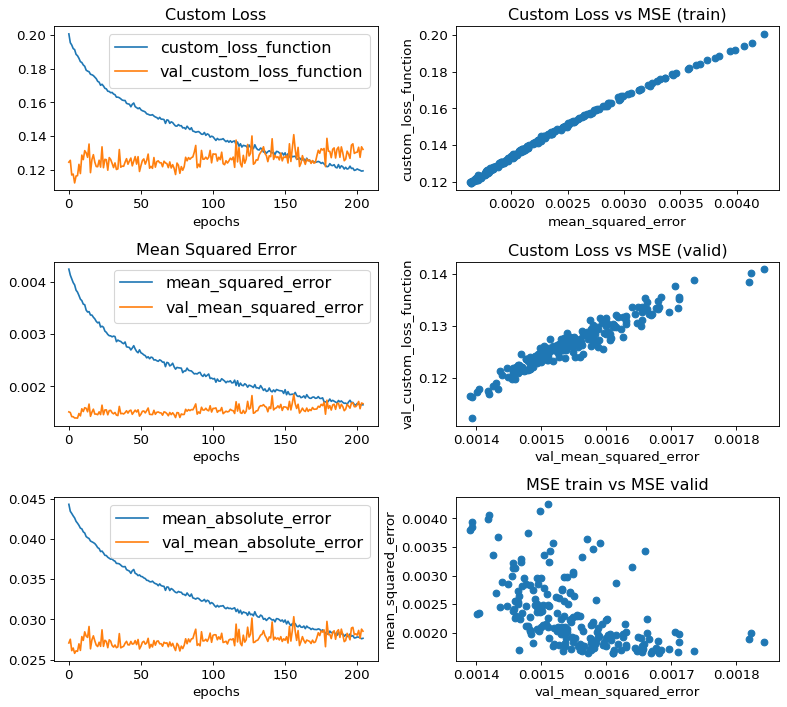

In [697]:
print(history16.history.keys())

history = history16.history
fig, axs = plt.subplots(3, 2, figsize=(10,9))
axs[0, 0].plot(history['custom_loss_function'], label="custom_loss_function") ; axs[0, 0].set_title('Custom Loss')
axs[0, 0].plot(history['val_custom_loss_function'], label="val_custom_loss_function")
axs[0, 0].set_xlabel('epochs')
axs[0, 0].legend(loc='upper right')

axs[1, 0].plot(history['mean_squared_error'], label="mean_squared_error") ; axs[1, 0].set_title('Mean Squared Error')
axs[1, 0].plot(history['val_mean_squared_error'], label="val_mean_squared_error")
axs[1, 0].set_xlabel('epochs')
axs[1, 0].legend(loc='upper right')

axs[2, 0].plot(history['mean_absolute_error'], label="mean_absolute_error") ; axs[1, 0].set_title('Mean Squared Error')
axs[2, 0].plot(history['val_mean_absolute_error'], label="val_mean_absolute_error")
axs[2, 0].set_xlabel('epochs')
axs[2, 0].legend(loc='upper right')

axs[0, 1].scatter(y=history['custom_loss_function'], x=history['mean_squared_error']) ; axs[0, 1].set_title('Custom Loss vs MSE (train)')
axs[0, 1].set_ylabel('custom_loss_function')
axs[0, 1].set_xlabel('mean_squared_error')

axs[1, 1].scatter(y=history['val_custom_loss_function'], x=history['val_mean_squared_error']) ; axs[1, 1].set_title('Custom Loss vs MSE (valid)')
axs[1, 1].set_ylabel('val_custom_loss_function')
axs[1, 1].set_xlabel('val_mean_squared_error')

axs[2, 1].scatter(y=history['mean_squared_error'], x=history['val_mean_squared_error']) ; axs[2, 1].set_title('MSE train vs MSE valid')
axs[2, 1].set_ylabel('mean_squared_error')
axs[2, 1].set_xlabel('val_mean_squared_error')

fig.tight_layout()

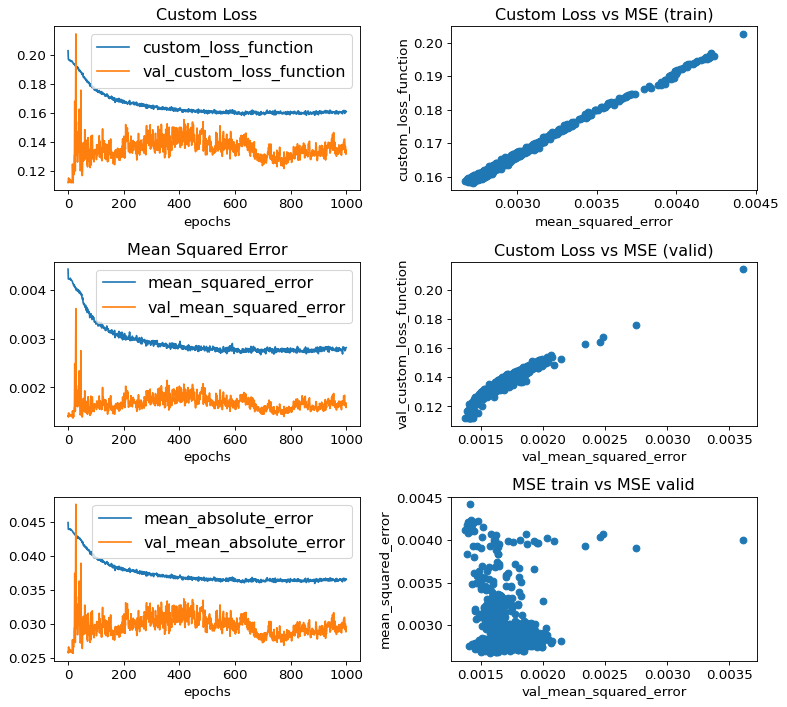

In [880]:
# print(history17.history.keys())

history = pd.read_csv('models/history17_1000epochs.csv')
fig, axs = plt.subplots(3, 2, figsize=(10,9))
axs[0, 0].plot(history['custom_loss_function'], label="custom_loss_function") ; axs[0, 0].set_title('Custom Loss')
axs[0, 0].plot(history['val_custom_loss_function'], label="val_custom_loss_function")
axs[0, 0].set_xlabel('epochs')
axs[0, 0].legend(loc='upper right')

axs[1, 0].plot(history['mean_squared_error'], label="mean_squared_error") ; axs[1, 0].set_title('Mean Squared Error')
axs[1, 0].plot(history['val_mean_squared_error'], label="val_mean_squared_error")
axs[1, 0].set_xlabel('epochs')
axs[1, 0].legend(loc='upper right')

axs[2, 0].plot(history['mean_absolute_error'], label="mean_absolute_error") ; axs[1, 0].set_title('Mean Squared Error')
axs[2, 0].plot(history['val_mean_absolute_error'], label="val_mean_absolute_error")
axs[2, 0].set_xlabel('epochs')
axs[2, 0].legend(loc='upper right')

axs[0, 1].scatter(y=history['custom_loss_function'], x=history['mean_squared_error']) ; axs[0, 1].set_title('Custom Loss vs MSE (train)')
axs[0, 1].set_ylabel('custom_loss_function')
axs[0, 1].set_xlabel('mean_squared_error')

axs[1, 1].scatter(y=history['val_custom_loss_function'], x=history['val_mean_squared_error']) ; axs[1, 1].set_title('Custom Loss vs MSE (valid)')
axs[1, 1].set_ylabel('val_custom_loss_function')
axs[1, 1].set_xlabel('val_mean_squared_error')

axs[2, 1].scatter(y=history['mean_squared_error'], x=history['val_mean_squared_error']) ; axs[2, 1].set_title('MSE train vs MSE valid')
axs[2, 1].set_ylabel('mean_squared_error')
axs[2, 1].set_xlabel('val_mean_squared_error')

fig.tight_layout()

In [873]:
pd.DataFrame(pd.read_csv('models/history17_1000epochs.csv')).sort_values(by='val_loss')

loss  custom_loss_function  mean_absolute_error  mean_squared_error  \
18  0.194112              0.194110             0.043514            0.004123   
12  0.195197              0.195193             0.043837            0.004193   
0   0.202619              0.202618             0.044927            0.004419   
1   0.196974              0.196976             0.043932            0.004217   
8   0.196057              0.196058             0.043969            0.004234   
..       ...                   ...                  ...                 ...   
40  0.188706              0.188704             0.042547            0.003931   
27  0.192418              0.192422             0.043102            0.004041   
24  0.192657              0.192659             0.043161            0.004067   
46  0.188207              0.188206             0.042415            0.003906   
28  0.191843              0.191841             0.042965            0.004003   

    val_loss  val_custom_loss_function  val_mean_absolute_error  \
18  0.111865                  0.111927                 0.025684   
12  0.111967                  0.112053                 0.025856   
0   0.112095                  0.112188                 0.025884   
1   0.112104                  0.112178                 0.025742   
8   0.112114                  0.112217                 0.025948   
..       ...                       ...                      ...   
40  0.162817                  0.162510                 0.036322   
27  0.164960                  0.164168                 0.036796   
24  0.168500                  0.167915                 0.037458   
46  0.175697                  0.175535                 0.038939   
28  0.214840                  0.214137                 0.047613   

    val_mean_squared_error  
18                0.001372  
12                0.001414  
0                 0.001415  
1                 0.001394  
8                 0.001426  
..                     ...  
40                0.002338  
27                0.002459  
24                0.002485  
46                0.002751  
28                0.003611  

[1000 rows x 8 columns]

<AxesSubplot:>

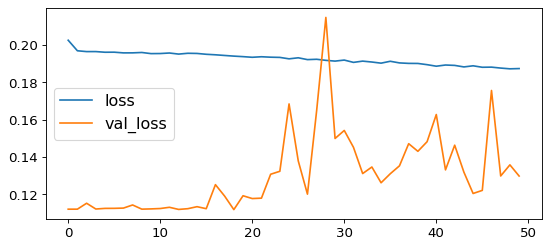

In [875]:
pd.read_csv('models/history17_1000epochs.csv')[:50][['loss', 'val_loss']].plot()

# Plots

In [1035]:
def plot_nn_epochs(history, plot_title='', dont_show=False):

    fig, axs = plt.subplots(3, 2, figsize=(10,12))
    plt.suptitle(plot_title, fontsize=18)
    axs[0, 0].plot(history['custom_loss_function'], label="custom_loss_function") ; axs[0, 0].set_title('Custom Loss')
    axs[0, 0].plot(history['val_custom_loss_function'], label="val_custom_loss_function")
    axs[0, 0].set_xlabel('epochs')
    axs[0, 0].legend(loc='upper right')

    axs[1, 0].plot(history['mean_squared_error'], label="mean_squared_error") ; axs[1, 0].set_title('Mean Squared Error')
    axs[1, 0].plot(history['val_mean_squared_error'], label="val_mean_squared_error")
    axs[1, 0].set_xlabel('epochs')
    axs[1, 0].legend(loc='upper right')

    axs[2, 0].plot(history['mean_absolute_error'], label="mean_absolute_error") ; axs[2, 0].set_title('Mean Absolute Error')
    axs[2, 0].plot(history['val_mean_absolute_error'], label="val_mean_absolute_error")
    axs[2, 0].set_xlabel('epochs')
    axs[2, 0].legend(loc='upper right')

    axs[0, 1].scatter(y=history['val_custom_loss_function'], x=history['val_mean_squared_error']) ; axs[0, 1].set_title('Custom Loss vs MSE (valid)')
    axs[0, 1].set_ylabel('val_custom_loss_function')
    axs[0, 1].set_xlabel('val_mean_squared_error')

    axs[1, 1].scatter(y=history['custom_loss_function'], x=history['val_mean_squared_error']) ; axs[1, 1].set_title('Custom Loss train vs MSE valid')
    axs[1, 1].set_ylabel('custom_loss_function')
    axs[1, 1].set_xlabel('val_mean_squared_error')

    axs[2, 1].scatter(y=history['mean_squared_error'], x=history['val_mean_squared_error']) ; axs[2, 1].set_title('MSE train vs MSE valid')
    axs[2, 1].set_ylabel('mean_squared_error')
    axs[2, 1].set_xlabel('val_mean_squared_error')

    fig.tight_layout()
    plt.savefig('models_descr/' + '6plots_'+ plot_title, bbox_inches = "tight", dpi=320)
    
    if dont_show:
        plt.close()
    else:
        plt.show()

In [1039]:
def one_plot_epochs(history, plot_title, loss_label, val_loss_label, loc='upper right', dont_show=True):
    plt.title(plot_title)
    plt.plot(history['loss'], label=loss_label)
    plt.plot(history['val_loss'], label=val_loss_label)
    plt.xlabel('epochs')
    plt.legend(loc=loc)
    plt.savefig('models_descr/'+ '1plot_' + plot_title, bbox_inches = "tight", dpi=320)
    if dont_show:
        plt.close()
    else:
        plt.show()

In [1040]:
list(pd.read_csv('models/history14_1000epochs.csv').columns)

['loss',
 'custom_loss_function',
 'mean_absolute_error',
 'mean_squared_error',
 'val_loss',
 'val_custom_loss_function',
 'val_mean_absolute_error',
 'val_mean_squared_error']

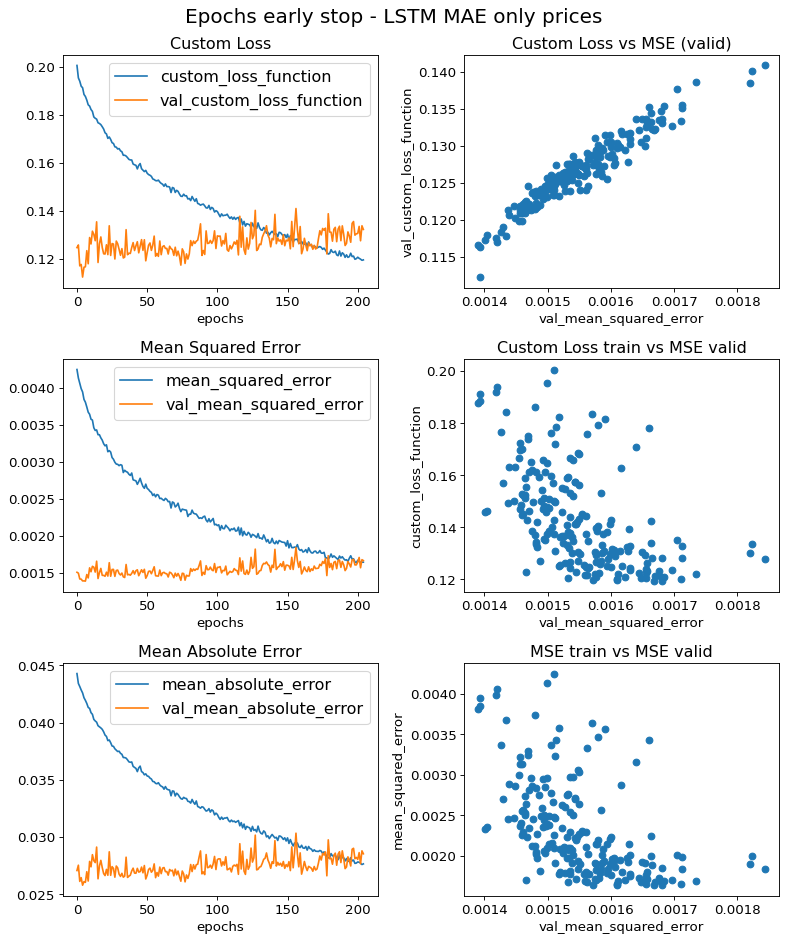

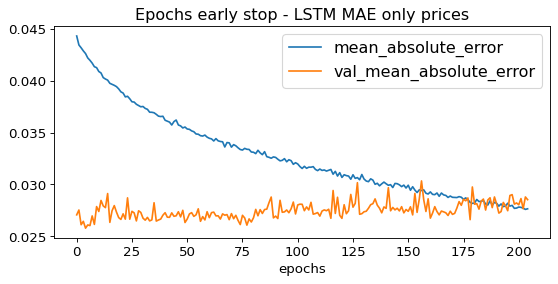

In [3264]:
model_now = 'LSTM MAE only prices'

history=history16.history # pd.read_csv('models/history19_1000epochs.csv')
plot_nn_epochs(
    history=history,
    plot_title='Epochs early stop - ' + model_now,
    dont_show=False
)
one_plot_epochs(
    history=history,
    plot_title='Epochs early stop - ' + model_now,
    loss_label='mean_absolute_error',
    val_loss_label='val_mean_absolute_error',
    loc='upper right',
    dont_show=False
)

In [2661]:
def treshold_plots(treshold_pred_result, plot_title, dont_show):
    fig, axs = plt.subplots(2, 2, figsize = (8, 8))
    plt.suptitle(plot_title, fontsize=18)
    
    axs[0, 0].plot('treshold_pred', 'mean_result_per_day', data=treshold_pred_result)
    axs[0, 0].title.set_text('Mean return per day')
    axs[0, 0].set_xlabel('prob threshold')

    axs[1, 0].plot('treshold_pred', 'product_result', data=treshold_pred_result)
    axs[1, 0].title.set_text('Strategy result')
    axs[1, 0].set_xlabel('prob threshold')

    axs[0, 1].plot('treshold_pred', 'q95_orders', data=treshold_pred_result)
    axs[0, 1].title.set_text('q95 of orders per day')
    axs[0, 1].set_xlabel('prob threshold')

    axs[1, 1].scatter('q95_orders', 'product_result', data=treshold_pred_result, marker='.')
    axs[1, 1].title.set_text('Strategy result vs. q95 orders')
    axs[1, 1].set_xlabel('q95_orders')
    axs[1, 1].set_ylabel('strategy result')
    
    fig.tight_layout()
    plt.savefig('models_descr/'+ 'threshold_plots' + plot_title, bbox_inches = "tight", dpi=320)
    
    if dont_show:
        plt.close()
    else:
        plt.show()

In [2567]:
treshold_plots(treshold_pred_result, plot_title='Probability thresholds - LSTM custom loss with news', dont_show=False)

# Simple models

# Data preparations

In [4030]:
import trade_news_predict_prices

all_stock_prices_shifts = pd.DataFrame(data = [], columns=[])

print(str(datetime.now()))

for ric_now in rics_to_iterate:
    data_now = all_stock_prices[all_stock_prices['ric'] == ric_now]
    
    data_now, features_cols = trade_news_predict_prices.create_features_for_df(
        data_now=data_now, news_too=True, news_cols=news_cols, window_of_change=5) # news
    
    all_stock_prices_shifts = all_stock_prices_shifts.append(data_now, ignore_index=True)

print()
print(str(datetime.now()))

2021-05-30 23:28:39.496942
352, 352, 351, 355, 356, 351, 355, 356, 354, 353, 356, 351, 356, 356, 355, 354, 354, 351, 351, 356, 351, 356, 354, 351, 355, 354, 356, 351, 355, 355, 354, 354, 356, 346, 59, 356, 356, 355, 354, 351, 354, 355, 356, 354, 354, 356, 355, 351, 349, 351, 345, 356, 349, 355, 356, 351, 355, 350, 354, 351, 355, 351, 356, 346, 336, 350, 356, 349, 
2021-05-30 23:28:49.294207


In [4031]:
for i in all_stock_prices_shifts.columns:
    print(i, end=', ')

Date, VALUE, VOLUME, HIGH, LOW, OPEN, CLOSE, COUNT, ric, Date.1, my_label_Analyst_Rating, my_label_Collaboration, my_label_Contract_-_Agreement_-_Deal, my_label_Credit_Debt_Rating, my_label_Dividend, my_label_Eco_Issues, my_label_Executive_Change, my_label_Financial_Results, my_label_Investigation, my_label_Investment, my_label_Lawsuit, my_label_Price_Target, my_label_Product_Update, my_label_Security_Protection, my_label_Settlement, my_label_Stock_Buyback, my_label_Workforce_Change, my_label_digest, date_time, y_change_5, price_change_close_shift_n, price_change_open_shift_n, price_change_low_shift_n, price_change_high_shift_n, price_change_0, price_change_1, price_change_2, price_change_3, price_change_4, price_change_5, price_change_6, price_change_7, price_change_8, price_change_9, price_change_10, price_change_11, price_change_12, price_change_13, price_change_14, price_change_15, price_change_16, price_change_17, price_change_18, price_change_19, price_change_20, price_change_21,

In [4032]:
# Next data preparation is in next section
all_stock_prices_shifts_n = all_stock_prices_shifts
print(all_stock_prices_shifts_n.shape)

all_stock_prices_shifts_n.dropna(axis=0, how='any', thresh=None, subset=features_cols + ['y_change_5'], inplace=True) #  + news_features_cols
print(all_stock_prices_shifts_n.shape)

(23710, 179)
(18496, 179)


In [4033]:
all_stock_prices_shifts_n['date_time'] = pd.to_datetime(all_stock_prices_shifts_n['Date'], format='%Y-%m-%d')
all_stock_prices_shifts_n = all_stock_prices_shifts_n.sort_values(by='date_time')
all_stock_prices_shifts_n = all_stock_prices_shifts_n.reset_index(drop=True)

In [4034]:
# all_stock_prices_shifts_n.dropna(axis=0, how='any', thresh=None, subset=features_cols, inplace=True)

In [4035]:
X = np.array(all_stock_prices_shifts_n[features_cols].values.tolist())
y = np.array(all_stock_prices_shifts_n[['y_change_5']].values.tolist())

In [4036]:
# treshold_valid = '2020-11-15'
# treshold_test = '2020-12-12'
cond_train = (all_stock_prices_shifts_n['date_time'] <= pd.to_datetime(treshold_valid, format='%Y-%m-%d'))
cond_valid = (all_stock_prices_shifts_n['date_time'] <= pd.to_datetime(treshold_test, format='%Y-%m-%d')
             ) & (all_stock_prices_shifts_n['date_time'] > pd.to_datetime(treshold_valid, format='%Y-%m-%d'))
cond_test = (all_stock_prices_shifts_n['date_time'] > pd.to_datetime(treshold_test, format='%Y-%m-%d'))

In [4037]:
print(all_stock_prices_shifts_n[cond_train]['date_time'].max())
print(all_stock_prices_shifts_n[cond_valid]['date_time'].max())
print(all_stock_prices_shifts_n[cond_test]['date_time'].max())

X_train = X[cond_train]
X_valid = X[cond_valid]
X_test = X[cond_test]
print(len(X_train))
print(len(X_valid))
print(len(X_test))

y_train = y[cond_train]
y_valid = y[cond_valid]
y_test = y[cond_test]

2020-11-13 00:00:00
2020-12-11 00:00:00
2021-02-16 00:00:00
15742
1304
1450


In [4038]:
X_train.shape

(15742, 138)

# Linear Regr

In [3992]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Train model
model_lin_reg = LinearRegression().fit(X_train, y_train)

# Make prediction on train and test
y_train_pred = model_lin_reg.predict(X_train)
y_valid_pred = model_lin_reg.predict(X_valid)
y_test_pred = model_lin_reg.predict(X_test)

In [3993]:
model_lin_reg.score(X_test, y_test)

-0.09860797608029714

In [3994]:
import numpy as np
from sklearn import metrics
# Train
fpr, tpr, thresholds = metrics.roc_curve(y_train > 0.0, y_train_pred)
print('auc train:', metrics.auc(fpr, tpr))

# Valid
fpr, tpr, thresholds = metrics.roc_curve(y_valid > 0.0, y_valid_pred)
print('auc valid:', metrics.auc(fpr, tpr))

# Test
fpr, tpr, thresholds = metrics.roc_curve(y_test > 0.0, y_test_pred)
print('auc test: ', metrics.auc(fpr, tpr))

# auc train: 0.5980257143544558
# auc valid: 0.5265735925075786
# auc test:  0.4816530537608192

auc train: 0.592398080292825
auc valid: 0.5262297701717175
auc test:  0.5006910395650341


In [3995]:
print('MAE train:', metrics.mean_absolute_error(y_train, y_train_pred))
print('MAE valid:', metrics.mean_absolute_error(y_valid, y_valid_pred))
print('MAE test:', metrics.mean_absolute_error(y_test, y_test_pred))

MAE train: 0.04269697034166731
MAE valid: 0.028390078261553233
MAE test: 0.033734243676644744


In [3996]:
print('MSE train:', metrics.mean_squared_error(y_train, y_train_pred))
print('MSE valid:', metrics.mean_squared_error(y_valid, y_valid_pred))
print('MSE test:', metrics.mean_squared_error(y_test, y_test_pred))

MSE train: 0.0037998405903061274
MSE valid: 0.0015461294816076301
MSE test: 0.002229303203824022


In [3997]:
predicted_valid_df = all_stock_prices_shifts_n[cond_valid]
predicted_test_df = all_stock_prices_shifts_n[cond_test]

predicted_valid_df['pred'] = list(y_valid_pred)
predicted_test_df['pred'] = list(y_test_pred)

predicted_valid_df['actual'] = [i[0] for i in list(y_valid)]
predicted_test_df['actual'] = [i[0] for i in list(y_test)]

print('predicted_valid_df:', len(predicted_valid_df))
print('predicted_test_df:', len(predicted_test_df))

predicted_valid_df: 1304
predicted_test_df: 2451


In [4029]:
treshold = 0.02 # predicted_test_df['pred'].max(), predicted_test_df['pred'].quantile(0.90)

days_result = predicted_test_df[predicted_test_df['pred'] >= treshold].groupby('date_time').agg(
    count=pd.NamedAgg(column='actual', aggfunc=len),
    sum_profit=pd.NamedAgg(column='actual', aggfunc=sum),
    mean=pd.NamedAgg(column='actual', aggfunc=np.mean),
)
days_result[['count', 'mean']]

57

In [3999]:
print('Orders per day q05: ', days_result['count'].quantile(0.10))
print('Orders per day mean:', days_result['count'].mean())
print('Orders per day q90: ', days_result['count'].quantile(0.90))

Orders per day q05:  1.0
Orders per day mean: 5.304347826086956
Orders per day q90:  11.5


In [4000]:
print('Total cumulative result (prod):', np.prod((days_result['mean'])/5 + 1) - 1)
print('Total cumulative result (sum): ', np.sum((days_result['mean'])/5))

Total cumulative result (prod): -0.06932146393442828
Total cumulative result (sum):  -0.06986539100071103


1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 

<AxesSubplot:xlabel='date_time'>

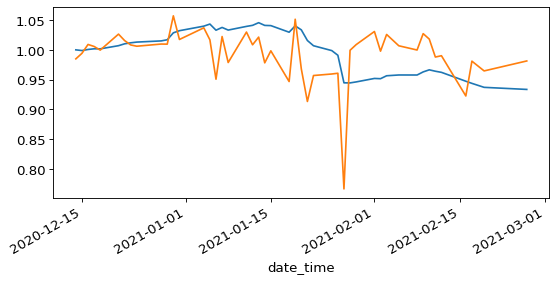

In [4001]:
days_result['current_capital'] = 1
for i in range(1, len(days_result)):
    print(i, end=', ')
    days_result['current_capital'].iloc[i] = days_result['current_capital'].iloc[i-1] * (1 + days_result['mean'].iloc[i]/5)

days_result['current_capital'].plot()
(days_result['mean'] + 1).plot()

In [4002]:
treshold_pred_result = []

for i in range(5, 100):
    treshold_pred = i/(100*10)
    days_result = predicted_test_df[predicted_test_df['pred'] >= treshold_pred].groupby('date_time').agg(
        count=pd.NamedAgg(column='actual', aggfunc=len),
        sum_profit=pd.NamedAgg(column='actual', aggfunc=sum),
        mean=pd.NamedAgg(column='actual', aggfunc=np.mean),
    )
    treshold_pred_result.append(
        [treshold_pred,
         days_result['mean'].mean(),
         np.prod((days_result['mean'])/5 + 1) - 1,
         days_result['count'].mean(),
         days_result['count'].quantile(0.05),
         days_result['count'].quantile(0.95)]
    )

In [4003]:
treshold_pred_result = pd.DataFrame(
    treshold_pred_result, 
    columns=[
        'treshold_pred', 'mean_result_per_day', 'product_result', 
        'mean_orders', 'q05_orders', 'q95_orders'
    ])
treshold_pred_result.head(2)

treshold_pred  mean_result_per_day  product_result  mean_orders  \
0          0.005             0.004238        0.046318    18.148148   
1          0.006             0.003591        0.038290    17.264151   

   q05_orders  q95_orders  
0        1.65        48.1  
1        1.60        46.2

In [4004]:
model_now = 'Regression only prices'
treshold_pred_result.to_csv('models_descr/thresholds/' + 'treshold_pred_result_' + model_now + '.csv')

# Boosting

In [4040]:
import lightgbm as lightgbm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report

# categorical_features = [c for c, cols_x in enumerate(data_train_x.columns) if 'category' in cols_x]

train_data = lightgbm.Dataset(X_train, label=y_train.ravel(), categorical_feature='auto') # , categorical_feature=categorical_features
valid_data = lightgbm.Dataset(X_valid, label=y_valid.ravel())

params = {
#     'is_unbalance': 'true',
    'boosting': 'gbdt', # gbdt, rf, dart, goss
#     'num_leaves': 31, # default = 31, try 300 for overfitting
#     'learning_rate': 0.1, # default = 0.1
#     'max_bin': 255, # default = 255
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8, # bagging_freq should be set to a non zero value
    'bagging_freq': 100, # default = 0
#     'verbose': 0
}
# params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='regression' # 'multiclass', 'binary', 'regression', 'regression_l1'
params['metric']='mean_squared_error' # multi_error, auc, binary_error, average_precision, 'mean_absolute_error'
# params['num_class']=2

print(str(datetime.now()))

# to record eval results for plotting
evals_result = {} 

model_lgbm = lightgbm.train(
    params,
    train_data,
    valid_sets=valid_data,
    evals_result=evals_result,
    num_boost_round=50000,
    early_stopping_rounds=500,
    verbose_eval=False
)

print(str(datetime.now()))
print('best score: ', model_lgbm.best_score)
print('best iteration: ', model_lgbm.best_iteration)

2021-05-30 23:29:13.309537
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012668 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31508
[LightGBM] [Info] Number of data points in the train set: 15742, number of used features: 138
[LightGBM] [Info] Start training from score 0.004248
2021-05-30 23:29:16.514962
best score:  defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('l2', 0.0013667298212525195)])})
best iteration:  2


In [4006]:
# news_cols + features_cols
pd.DataFrame({'Value': model_lgbm.feature_importance('gain'),'Feature': features_cols}).sort_values(by='Value', ascending=False).reset_index().head(50)

index       Value                   Feature
0      90  193.848585                     rsi_0
1      60  180.288732            macd_percent_0
2      15  162.280940           price_change_15
3       3  117.110151            price_change_3
4       6  100.027899            price_change_6
5       0   85.870691            price_change_0
6      16   78.105816           price_change_16
7       4   61.786125            price_change_4
8       7   57.564167            price_change_7
9       5   51.584198            price_change_5
10     89   49.266131           macd_percent_29
11     91   42.497676                     rsi_1
12      1   39.953806            price_change_1
13     87   37.301250           macd_percent_27
14     45   35.599347  stochastic_oscillator_15
15    109   34.145314                    rsi_19
16     73   33.567188           macd_percent_13
17     18   30.265630           price_change_18
18    115   30.222231                    rsi_25
19    116   24.997595                    rsi_26
20    112   23.312533                    rsi_22
21     62   21.111735            macd_percent_2
22     46   20.460523  stochastic_oscillator_16
23     14   20.355065           price_change_14
24    114   19.486102                    rsi_24
25     94   17.928204                     rsi_4
26    103   16.814462                    rsi_13
27     29   16.511960           price_change_29
28     10   16.285005           price_change_10
29     17   15.747268           price_change_17
30     64   15.673376            macd_percent_4
31     55   14.929962  stochastic_oscillator_25
32     28   14.357138           price_change_28
33      8   13.649962            price_change_8
34     63   12.929930            macd_percent_3
35    110   12.884048                    rsi_20
36     86   12.816357           macd_percent_26
37    106   12.520331                    rsi_16
38      9   11.610110            price_change_9
39     84   10.917609           macd_percent_24
40     27   10.451371           price_change_27
41     88   10.354004           macd_percent_28
42     74    9.723425           macd_percent_14
43     38    9.054110   stochastic_oscillator_8
44     85    8.793844           macd_percent_25
45      2    8.657935            price_change_2
46     22    8.437030           price_change_22
47     30    8.329228   stochastic_oscillator_0
48     47    7.646632  stochastic_oscillator_17
49    107    7.337799                    rsi_17

In [4007]:
y_train_pred = model_lgbm.predict(X_train)
y_valid_pred = model_lgbm.predict(X_valid)
y_test_pred = model_lgbm.predict(X_test)

In [4008]:
import numpy as np
from sklearn import metrics
# Train
fpr, tpr, thresholds = metrics.roc_curve(y_train > 0.0, y_train_pred)
print('auc train:', metrics.auc(fpr, tpr))

# Valid
fpr, tpr, thresholds = metrics.roc_curve(y_valid > 0.0, y_valid_pred)
print('auc valid:', metrics.auc(fpr, tpr))

# Test
fpr, tpr, thresholds = metrics.roc_curve(y_test > 0.0, y_test_pred)
print('auc test: ', metrics.auc(fpr, tpr))

# auc train: 0.6321543774714558
# auc valid: 0.4953402388354592
# auc test:  0.5424873594445702

auc train: 0.6387581032758094
auc valid: 0.4690596216985792
auc test:  0.5369088928070161


In [4009]:
print('MAE train:', metrics.mean_absolute_error(y_train, y_train_pred))
print('MAE valid:', metrics.mean_absolute_error(y_valid, y_valid_pred))
print('MAE test:', metrics.mean_absolute_error(y_test, y_test_pred))

MAE train: 0.039298970224755536
MAE valid: 0.026653211239020307
MAE test: 0.03226629035553482


In [4010]:
print('MSE train:', metrics.mean_squared_error(y_train, y_train_pred))
print('MSE valid:', metrics.mean_squared_error(y_valid, y_valid_pred))
print('MSE test:', metrics.mean_squared_error(y_test, y_test_pred))

MSE train: 0.003102352374133271
MSE valid: 0.001415696604909034
MSE test: 0.0020175387305549045


In [4011]:
predicted_valid_df = all_stock_prices_shifts_n[cond_valid]
predicted_test_df = all_stock_prices_shifts_n[cond_test]

predicted_valid_df['pred'] = list(y_valid_pred)
predicted_test_df['pred'] = list(y_test_pred)

predicted_valid_df['actual'] = [i[0] for i in list(y_valid)]
predicted_test_df['actual'] = [i[0] for i in list(y_test)]

print('predicted_valid_df:', len(predicted_valid_df))
print('predicted_test_df:', len(predicted_test_df))

predicted_valid_df: 1304
predicted_test_df: 2451


In [4012]:
treshold = 0.006 # predicted_valid_df['pred'].max(), predicted_valid_df['pred'].quantile(0.95)

pos_orders_count = predicted_valid_df[
    (predicted_valid_df['pred'] >= treshold)
    & (predicted_valid_df['actual'] > 0)
]['actual'].count()

neg_orders_count = predicted_valid_df[
    (predicted_valid_df['pred'] >= treshold)
    & (predicted_valid_df['actual'] < 0)
]['actual'].count()

pos_mean_profit = predicted_valid_df[
    (predicted_valid_df['pred'] >= treshold)
    & (predicted_valid_df['actual'] > 0)
]['actual'].mean()

neg_mean_profit = predicted_valid_df[
    (predicted_valid_df['pred'] >= treshold)
    & (predicted_valid_df['actual'] < 0)
]['actual'].mean()

print('Valid', treshold)
print('Pos count orders:', pos_orders_count)
print('Neg count orders:', neg_orders_count)
print('Precision:', pos_orders_count / (pos_orders_count + neg_orders_count))
print('Positive mean profit per order: ', pos_mean_profit)
print('Negative mean profit per order:', neg_mean_profit)
print('Spread mean profit per order:   ', pos_mean_profit + neg_mean_profit)
print('Mean profit per order:          ', (pos_orders_count*pos_mean_profit + neg_orders_count*neg_mean_profit)/(pos_orders_count + neg_orders_count))

Valid 0.006
Pos count orders: 153
Neg count orders: 115
Precision: 0.5708955223880597
Positive mean profit per order:  0.04213112009229946
Negative mean profit per order: -0.020987167348844482
Spread mean profit per order:    0.02114395274345498
Mean profit per order:           0.015046780332107096


In [4013]:
treshold = 0.006 # predicted_test_df['pred'].max(), predicted_test_df['pred'].quantile(0.99) 

pos_orders_count = predicted_test_df[
    (predicted_test_df['pred'] >= treshold)
    & (predicted_test_df['actual'] > 0)
]['actual'].count()

neg_orders_count = predicted_test_df[
    (predicted_test_df['pred'] >= treshold)
    & (predicted_test_df['actual'] < 0)
]['actual'].count()

pos_mean_profit = predicted_test_df[
    (predicted_test_df['pred'] >= treshold)
    & (predicted_test_df['actual'] > 0)
]['actual'].mean()

neg_mean_profit = predicted_test_df[
    (predicted_test_df['pred'] >= treshold)
    & (predicted_test_df['actual'] < 0)
]['actual'].mean()

print('Test', treshold)
print('Pos count orders:', pos_orders_count)
print('Neg count orders:', neg_orders_count)
print('Precision:', pos_orders_count / (pos_orders_count + neg_orders_count))
print('Positive mean profit per order: ', pos_mean_profit)
print('Negative mean profit per order:', neg_mean_profit)
print('Spread mean profit per order:   ', pos_mean_profit + neg_mean_profit)
print('Mean profit per order:          ', (pos_orders_count*pos_mean_profit + neg_orders_count*neg_mean_profit)/(pos_orders_count + neg_orders_count))

Test 0.006
Pos count orders: 293
Neg count orders: 201
Precision: 0.5931174089068826
Positive mean profit per order:  0.04243970125479944
Negative mean profit per order: -0.024353150073957584
Spread mean profit per order:    0.018086551180841858
Mean profit per order:           0.015262852839657412


In [4014]:
print(y_train_pred.max())
print(y_valid_pred.max())
print(y_test_pred.max())

0.21739315354293912
0.07241559792313755
0.07881312447064148


# Per day Boosting

In [4015]:
treshold = 0.006 # predicted_test_df['pred'].max(), predicted_test_df['pred'].quantile(0.90)

days_result = predicted_test_df[predicted_test_df['pred'] >= treshold].groupby('date_time').agg(
    count=pd.NamedAgg(column='actual', aggfunc=len),
    sum_profit=pd.NamedAgg(column='actual', aggfunc=sum),
    mean=pd.NamedAgg(column='actual', aggfunc=np.mean),
)
days_result[['count', 'mean']]

count      mean
date_time                  
2020-12-14   12.0  0.009506
2020-12-15   15.0 -0.005156
2020-12-16   15.0  0.002170
2020-12-17   21.0  0.011380
2020-12-18   27.0  0.004134
2020-12-21   25.0  0.031976
2020-12-22   41.0  0.026631
2020-12-23   37.0  0.020530
2020-12-24   25.0  0.009743
2020-12-28   40.0  0.010038
2020-12-29   28.0  0.004725
2020-12-30   18.0  0.033094
2020-12-31    4.0  0.077124
2021-01-04   10.0  0.032163
2021-01-05   12.0  0.035323
2021-01-06    6.0  0.050568
2021-01-07    8.0  0.027349
2021-01-08    9.0 -0.005333
2021-01-11   10.0  0.032336
2021-01-12    7.0  0.053596
2021-01-13    8.0  0.036793
2021-01-14    6.0  0.027202
2021-01-15    4.0  0.034740
2021-01-18    1.0 -0.053250
2021-01-19    9.0  0.027774
2021-01-20   12.0 -0.013487
2021-01-21    6.0 -0.006602
2021-01-22    4.0 -0.009298
2021-01-25    2.0 -0.008840
2021-01-26    5.0  0.001690
2021-01-27    4.0  0.053671
2021-01-28    4.0  0.047819
2021-01-29    5.0  0.072079
2021-02-01    3.0  0.037289
2021-02-02    5.0  0.009406
2021-02-03    2.0  0.013999
2021-02-04    2.0  0.000977
2021-02-05    3.0 -0.016405
2021-02-08    4.0  0.005166
2021-02-09    7.0  0.004665
2021-02-10    6.0 -0.001526
2021-02-11    4.0 -0.026532
2021-02-12    2.0 -0.049319
2021-02-16    1.0 -0.069957
2021-02-17    3.0 -0.061179
2021-02-18    4.0 -0.019376
2021-02-19    2.0 -0.029067
2021-02-26    1.0 -0.018658
2021-03-01    1.0 -0.009900
2021-03-03    2.0 -0.028273
2021-03-04    1.0  0.027331
2021-03-05    2.0  0.012725

In [4016]:
print('Orders per day q05: ', days_result['count'].quantile(0.10))
print('Orders per day mean:', days_result['count'].mean())
print('Orders per day q90: ', days_result['count'].quantile(0.90))

Orders per day q05:  2.0
Orders per day mean: 9.51923076923077
Orders per day q90:  25.0


In [4017]:
print('Total cumulative result (prod):', np.prod((days_result['mean'])/5 + 1) - 1)
print('Total cumulative result (sum): ', np.sum((days_result['mean'])/5))

Total cumulative result (prod): 0.09377238293444567
Total cumulative result (sum):  0.09071077174172058


1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 

<AxesSubplot:xlabel='date_time'>

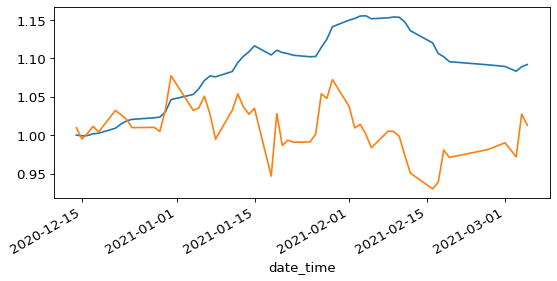

In [4018]:
days_result['current_capital'] = 1
for i in range(1, len(days_result)):
    print(i, end=', ')
    days_result['current_capital'].iloc[i] = days_result['current_capital'].iloc[i-1] * (1 + days_result['mean'].iloc[i]/5)

days_result['current_capital'].plot()
(days_result['mean'] + 1).plot()

In [4019]:
treshold_pred_result = []

for i in range(5, 100):
    treshold_pred = i/(100*10)
    days_result = predicted_test_df[predicted_test_df['pred'] >= treshold_pred].groupby('date_time').agg(
        count=pd.NamedAgg(column='actual', aggfunc=len),
        sum_profit=pd.NamedAgg(column='actual', aggfunc=sum),
        mean=pd.NamedAgg(column='actual', aggfunc=np.mean),
    )
    treshold_pred_result.append(
        [treshold_pred,
         days_result['mean'].mean(),
         np.prod((days_result['mean'])/5 + 1) - 1,
         days_result['count'].mean(),
         days_result['count'].quantile(0.05),
         days_result['count'].quantile(0.95)]
    )

In [4020]:
treshold_pred_result = pd.DataFrame(
    treshold_pred_result, 
    columns=[
        'treshold_pred', 'mean_result_per_day', 'product_result', 
        'mean_orders', 'q05_orders', 'q95_orders'
    ])
treshold_pred_result.head(2)

treshold_pred  mean_result_per_day  product_result  mean_orders  \
0          0.005             0.009006        0.097179    11.211538   
1          0.006             0.008722        0.093772     9.519231   

   q05_orders  q95_orders  
0         1.0       38.60  
1         1.0       32.05

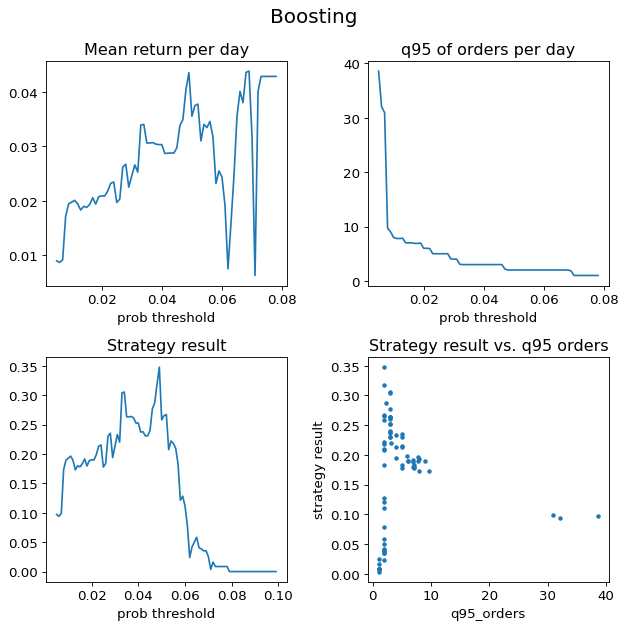

In [4021]:
treshold_plots(treshold_pred_result, plot_title='Boosting', dont_show=False)

In [3615]:
print('treshold value')
for i in range(10, 51, 5): 
    print(i/1000, round(list(treshold_pred_result[
        treshold_pred_result['treshold_pred'] == i/1000
    ]['product_result'])[0], 4))

treshold value
0.01 0.1928
0.015 0.178
0.02 0.19
0.025 0.1776
0.03 0.2135
0.035 0.2632
0.04 0.2525
0.045 0.2396
0.05 0.2581


In [3616]:
print('Count of rics:', len(predicted_test_df[['ric', 'CLOSE']].groupby('ric').agg(['count'])))
print('min day in test:', predicted_test_df['date_time'].min())
print('max day in test:', predicted_test_df['date_time'].max())
print('test date range (with empty days):', predicted_test_df['date_time'].max() - predicted_test_df['date_time'].min())

Count of rics: 67
min day in test: 2020-12-14 00:00:00
max day in test: 2021-03-05 00:00:00
test date range (with empty days): 81 days 00:00:00


In [3617]:
orders_grouped_rics = predicted_test_df[predicted_test_df['pred'] > 0.01].groupby('ric').agg(
    count=pd.NamedAgg(column='actual', aggfunc=len),
    sum_profit=pd.NamedAgg(column='actual', aggfunc=sum),
    mean=pd.NamedAgg(column='actual', aggfunc=np.mean),
).sort_values(by='mean')

In [3618]:
orders_grouped_rics.sort_values('mean')

count  sum_profit      mean
ric                                  
LUMN.N      1.0   -0.031496 -0.031496
DIS.N      14.0   -0.272005 -0.019429
BAYGn.DE    1.0   -0.010288 -0.010288
CBKG.DE     2.0   -0.018899 -0.009449
SAPG.DE    14.0   -0.057608 -0.004115
NFLX.OQ     1.0   -0.002773 -0.002773
JCOM.OQ    10.0   -0.024124 -0.002412
DRIG.DE     5.0   -0.006206 -0.001241
BABA.N     18.0    0.043827  0.002435
MA.N        1.0    0.009724  0.009724
UTDI.DE     4.0    0.062980  0.015745
PYPL.OQ     1.0    0.031751  0.031751
TSLA.OQ    34.0    1.356190  0.039888
ATUS.N      4.0    0.162300  0.040575
DBKGn.DE    1.0    0.043097  0.043097
LHAG.DE     8.0    0.372798  0.046600
INTC.OQ     9.0    0.427997  0.047555
PDD.OQ     24.0    1.181348  0.049223
TKAG.DE    31.0    1.539341  0.049656

50.68535714285714


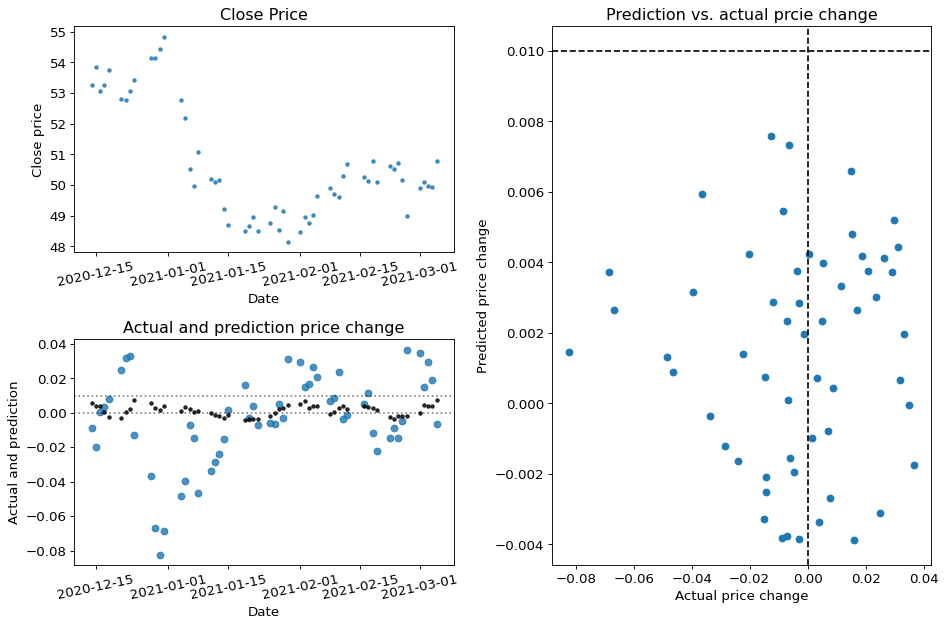

In [3619]:
chosen_rics = ['KO.N'] # 'TKAG.DE', 'TSLA.OQ', 'PDD.OQ', 'BAYGn.DE', 'LHAG.DE', 'FREG.DE', 'TIGO.OQ', 'PH6.F'
treshold = 0.01

df_for_plot = predicted_test_df[predicted_test_df['ric'].isin(chosen_rics)]
mean_price = df_for_plot['CLOSE'].mean()
print(mean_price)

fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot(221)
ax2 = plt.subplot(223)
ax3 = plt.subplot(122)


ax1.plot('date_time', 'CLOSE', '.', 
            data=df_for_plot[df_for_plot['pred'] < treshold], alpha = 0.8)
ax1.plot('date_time', 'CLOSE', 'g^', 
            data=df_for_plot[df_for_plot['pred'] >= treshold], alpha = 0.8)
ax1.tick_params(axis='x', labelrotation = 12)
ax1.title.set_text('Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close price')

ax2.plot('date_time', 'actual', 'o', data=df_for_plot, alpha = 0.8)
ax2.plot('date_time', 'pred', '^', color='green', 
            data=df_for_plot[df_for_plot['pred'] >= treshold], alpha = 0.8)
ax2.plot('date_time', 'pred', '.', color='black', 
            data=df_for_plot[df_for_plot['pred'] < treshold], alpha = 0.8)
ax2.axhline(y=treshold, color='black', linestyle=':', alpha = 0.5)
ax2.axhline(y=0.00, color='black', linestyle=':', alpha = 0.5)
ax2.tick_params(axis='x', labelrotation = 12)
ax2.title.set_text('Actual and prediction price change')
ax2.set_xlabel('Date')
ax2.set_ylabel('Actual and prediction')

ax3.scatter(df_for_plot['actual'], df_for_plot['pred'])
ax3.axhline(y=treshold, color='black', linestyle='--')
ax3.axvline(x=0.0, color='black', linestyle='--')
ax3.title.set_text('Prediction vs. actual prcie change')
ax3.set_xlabel('Actual price change')
ax3.set_ylabel('Predicted price change')

plt.tight_layout()
plt.savefig('exhibits_saved/'+ 'Close price, actual change and prediction ' + str(chosen_rics[0]) + '.png', bbox_inches = "tight")

In [3926]:
model_now = 'LSTM MAE only prices'

# Prediction by LSTM

In [3927]:
applied_model = model16

In [3278]:
# print(str(datetime.now()))
# y_train_pred = pd.Series([i[0] for i in quantile_trained.inverse_transform(np.ones(25) * applied_model.predict(X_train_tr))])
# y_valid_pred = pd.Series([i[0] for i in quantile_trained.inverse_transform(np.ones(25) * applied_model.predict(X_valid_tr))])
# y_test_pred = pd.Series([i[0] for i in quantile_trained.inverse_transform(np.ones(25) * applied_model.predict(X_test_tr))])
# print(str(datetime.now()))

In [3279]:
# y_train = pd.Series([i[0] for i in quantile_trained.inverse_transform(np.ones(25) * y_train_reg_tr)])
# y_valid = pd.Series([i[0] for i in quantile_trained.inverse_transform(np.ones(25) * y_valid_reg_tr)])
# y_test = pd.Series([i[0] for i in quantile_trained.inverse_transform(np.ones(25) * y_test_reg_tr)])

In [3928]:
y_train_pred = pd.Series([i[0] for i in applied_model.predict(X_train_tr)])
y_valid_pred = pd.Series([i[0] for i in applied_model.predict(X_valid_tr)])
y_test_pred = pd.Series([i[0] for i in applied_model.predict(X_test_tr)])

In [3929]:
y_train = pd.Series([i[0] for i in y_train_reg])
y_valid = pd.Series([i[0] for i in y_valid_reg])
y_test = pd.Series([i[0] for i in y_test_reg])

In [3282]:
# y_train = y_train_bi_tr
# y_valid = y_valid_bi_tr
# y_test = y_test_bi_tr

In [3283]:
# y_train = y_train_reg_tr
# y_valid = y_valid_reg_tr
# y_test = y_test_reg_tr

# Results

In [3930]:
import numpy as np
from sklearn import metrics
# Train
fpr, tpr, thresholds = metrics.roc_curve(y_train > 0.0, y_train_pred)
print('auc train:', round(metrics.auc(fpr, tpr), 4))

# Valid
fpr, tpr, thresholds = metrics.roc_curve(y_valid > 0.0, y_valid_pred)
print('auc valid:', round(metrics.auc(fpr, tpr), 4))

# Test
fpr, tpr, thresholds = metrics.roc_curve(y_test > 0.0, y_test_pred)
print('auc test: ', round(metrics.auc(fpr, tpr), 4))

# auc train: 0.5590529787304844
# auc valid: 0.508038338658147
# auc test:  0.6245202558635394

# auc train: 0.5534834459688276
# auc valid: 0.5281432458851814
# auc test:  0.5428435575730829

# auc train: 0.6441050812876832
# auc valid: 0.5529395319114945
# auc test:  0.4925866012160428

# auc train: 0.6118656485717312
# auc valid: 0.5023992103431356
# auc test:  0.49475163161711383

# auc train: 0.7320648591337108
# auc valid: 0.5188834076463333
# auc test:  0.5332350388071896

# auc train: 0.5750093730285953
# auc valid: 0.5719849668774099
# auc test:  0.5705991167241312

# auc train: 0.6470256160773233
# auc valid: 0.5275412265351187
# auc test:  0.5692028564418445

auc train: 0.532
auc valid: 0.4961
auc test:  0.538


In [3931]:
print('MSE train:', round(metrics.mean_squared_error(y_train, y_train_pred), 6))
print('MSE valid:', round(metrics.mean_squared_error(y_valid, y_valid_pred), 6))
print('MSE test:', round(metrics.mean_squared_error(y_test, y_test_pred), 6))

MSE train: 0.004409
MSE valid: 0.001668
MSE test: 0.002146


In [3932]:
print('MAE train:', round(metrics.mean_absolute_error(y_train, y_train_pred), 5))
print('MAE valid:', round(metrics.mean_absolute_error(y_valid, y_valid_pred), 5))
print('MAE test:', round(metrics.mean_absolute_error(y_test, y_test_pred), 5))

MAE train: 0.04516
MAE valid: 0.02854
MAE test: 0.03308


Mean price change total: 0.004247961619852183
Mean price change per obs pos: 0.009597487987747257
Mean price change per obs neg: 0.016426061127344998


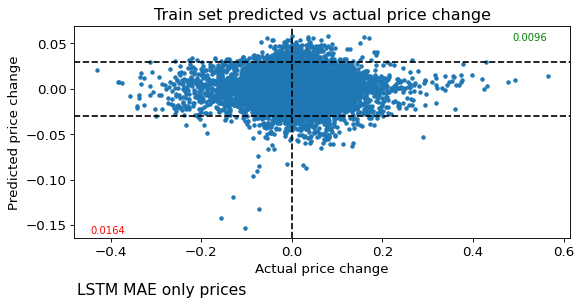

In [3933]:
# Train
treshold_pos = 0.03
treshold_neg = -0.03
plot_title = 'Train set predicted vs actual price change'
plot_subtitle = model_now

plt.scatter(y_train, y_train_pred, marker='.')
plt.gcf().text(0.13, -0.08, plot_subtitle, fontsize=14)
plt.gcf().text(0.81, 0.83, round(y_train[y_train_pred >= treshold_pos].mean(), 4), fontsize=9, color='green')
plt.gcf().text(0.15, 0.14, round(y_train[y_train_pred <= treshold_neg].mean(), 4), fontsize=9, color='red')

plt.title(plot_title)
plt.xlabel('Actual price change')
plt.ylabel('Predicted price change')
plt.axhline(y=treshold_pos, color='black', linestyle='--')
plt.axhline(y=treshold_neg, color='black', linestyle='--')
plt.axvline(x=0.0, color='black', linestyle='--')
plt.savefig('models_descr/'+ 'scatter_train_pred_true_' + plot_title + '_' + plot_subtitle, bbox_inches = "tight", dpi=320)
print('Mean price change total:', y_train.mean())
print('Mean price change per obs pos:', y_train[y_train_pred >= treshold_pos].mean())
print('Mean price change per obs neg:', y_train[y_train_pred <= treshold_neg].mean())

Mean price change total: 0.010479431229946002
Mean price change per obs pos: 0.011181160478387452
Mean price change per obs neg: 0.016627654213233187


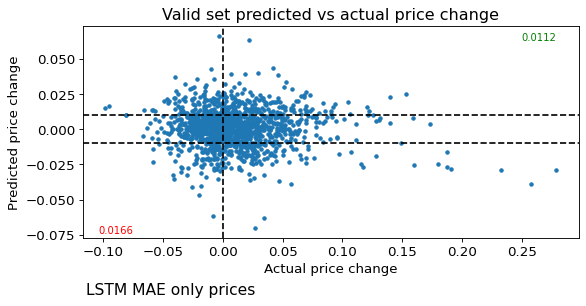

In [3934]:
# Valid
treshold_pos = 0.01
treshold_neg = -0.01
plot_title = 'Valid set predicted vs actual price change'
plot_subtitle = model_now

plt.scatter(y_valid, y_valid_pred, marker='.')
plt.gcf().text(0.13, -0.08, plot_subtitle, fontsize=14)
plt.gcf().text(0.81, 0.83, round(y_valid[y_valid_pred >= treshold_pos].mean(), 4), fontsize=9, color='green')
plt.gcf().text(0.15, 0.14, round(y_valid[y_valid_pred <= treshold_neg].mean(), 4), fontsize=9, color='red')

plt.title(plot_title)
plt.xlabel('Actual price change')
plt.ylabel('Predicted price change')
plt.axhline(y=treshold_pos, color='black', linestyle='--')
plt.axhline(y=treshold_neg, color='black', linestyle='--')
plt.axvline(x=0.0, color='black', linestyle='--')
plt.savefig('models_descr/'+ 'scatter_valid_pred_true_' + plot_title + '_' + plot_subtitle, bbox_inches = "tight", dpi=320)
print('Mean price change total:', y_valid.mean())
print('Mean price change per obs pos:', y_valid[y_valid_pred >= treshold_pos].mean())
print('Mean price change per obs neg:', y_valid[y_valid_pred <= treshold_neg].mean())

Mean price change total: 0.0060548841147157004
Mean price change per obs pos: -0.0032478748586340605
Mean price change per obs neg: 0.005808281713495251


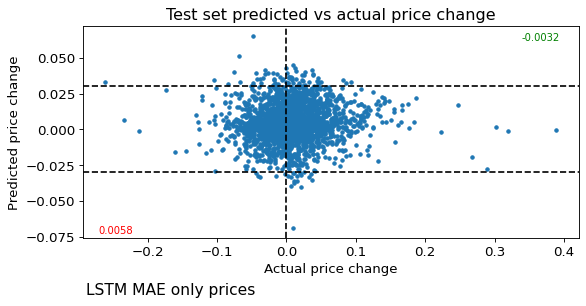

In [3936]:
# Test
treshold_pos = 0.03
treshold_neg = -0.03
plot_title = 'Test set predicted vs actual price change'
plot_subtitle = model_now

plt.scatter(y_test, y_test_pred, marker='.')
plt.gcf().text(0.13, -0.08, plot_subtitle, fontsize=14)
plt.gcf().text(0.81, 0.83, round(y_test[y_test_pred >= treshold_pos].mean(), 4), fontsize=9, color='green')
plt.gcf().text(0.15, 0.14, round(y_test[y_test_pred <= treshold_neg].mean(), 4), fontsize=9, color='red')

plt.title(plot_title)
plt.xlabel('Actual price change')
plt.ylabel('Predicted price change')
plt.axhline(y=treshold_pos, color='black', linestyle='--')
plt.axhline(y=treshold_neg, color='black', linestyle='--')
plt.axvline(x=0.0, color='black', linestyle='--')
plt.savefig('models_descr/'+ 'scatter_test_pred_true_' + plot_title + '_' + plot_subtitle, bbox_inches = "tight", dpi=320)
print('Mean price change total:', y_test.mean())
print('Mean price change per obs pos:', y_test[y_test_pred >= treshold_pos].mean())
print('Mean price change per obs neg:', y_test[y_test_pred <= treshold_neg].mean())

In [3937]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

higher_then = 0.0 # test_pred.mean()

confusion_matrix_array = confusion_matrix(y_train > 0, y_train_pred > higher_then)
print('Train set confusion matrix')
print(confusion_matrix_array)
print(classification_report(y_train > 0, y_train_pred > higher_then))

Train set confusion matrix
[[3052 4015]
 [3369 5306]]
              precision    recall  f1-score   support

       False       0.48      0.43      0.45      7067
        True       0.57      0.61      0.59      8675

    accuracy                           0.53     15742
   macro avg       0.52      0.52      0.52     15742
weighted avg       0.53      0.53      0.53     15742



In [3938]:
higher_then = 0.0 # test_pred.mean()

confusion_matrix_array = confusion_matrix(y_valid > 0, y_valid_pred > higher_then)
print('Valid set confusion matrix')
print(confusion_matrix_array)
print(classification_report(y_valid > 0, y_valid_pred > higher_then))

Valid set confusion matrix
[[237 305]
 [360 402]]
              precision    recall  f1-score   support

       False       0.40      0.44      0.42       542
        True       0.57      0.53      0.55       762

    accuracy                           0.49      1304
   macro avg       0.48      0.48      0.48      1304
weighted avg       0.50      0.49      0.49      1304



In [3939]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

higher_then = 0.0 # test_pred.mean()

confusion_matrix_array = confusion_matrix(y_test > 0, y_test_pred > higher_then)
print('Test set confusion matrix')
print(confusion_matrix_array)
print(classification_report(y_test > 0, y_test_pred > higher_then))

Test set confusion matrix
[[390 729]
 [437 895]]
              precision    recall  f1-score   support

       False       0.47      0.35      0.40      1119
        True       0.55      0.67      0.61      1332

    accuracy                           0.52      2451
   macro avg       0.51      0.51      0.50      2451
weighted avg       0.51      0.52      0.51      2451



# add prediction to df

In [3940]:
# train_pred, test_pred
print('cutted_data_features_tr:', len(cutted_data_features_tr))
print('train_pred:', len(y_train_pred))
print('valid_pred:', len(y_valid_pred))
print('test_pred:', len(y_test_pred))

cutted_data_features_tr: 19497
train_pred: 15742
valid_pred: 1304
test_pred: 2451


In [3941]:
prediction = list(y_train_pred) + list(y_valid_pred) + list(y_test_pred)
len(prediction)

19497

In [3942]:
predicted_valid_df = cutted_data_features[condition_valid]
predicted_test_df = cutted_data_features[condition_test]

predicted_valid_df['pred'] = list(y_valid_pred)
predicted_test_df['pred'] = list(y_test_pred)

predicted_valid_df['actual'] = list(y_valid)
predicted_test_df['actual'] = list(y_test)

print('predicted_valid_df:', len(predicted_valid_df))
print('predicted_test_df:', len(predicted_test_df))

predicted_valid_df: 1304
predicted_test_df: 2451


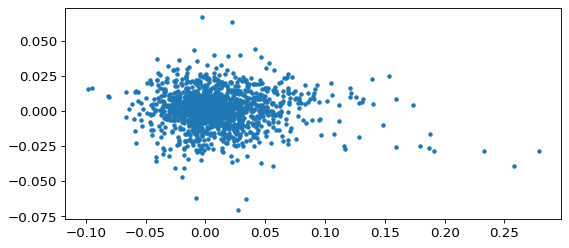

In [3943]:
plt.scatter('actual', 'pred', data=predicted_valid_df[['pred', 'actual']], marker='.')

In [3944]:
predicted_test_df['pred'].max()

0.06531715393066406

In [3945]:
predicted_test_df[predicted_test_df['pred'] >= predicted_test_df['pred'].max()]

ric  date_time  CLOSE  price_change_close_shift_n  \
19051  LUMN.N 2020-12-14  10.42                    0.056795   

       price_change_open_shift_n  price_change_low_shift_n  \
19051                  -0.017992                  0.059426   

       price_change_high_shift_n  stochastic_oscillator  macd_percent  \
19051                  -0.003259               0.673469      0.012737   

         rsi_14  actual_bi  actual_reg      pred    actual  
19051  0.642384          0   -1.142998  0.065317 -0.047985

In [3946]:
treshold = 0.03 # predicted_test_df['pred'].max(), predicted_test_df['pred'].quantile(0.99) 

pos_orders_count = predicted_test_df[
    (predicted_test_df['pred'] >= treshold)
    & (predicted_test_df['actual'] > 0)
]['actual'].count()

neg_orders_count = predicted_test_df[
    (predicted_test_df['pred'] >= treshold)
    & (predicted_test_df['actual'] < 0)
]['actual'].count()

pos_mean_profit = predicted_test_df[
    (predicted_test_df['pred'] >= treshold)
    & (predicted_test_df['actual'] > 0)
]['actual'].mean()

neg_mean_profit = predicted_test_df[
    (predicted_test_df['pred'] >= treshold)
    & (predicted_test_df['actual'] < 0)
]['actual'].mean()

print('Test', treshold)
print('Pos count orders:', pos_orders_count)
print('Neg count orders:', neg_orders_count)
print('Precision:', pos_orders_count / (pos_orders_count + neg_orders_count))
print('Positive mean profit per order: ', pos_mean_profit)
print('Negative mean profit per order:', neg_mean_profit)
print('Spread mean profit per order:   ', pos_mean_profit + neg_mean_profit)
print('Mean profit per order:          ', (pos_orders_count*pos_mean_profit + neg_orders_count*neg_mean_profit)/(pos_orders_count + neg_orders_count))

Test 0.03
Pos count orders: 40
Neg count orders: 32
Precision: 0.5555555555555556
Positive mean profit per order:  0.026116725037308088
Negative mean profit per order: -0.03995362472856174
Spread mean profit per order:    -0.013836899691253651
Mean profit per order:           -0.0032478748586340584


In [3947]:
treshold = 0.03 # predicted_valid_df['pred'].max(), predicted_valid_df['pred'].quantile(0.95)

pos_orders_count = predicted_valid_df[
    (predicted_valid_df['pred'] >= treshold)
    & (predicted_valid_df['actual'] > 0)
]['actual'].count()

neg_orders_count = predicted_valid_df[
    (predicted_valid_df['pred'] >= treshold)
    & (predicted_valid_df['actual'] < 0)
]['actual'].count()

pos_mean_profit = predicted_valid_df[
    (predicted_valid_df['pred'] >= treshold)
    & (predicted_valid_df['actual'] > 0)
]['actual'].mean()

neg_mean_profit = predicted_valid_df[
    (predicted_valid_df['pred'] >= treshold)
    & (predicted_valid_df['actual'] < 0)
]['actual'].mean()

print('Valid', treshold)
print('Pos count orders:', pos_orders_count)
print('Neg count orders:', neg_orders_count)
print('Precision:', pos_orders_count / (pos_orders_count + neg_orders_count))
print('Positive mean profit per order: ', pos_mean_profit)
print('Negative mean profit per order:', neg_mean_profit)
print('Spread mean profit per order:   ', pos_mean_profit + neg_mean_profit)
print('Mean profit per order:          ', (pos_orders_count*pos_mean_profit + neg_orders_count*neg_mean_profit)/(pos_orders_count + neg_orders_count))

Valid 0.03
Pos count orders: 11
Neg count orders: 7
Precision: 0.6111111111111112
Positive mean profit per order:  0.026591372748054506
Negative mean profit per order: -0.01818480809586428
Spread mean profit per order:    0.008406564652190227
Mean profit per order:           0.009178413530974977


In [3948]:
predicted_test_df['date_time']

19048   2020-12-14
19088   2020-12-15
19134   2020-12-16
19236   2020-12-17
19258   2020-12-18
           ...    
20049   2021-01-07
20127   2021-01-08
20175   2021-01-11
20237   2021-01-12
20307   2021-01-13
Name: date_time, Length: 2451, dtype: datetime64[ns]

# Per day

In [3949]:
print(y_train_pred.max())
print(y_valid_pred.max())
print(y_test_pred.max())

0.05839864909648895
0.06651292741298676
0.06531715393066406


In [3950]:
treshold = 0.02 # predicted_test_df['pred'].max(), predicted_test_df['pred'].quantile(0.90)

days_result = predicted_test_df[predicted_test_df['pred'] >= treshold].groupby('date_time').agg(
    count=pd.NamedAgg(column='actual', aggfunc=len),
    sum_profit=pd.NamedAgg(column='actual', aggfunc=sum),
    mean=pd.NamedAgg(column='actual', aggfunc=np.mean),
)
days_result[['count', 'mean']]

count      mean
date_time                  
2020-12-14    9.0 -0.001393
2020-12-15   14.0 -0.005047
2020-12-16   19.0  0.004832
2020-12-17   21.0  0.006193
2020-12-18   20.0  0.009375
2020-12-21   20.0  0.022197
2020-12-22   18.0  0.024402
2020-12-23    9.0  0.020125
2020-12-24    6.0  0.005663
2020-12-28   10.0  0.009664
2020-12-29   12.0  0.022052
2020-12-30   10.0  0.020635
2020-12-31    2.0 -0.003686
2021-01-04    7.0  0.013144
2021-01-05    6.0 -0.002005
2021-01-06    3.0  0.007795
2021-01-07    1.0  0.029867
2021-01-08    3.0 -0.022466
2021-01-11    5.0  0.004477
2021-01-12    7.0  0.048936
2021-01-13    8.0  0.035634
2021-01-14    2.0  0.016129
2021-01-15    3.0  0.002224
2021-01-18    1.0 -0.088753
2021-01-19    2.0 -0.029298
2021-01-20    4.0 -0.053372
2021-01-21    9.0 -0.027361
2021-01-22    5.0 -0.027533
2021-01-25    6.0 -0.021790
2021-01-26    6.0 -0.000442
2021-01-27    6.0  0.039034
2021-01-28    6.0  0.023700
2021-01-29    5.0  0.048160
2021-02-01    1.0  0.043570
2021-02-02    2.0  0.077178
2021-02-03    4.0  0.074700
2021-02-04    3.0  0.059635
2021-02-05    2.0  0.084882
2021-02-08    3.0  0.046999
2021-02-09    1.0  0.045742
2021-02-10    1.0  0.026944
2021-02-11    1.0  0.006631
2021-02-25    2.0 -0.069390
2021-02-26    5.0 -0.044965
2021-03-01    5.0 -0.119343
2021-03-02    5.0 -0.051545
2021-03-03    5.0 -0.026072
2021-03-04    3.0  0.056712
2021-03-05    3.0  0.016875

In [3951]:
print('Orders per day q05: ', days_result['count'].quantile(0.10))
print('Orders per day mean:', days_result['count'].mean())
print('Orders per day q95: ', days_result['count'].quantile(0.90))

Orders per day q05:  1.0
Orders per day mean: 6.346938775510204
Orders per day q95:  14.800000000000011


In [3952]:
print('Total cumulative result (prod):', np.prod((days_result['mean'])/5 + 1) - 1)
print('Total cumulative result (sum): ', np.sum((days_result['mean'])/5))

Total cumulative result (prod): 0.07278440495485117
Total cumulative result (sum):  0.07192849507212716


1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 

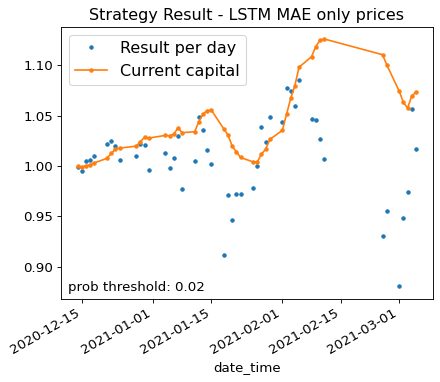

In [3953]:
days_result['current_capital'] = 1
for i in range(1, len(days_result)):
    print(i, end=', ')
    days_result['current_capital'].iloc[i] = days_result['current_capital'].iloc[i-1] * (1 + days_result['mean'].iloc[i]/5)

plt.figure(figsize=(6,5))
plt.gcf().text(0.14, +0.22, 'prob threshold: ' + str(treshold), fontsize=12)
plt.title('Strategy Result - ' + model_now)
(days_result['mean'] + 1).plot(marker = '.', style=' ', label='Result per day')
days_result['current_capital'].plot(marker = '.', label='Current capital')
plt.legend(loc='upper left')
plt.savefig('models_descr/'+ 'strategy_result_' + model_now + '_' + str(treshold) + '.png', bbox_inches = "tight", dpi=320)

In [3954]:
days_result['current_capital'][-1]

1.0730833931284123

# Choose Treshold

In [3955]:
treshold_pred_result = []

for i in range(5, 100):
    treshold_pred = i/(100*10)
    days_result = predicted_test_df[predicted_test_df['pred'] >= treshold_pred].groupby('date_time').agg(
        count=pd.NamedAgg(column='actual', aggfunc=len),
        sum_profit=pd.NamedAgg(column='actual', aggfunc=sum),
        mean=pd.NamedAgg(column='actual', aggfunc=np.mean),
    )
    treshold_pred_result.append(
        [treshold_pred,
         days_result['mean'].mean(),
         np.prod((days_result['mean'])/5 + 1) - 1,
         days_result['count'].mean(),
         days_result['count'].quantile(0.05),
         days_result['count'].quantile(0.95)]
    )

In [3956]:
treshold_pred_result = pd.DataFrame(
    treshold_pred_result, 
    columns=[
        'treshold_pred', 'mean_result_per_day', 'product_result', 
        'mean_orders', 'q05_orders', 'q95_orders'
    ])
treshold_pred_result.head(2)

treshold_pred  mean_result_per_day  product_result  mean_orders  \
0          0.005             0.004340        0.049629    19.877193   
1          0.006             0.005275        0.060853    18.175439   

   q05_orders  q95_orders  
0         5.0        47.0  
1         5.0        44.4

In [3958]:
model_now = 'LSTM MAE only prices'
treshold_pred_result.to_csv('models_descr/thresholds/' + 'treshold_pred_result_' + model_now + '.csv')

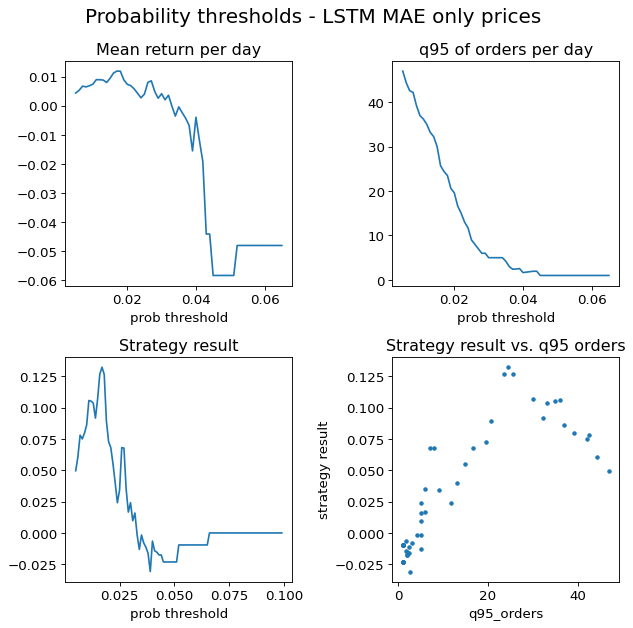

In [3959]:
treshold_plots(treshold_pred_result, plot_title='Probability thresholds - '  + model_now, dont_show=False)

# Per company

In [3629]:
print('Count of rics:', len(predicted_test_df[['ric', 'CLOSE']].groupby('ric').agg(['count'])))
print('min day in test:', predicted_test_df['date_time'].min())
print('max day in test:', predicted_test_df['date_time'].max())
print('test date range (with empty days):', predicted_test_df['date_time'].max() - predicted_test_df['date_time'].min())

Count of rics: 67
min day in test: 2020-12-14 00:00:00
max day in test: 2021-03-05 00:00:00
test date range (with empty days): 81 days 00:00:00


In [3632]:
orders_grouped_rics = predicted_test_df[predicted_test_df['pred'] > 0.02].groupby('ric').agg(
    count=pd.NamedAgg(column='actual', aggfunc=len),
    sum_profit=pd.NamedAgg(column='actual', aggfunc=sum),
    mean=pd.NamedAgg(column='actual', aggfunc=np.mean),
).sort_values(by='mean')

<AxesSubplot:>

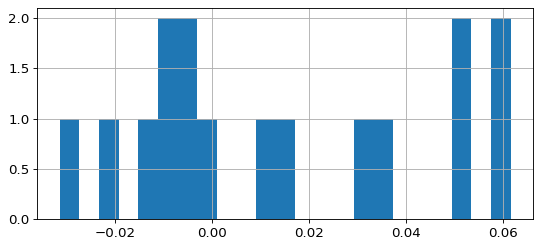

In [3633]:
orders_grouped_rics['mean'].hist(bins=23)

In [3634]:
orders_grouped_rics.sort_values('mean')

count  sum_profit      mean
ric                                  
LUMN.N      1.0   -0.031496 -0.031496
DIS.N      12.0   -0.234057 -0.019505
BABA.N     11.0   -0.160419 -0.014584
DRIG.DE     1.0   -0.010795 -0.010795
BAYGn.DE    1.0   -0.010288 -0.010288
SAPG.DE    13.0   -0.064518 -0.004963
JCOM.OQ     9.0   -0.034473 -0.003830
NFLX.OQ     1.0   -0.002773 -0.002773
MA.N        1.0    0.009724  0.009724
UTDI.DE     4.0    0.062980  0.015745
ATUS.N      2.0    0.066010  0.033005
TSLA.OQ    27.0    0.925607  0.034282
PDD.OQ     22.0    1.125512  0.051160
TKAG.DE    30.0    1.547788  0.051593
LHAG.DE     7.0    0.421823  0.060260
INTC.OQ     4.0    0.246263  0.061566

In [3533]:
chosen_rics[0]

'KO.N'

104.34124999999999


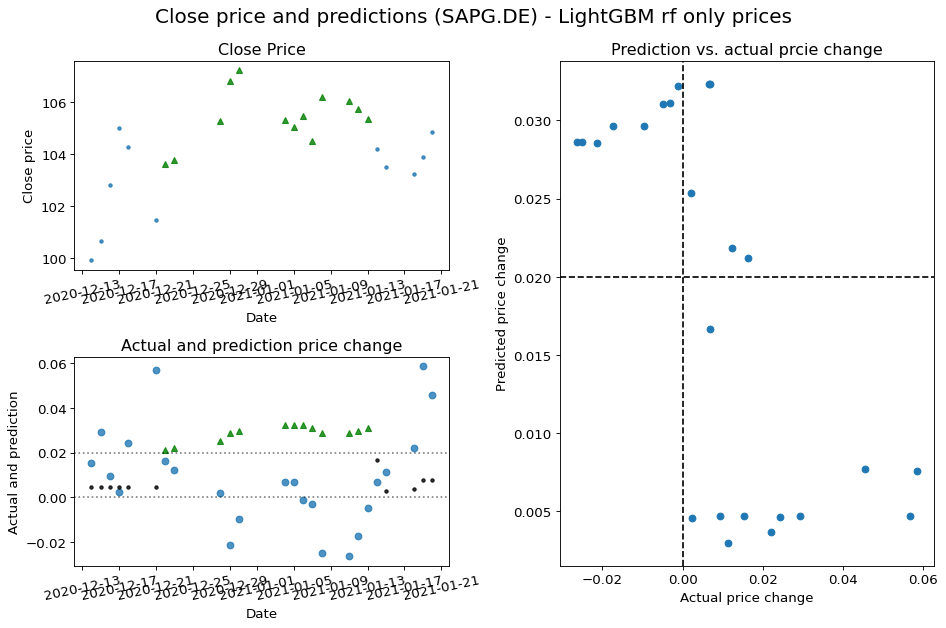

In [3641]:
chosen_rics = ['SAPG.DE'] # 'TKAG.DE', 'TSLA.OQ', 'PDD.OQ', 'BAYGn.DE', 'LHAG.DE', 'FREG.DE', 'TIGO.OQ', 'PH6.F'
treshold = 0.02

df_for_plot = predicted_test_df[predicted_test_df['ric'].isin(chosen_rics)]
mean_price = df_for_plot['CLOSE'].mean()
print(mean_price)

fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot(221)
ax2 = plt.subplot(223)
ax3 = plt.subplot(122)

plt.suptitle('Close price and predictions (' + chosen_rics[0] + ') - ' + model_now, fontsize=18)

ax1.plot('date_time', 'CLOSE', '.', 
            data=df_for_plot[df_for_plot['pred'] < treshold], alpha = 0.8)
ax1.plot('date_time', 'CLOSE', 'g^', 
            data=df_for_plot[df_for_plot['pred'] >= treshold], alpha = 0.8)
ax1.tick_params(axis='x', labelrotation = 12)
ax1.title.set_text('Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close price')

ax2.plot('date_time', 'actual', 'o', data=df_for_plot, alpha = 0.8)
ax2.plot('date_time', 'pred', '^', color='green', 
            data=df_for_plot[df_for_plot['pred'] >= treshold], alpha = 0.8)
ax2.plot('date_time', 'pred', '.', color='black', 
            data=df_for_plot[df_for_plot['pred'] < treshold], alpha = 0.8)
ax2.axhline(y=treshold, color='black', linestyle=':', alpha = 0.5)
ax2.axhline(y=0.00, color='black', linestyle=':', alpha = 0.5)
ax2.tick_params(axis='x', labelrotation = 12)
ax2.title.set_text('Actual and prediction price change')
ax2.set_xlabel('Date')
ax2.set_ylabel('Actual and prediction')

ax3.scatter(df_for_plot['actual'], df_for_plot['pred'])
ax3.axhline(y=treshold, color='black', linestyle='--')
ax3.axvline(x=0.0, color='black', linestyle='--')
ax3.title.set_text('Prediction vs. actual prcie change')
ax3.set_xlabel('Actual price change')
ax3.set_ylabel('Predicted price change')

plt.tight_layout()
plt.savefig('models_descr/'+ 'Close price, actual change and prediction ' + str(chosen_rics[0]) + '_' + model_now + '.png', bbox_inches = "tight")

# Profit plots

In [6]:
list_of_files = os.listdir('models_descr/thresholds/')
list_of_files = [i[:-4] for i in [
    i[21:] for i in list_of_files]
]

In [7]:
list_of_files

['LightGBM gbdt only prices',
 'LightGBM gbdt with news',
 'LightGBM rf only prices',
 'LightGBM rf with news',
 'LSTM custom loss only prices',
 'LSTM custom loss with news',
 'LSTM MAE only prices',
 'LSTM MAE with news',
 'LSTM MSE only prices',
 'LSTM MSE with news',
 'Regression only prices',
 'Regression with news']

False, True, False, True, False, True, False, True, False, True, False, True, 

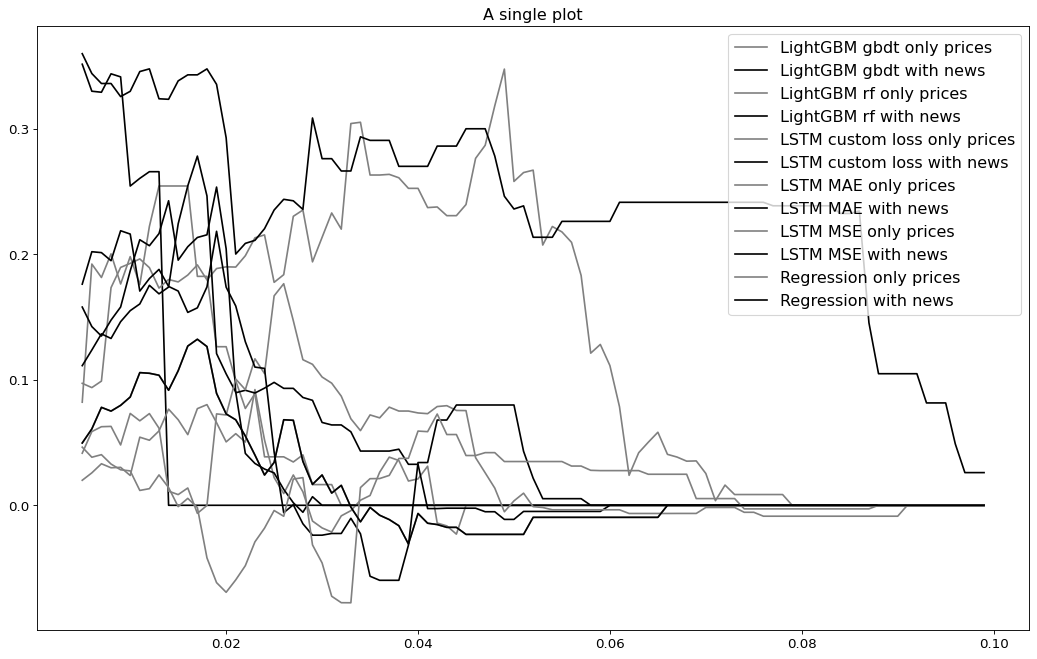

In [10]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.set_title('A single plot')

for i in range(len(list_of_files)):
    is_with_news = list_of_files[i][-9:]=='with news'
    print(is_with_news, end=', ')
    if is_with_news:
        color_now = 'black'
    else:
        color_now = 'grey'
    data_model = pd.read_csv(
        'models_descr/thresholds/' + 'treshold_pred_result_' + list_of_files[i] + '.csv', 
        index_col='Unnamed: 0'
    )
    ax.plot('treshold_pred', 'product_result', data=data_model, label=list_of_files[i], color=color_now)
    
ax.legend()

In [3829]:
list_of_files.sort(reverse=True)

In [3762]:
for i in range(len(list_of_files)):
    
    
    row_i = (i / 2) // 2 
    col_i = int(round((i / 2) % 2, 0) != 0)
    print(i, col_i, row_i)
    
    

0 0 0.0
1 0 0.0
2 1 0.0
3 1 0.0
4 0 1.0
5 0 1.0
6 1 1.0
7 1 1.0
8 0 2.0
9 0 2.0
10 1 2.0
11 1 2.0


0 0 0, 1 0 0, 2 0 1, 3 0 1, 4 1 0, 5 1 0, 6 1 1, 7 1 1, 8 2 0, 9 2 0, 10 2 1, 11 2 1, 

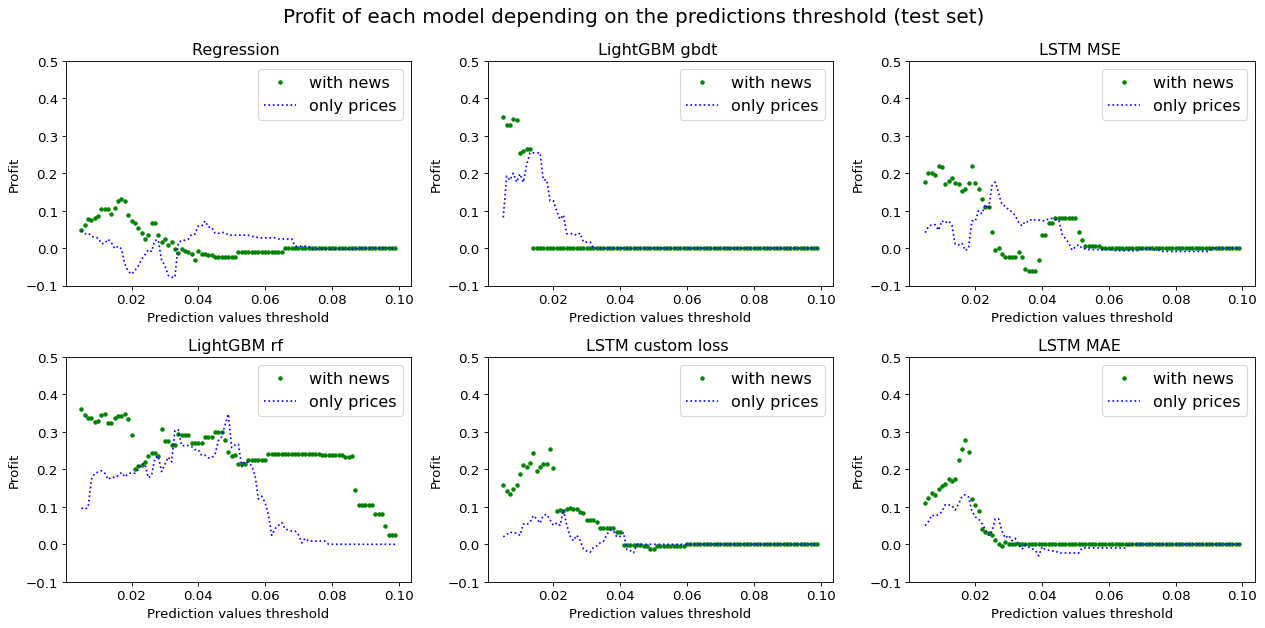

In [15]:
list_of_files.sort(reverse=True)

fig, axs = plt.subplots(2, 3, figsize=(16, 8))
plt.suptitle('Profit of each model depending on the predictions threshold (test set)', fontsize=18)

for i in range(len(list_of_files)):

    col_i = int((i / 2) // 2)
    row_i = int(round((i / 2) % 2, 0) != 0)
    print(i, col_i, row_i, end=', ')
    
    is_with_news = list_of_files[i][-9:]=='with news'
#     print(is_with_news)
    if is_with_news:
        # news
        color_now = 'g'
        label_now = list_of_files[i][-9:]
        title = list_of_files[i][:-9]
        marker_now = '.'
        linestyle_now = ' '
        text_pos1, text_pos2, plot_text = 0.003, 0.455, 'news max profit: '
    else:
        # prices
        color_now = 'b'
        label_now = list_of_files[i][-11:]
        title = list_of_files[i][:-11]
        marker_now = ' '
        linestyle_now = ':'
        text_pos1, text_pos2, plot_text = 0.055, -0.08, 'price max profit: '
        
    data_model = pd.read_csv(
        'models_descr/thresholds/' + 'treshold_pred_result_' + list_of_files[i] + '.csv', 
        index_col='Unnamed: 0'
    )
    axs[row_i, col_i].plot('treshold_pred', 'product_result', 
                           data=data_model, 
                           label=label_now, 
                           color=color_now, marker=marker_now, linestyle=linestyle_now)
    axs[row_i, col_i].set_title(title)
    axs[row_i, col_i].legend()
    axs[row_i, col_i].set_ylim([-0.1, 0.5]) 
    axs[row_i, col_i].set_xlabel('Prediction values threshold')
    axs[row_i, col_i].set_ylabel('Profit')
    
#     axs[row_i, col_i].text(text_pos1, text_pos2, 
#                            plot_text + str(round(data_model['product_result'].max(), 3)), 
#                            color=color_now, fontsize=11)

plt.tight_layout()
plt.savefig('models_descr/'+ 'Profit_of_each_model'  + '.png', bbox_inches = "tight")

# for ax in axs.flat:
#     ax.set(xlabel='Prediction values threshold', ylabel='Profitability')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

In [12]:
data_model

treshold_pred  mean_result_per_day  product_result  mean_orders  \
0           0.005             0.042249        0.351446     4.222222   
1           0.006             0.040025        0.329938     3.722222   
2           0.007             0.042295        0.329118     3.441176   
3           0.008             0.048184        0.343808     2.967742   
4           0.009             0.048064        0.341365     2.516129   
..            ...                  ...             ...          ...   
90          0.095                  NaN        0.000000          NaN   
91          0.096                  NaN        0.000000          NaN   
92          0.097                  NaN        0.000000          NaN   
93          0.098                  NaN        0.000000          NaN   
94          0.099                  NaN        0.000000          NaN   

    q05_orders  q95_orders  
0          1.0         8.0  
1          1.0         7.0  
2          1.0         6.0  
3          1.0         5.0  
4          1.0         4.5  
..         ...         ...  
90         NaN         NaN  
91         NaN         NaN  
92         NaN         NaN  
93         NaN         NaN  
94         NaN         NaN  

[95 rows x 6 columns]

In [153]:
models_comparison = pd.DataFrame(data=[], index=[], columns=['mean_total_result', 'max_total_result'])

for model_now in list_of_files:
    print(model_now)
    data_model = pd.read_csv(
        'models_descr/thresholds/' + 'treshold_pred_result_' + model_now + '.csv', 
        index_col='Unnamed: 0'
    )
    data_model_not_nan = data_model[data_model['product_result'] != 0]

    models_comparison.loc[model_now] = {
        'mean_total_result': data_model_not_nan['product_result'].mean(),
        'max_total_result': data_model_not_nan['product_result'].max(),
    }

LightGBM gbdt only prices
LightGBM gbdt with news
LightGBM rf only prices
LightGBM rf with news
LSTM custom loss only prices
LSTM custom loss with news
LSTM MAE only prices
LSTM MAE with news
LSTM MSE only prices
LSTM MSE with news
Regression only prices
Regression with news


In [154]:
models_comparison['model_long_name'] = models_comparison.index
models_comparison['model_features'] = models_comparison['model_long_name'].apply(
    lambda x: 'only prices' if x[-11:] == 'only prices' else 'with news'
)

models_comparison['model_short_name'] = models_comparison['model_long_name'].apply(
    lambda x: x[:-12] if x[-11:] == 'only prices' else x[:-10]
)

In [155]:
model_short_names = list(set(models_comparison['model_short_name']))
model_short_names.sort()
model_short_names

['LSTM MAE',
 'LSTM MSE',
 'LSTM custom loss',
 'LightGBM gbdt',
 'LightGBM rf',
 'Regression']

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


0 0 0, 1 0 0, 2 0 1, 3 0 1, 4 1 0, 5 1 0, 

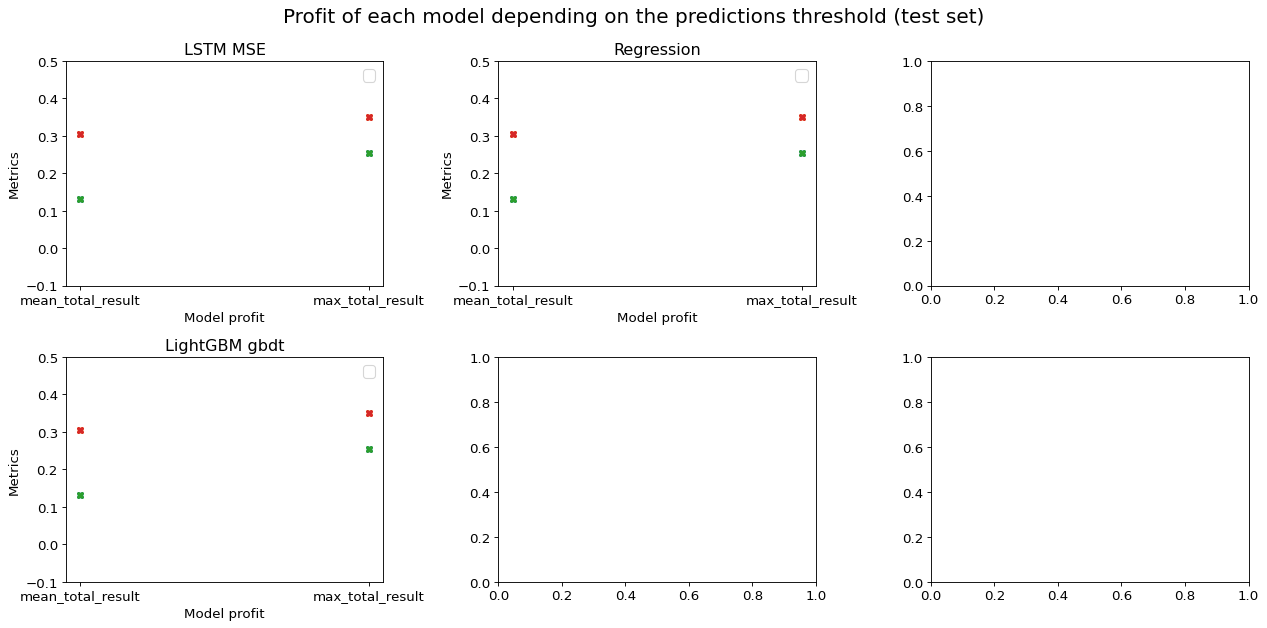

In [179]:
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
plt.suptitle('Profit of each model depending on the predictions threshold (test set)', fontsize=18)

for i in range(len(model_short_names)):
    
    col_i = int((i / 2) // 2)
    row_i = int(round((i / 2) % 2, 0) != 0)
    print(i, col_i, row_i, end=', ')

    models_comparison.index = models_comparison['model_features']
    
    axs[row_i, col_i].plot(models_comparison[
        ['mean_total_result', 'max_total_result']
    ][models_comparison['model_short_name'] == 'LightGBM gbdt'].transpose(),
            'X')
    axs[row_i, col_i].set_title(model_short_names[i])
    axs[row_i, col_i].legend()
    axs[row_i, col_i].set_ylim([-0.1, 0.5]) 
    axs[row_i, col_i].set_xlabel('Model profit')
    axs[row_i, col_i].set_ylabel('Metrics')

plt.tight_layout()
plt.savefig('models_descr/'+ 'Aggregate_metrics_of_models'  + '.png', bbox_inches = "tight")

In [164]:
models_comparison[
    ['mean_total_result', 'max_total_result']
][models_comparison['model_short_name'] == 'LightGBM gbdt'].transpose()

model_features     only prices  with news
mean_total_result     0.132196   0.304689
max_total_result      0.254419   0.351446

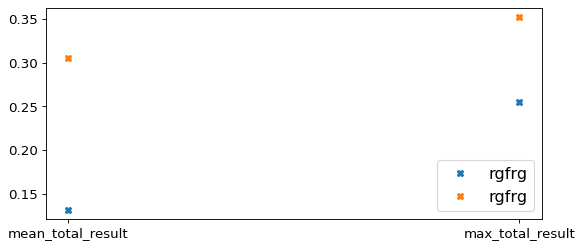

In [181]:
plt.plot(models_comparison[
    ['mean_total_result', 'max_total_result']
][models_comparison['model_short_name'] == 'LightGBM gbdt'].transpose(),
        'X', label='rgfrg')
plt.legend()

In [195]:
models_comparison[
    ['mean_total_result', 'max_total_result']
].transpose()

model_features     only prices  with news  only prices  with news  \
mean_total_result     0.132196   0.304689     0.168386   0.240427   
max_total_result      0.254419   0.351446     0.347568   0.359850   

model_features     only prices  with news  only prices  with news  \
mean_total_result     0.029659   0.079188     0.024572   0.117945   
max_total_result      0.092182   0.253556     0.132299   0.278240   

model_features     only prices  with news  only prices  with news  
mean_total_result     0.034278   0.074767     0.010619   0.024572  
max_total_result      0.176547   0.218764     0.072709   0.132299

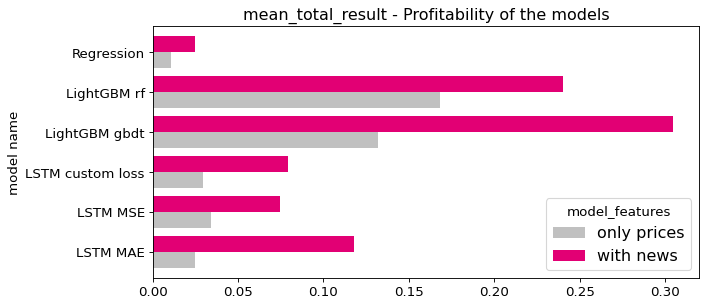

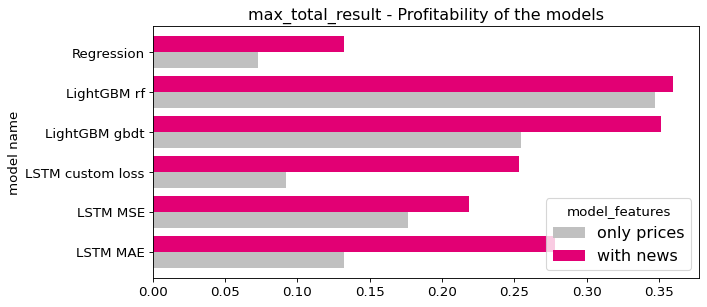

In [238]:
for values_now in ['mean_total_result', 'max_total_result']:
    data_for_plot = models_comparison.pivot(index='model_short_name', columns='model_features', values=values_now)
    
    data_for_plot.index.name = 'model name'
    data_for_plot.plot.barh(figsize = (9,4), width=0.8, color=['silver', '#E20074'])
    plt.title(values_now + ' - Profitability of the models')
    plt.savefig('exhibits_saved/' + values_now + '.png', bbox_inches = "tight" )
    plt.tight_layout()

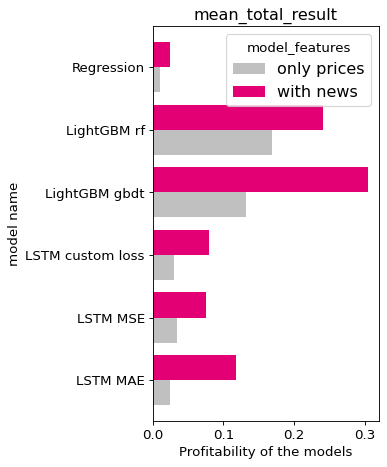

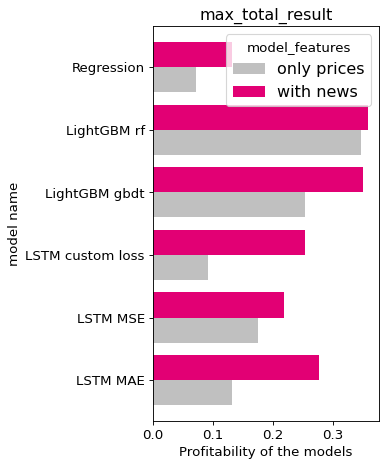

In [249]:
for values_now in ['mean_total_result', 'max_total_result']:
    data_for_plot = models_comparison.pivot(index='model_short_name', columns='model_features', values=values_now)
    
    data_for_plot.index.name = 'model name'
    data_for_plot.plot.barh(figsize = (5,6), width=0.8, color=['silver', '#E20074'])
    plt.title(values_now)
    plt.xlabel('Profitability of the models')
    plt.savefig('exhibits_saved/' + values_now + '.png', bbox_inches = "tight" )
    plt.tight_layout()

<AxesSubplot:>

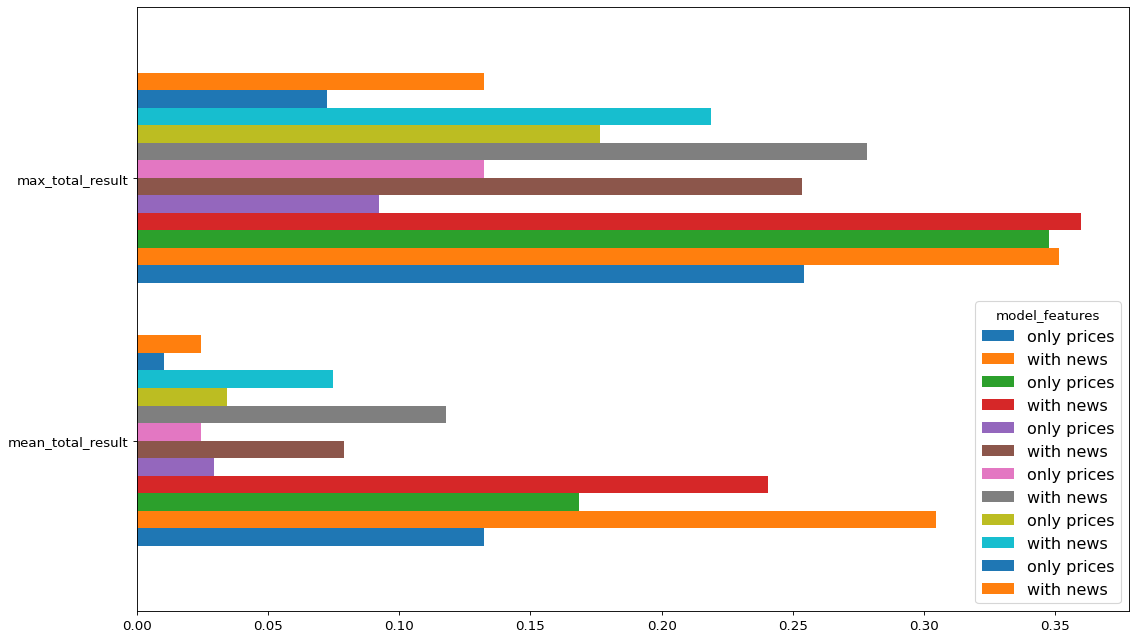

In [194]:
models_comparison[
    ['mean_total_result', 'max_total_result']
].transpose().plot.barh(figsize = (16,10), width=0.8)